# 

In [612]:
!pwd

/home/ai-046/notebook


In [2]:
import numpy as np
import os
import sys
import math
import torch
import time
import re
import cv2
from pathlib import Path
from tqdm import tqdm
from matplotlib import pyplot as plt
from torchvision import transforms
from icecream import ic
from itertools import repeat
# import sympy as sy
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [1]:
!nvidia-smi

Thu Apr  6 11:59:10 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.89.02    Driver Version: 525.89.02    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA TITAN V      Off  | 00000000:04:00.0 Off |                  N/A |
| 28%   41C    P2    36W / 250W |   1242MiB / 12288MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA TITAN V      Off  | 00000000:05:00.0 Off |                  N/A |
| 28%   

# plot 

In [615]:
with open("temp.txt") as f:
    lines = f.readlines()

In [623]:
arrlist = []
for line in lines:
    line = [float(x) for x in line.strip().split('\t')]
    arrlist.append(line)
arr = np.array(arrlist)
arr
arr.shape
m, n = arr.shape

array([[ 2.7380e-03,  2.2750e-03, -9.7940e-03, -8.7200e-04, -4.9200e-03,
        -4.1770e-03,  1.1810e-03,  5.9020e-03,  5.5830e-03,  6.7830e-03,
        -1.4270e-03,  1.5300e-04],
       [-1.5519e-02, -1.7447e-02, -1.9620e-02, -6.3300e-03, -1.2526e-02,
        -1.0765e-02, -6.1770e-03, -7.5000e-04, -6.4880e-03, -1.7130e-03,
        -1.0736e-02, -5.0990e-03],
       [-3.6580e-03, -1.3740e-03, -3.7800e-03, -1.6200e-03, -5.3830e-03,
        -2.3240e-03,  2.3400e-03,  3.7600e-04, -1.4120e-03,  1.8260e-03,
        -2.6790e-03, -3.0000e-05],
       [-7.8230e-03, -6.5430e-03, -3.8920e-03, -1.0000e-05, -5.4510e-03,
        -2.4550e-03,  9.9700e-04, -1.4540e-03, -4.0100e-04,  7.7200e-04,
        -2.1840e-03,  2.7360e-03],
       [-8.7150e-03, -1.0084e-02, -4.5970e-03, -3.0600e-04,  2.6100e-04,
        -1.1290e-03,  1.4870e-03,  7.7000e-05, -2.9930e-03, -7.2000e-05,
         4.4400e-04,  2.4930e-03],
       [ 3.4370e-03,  1.6570e-03,  4.2920e-03,  1.5210e-03, -1.7650e-03,
        -2.2500e-04, -

(7, 12)

In [620]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [626]:
xs, ys = np.meshgrid(np.arange(n), np.arange(m))

/tmp/ipykernel_1145/2010676631.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


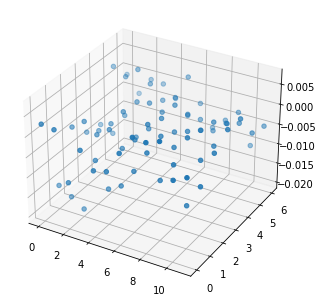

In [627]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(xs, ys, arr)


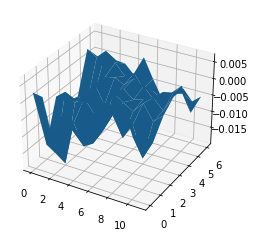

In [628]:
fig = plt.figure()
ax3 = plt.axes(projection='3d')
ax3.plot_surface(xs, ys, arr)


In [4]:
a = np.array([2393, 1345, 6257, 7793, 8192, 10000]) //4
a

array([ 598,  336, 1564, 1948, 2048, 2500])

In [5]:
81012677 * 31571213 % 88485600

1

In [6]:
cv2.GaussianBlur?

# rsa

In [1]:
num = 50
ps = [0] * (num + 5)
a = 0
for i in range(2, num + 1):
    if ps[i] == 0:
        ps[0] += 1
        ps[ps[0]] = i
    for j in range(1, ps[0] + 1):
        if i * ps[j] > num:break
#         if (i % ps[j] == 0): break
        ps[i * ps[j]] = 1
#         if (i % ps[j] == 0): break
        a += 1
        i, j, ps[j], i * ps[j], a
        if (i % ps[j] == 0): 
            i, j, ps[j], i * ps[j]
            break
# ps
ps[0]
ps = ps[1:ps[0]+1]
len(ps)
ps

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47]

In [2]:
def gcd(a, b):
    return a if b == 0 else gcd(b, (a % b))

In [3]:
gcd(91, 871)

13

In [36]:
def ex_gcd(a, b):
    if b == 0: return (1, 0)
    nx, ny = ex_gcd(b, a % b)
    x = ny
    y = nx - (a // b) * ny
    return (x, y)

In [5]:
a = 11
b = 13
x, y = ex_gcd(a, b)
x, y
a * x % b

1

In [16]:
def phi(x):
    ans = x
    i = 2
    while (i * i <= x):
        if (x % i == 0):
            ans -= ans // i
        while (x % i == 0):
            x //= i
        i += 1
    if x > 1:
        ans -= ans // x
    return ans
phi(9)

6

In [17]:
phi(100)

40

In [18]:
phi(8), phi(9)

(4, 6)

In [29]:
gcd(13, 13)

13

In [32]:
import random
phiN, e = 13, 13
while (gcd(phiN, e) != 1 or N < 256):
    P, Q = random.choices(ps[:100], k=2)
    N = P * Q
    phiN = (P-1)*(Q-1)
    

phiN
P, Q, e
N

252

(43, 7, 13)

301

In [34]:
x, _ = ex_gcd(e, phiN)
d = ((x) % phiN + phiN) % phiN
e, d, phiN, N

(13, 97, 252, 301)

In [35]:
e * d % phiN
e * x % phiN

1

1

## encode

In [452]:
def quick_mode(a, x, n):
    ans = 1
    temp = a
    while (x):
        if x & 1:
            ans = ans * temp % n
        temp = temp * temp % n
#         print(f"{temp=}")
        x >>= 1
    return ans

In [476]:
e,d,N # 13, 37, 533

(13, 3317, 6319)

In [479]:
for i in range(0, 256):
    c = quick_mode(i, e, N)
    f = quick_mode(c, d, N)
    i, c, f

(0, 0, 0)

(1, 1, 1)

(2, 1873, 2)

(3, 1935, 3)

(4, 1084, 4)

(5, 5024, 5)

(6, 3468, 6)

(7, 4572, 7)

(8, 1933, 8)

(9, 3377, 9)

(10, 961, 10)

(11, 2193, 11)

(12, 5951, 12)

(13, 2689, 13)

(14, 1111, 14)

(15, 2818, 15)

(16, 6041, 16)

(17, 5126, 17)

(18, 6121, 18)

(19, 1662, 19)

(20, 5357, 20)

(21, 220, 21)

(22, 139, 22)

(23, 1951, 23)

(24, 5826, 24)

(25, 2490, 25)

(26, 254, 26)

(27, 649, 27)

(28, 1952, 28)

(29, 2438, 29)

(30, 1749, 30)

(31, 1195, 31)

(32, 3783, 32)

(33, 3406, 33)

(34, 2437, 34)

(35, 163, 35)

(36, 1967, 36)

(37, 4947, 37)

(38, 3978, 38)

(39, 2678, 39)

(40, 5408, 40)

(41, 4286, 41)

(42, 1325, 42)

(43, 2876, 43)

(44, 1268, 44)

(45, 5852, 45)

(46, 1841, 46)

(47, 1345, 47)

(48, 5504, 48)

(49, 6251, 49)

(50, 348, 50)

(51, 4299, 51)

(52, 1817, 52)

(53, 4174, 53)

(54, 2329, 54)

(55, 3615, 55)

(56, 3714, 56)

(57, 5918, 57)

(58, 4056, 58)

(59, 6261, 59)

(60, 2635, 60)

(61, 3299, 61)

(62, 1309, 62)

(63, 2327, 63)

(64, 1960, 64)

(65, 5833, 65)

(66, 3567, 66)

(67, 4667, 67)

(68, 2183, 68)

(69, 2742, 69)

(70, 1987, 70)

(71, 5538, 71)

(72, 214, 72)

(73, 5707, 73)

(74, 2077, 74)

(75, 3072, 75)

(76, 693, 76)

(77, 4462, 77)

(78, 4927, 78)

(79, 5625, 79)

(80, 6146, 80)

(81, 4653, 81)

(82, 2548, 82)

(83, 626, 83)

(84, 4677, 84)

(85, 3099, 85)

(86, 2960, 86)

(87, 3556, 87)

(88, 5339, 88)

(89, 5340, 89)

(90, 3650, 90)

(91, 3653, 91)

(92, 4338, 92)

(93, 5890, 93)

(94, 4223, 94)

(95, 2489, 95)

(96, 2703, 96)

(97, 4514, 97)

(98, 5335, 98)

(99, 6212, 99)

(100, 947, 100)

(101, 1323, 101)

(102, 1621, 102)

(103, 4493, 103)

(104, 3619, 104)

(105, 5774, 105)

(106, 1299, 106)

(107, 5943, 107)

(108, 2107, 108)

(109, 996, 109)

(110, 3246, 110)

(111, 5479, 111)

(112, 5422, 112)

(113, 2177, 113)

(114, 888, 114)

(115, 1055, 115)

(116, 1450, 116)

(117, 350, 117)

(118, 5108, 118)

(119, 5220, 119)

(120, 216, 120)

(121, 490, 121)

(122, 5364, 122)

(123, 2882, 123)

(124, 6304, 124)

(125, 4459, 125)

(126, 4680, 126)

(127, 4779, 127)

(128, 6060, 128)

(129, 4340, 129)

(130, 5977, 130)

(131, 79, 131)

(132, 1808, 132)

(133, 3226, 133)

(134, 2114, 134)

(135, 6291, 135)

(136, 366, 136)

(137, 4703, 137)

(138, 4738, 138)

(139, 2751, 139)

(140, 6079, 140)

(141, 5466, 141)

(142, 3195, 142)

(143, 1350, 143)

(144, 2725, 144)

(145, 2290, 145)

(146, 3782, 146)

(147, 1119, 147)

(148, 4036, 148)

(149, 3436, 149)

(150, 3566, 150)

(151, 4513, 151)

(152, 2594, 152)

(153, 2761, 153)

(154, 3608, 154)

(155, 630, 155)

(156, 2531, 156)

(157, 759, 157)

(158, 1852, 158)

(159, 1008, 159)

(160, 4559, 160)

(161, 3863, 161)

(162, 1168, 162)

(163, 4480, 163)

(164, 1559, 164)

(165, 6211, 165)

(166, 3483, 166)

(167, 3058, 167)

(168, 1887, 168)

(169, 1785, 169)

(170, 3585, 170)

(171, 1302, 171)

(172, 2317, 172)

(173, 3609, 173)

(174, 162, 174)

(175, 3761, 175)

(176, 3289, 176)

(177, 1512, 177)

(178, 5162, 178)

(179, 4095, 179)

(180, 5611, 180)

(181, 1045, 181)

(182, 4911, 182)

(183, 1375, 183)

(184, 5159, 184)

(185, 1101, 185)

(186, 5315, 186)

(187, 6136, 187)

(188, 4610, 188)

(189, 3617, 189)

(190, 4794, 190)

(191, 642, 191)

(192, 1200, 192)

(193, 5577, 193)

(194, 6219, 194)

(195, 1121, 195)

(196, 2116, 196)

(197, 1840, 197)

(198, 1797, 198)

(199, 309, 199)

(200, 4411, 200)

(201, 794, 201)

(202, 931, 202)

(203, 6139, 203)

(204, 3013, 204)

(205, 4031, 205)

(206, 4800, 206)

(207, 4129, 207)

(208, 4419, 208)

(209, 5022, 209)

(210, 2893, 210)

(211, 825, 211)

(212, 212, 212)

(213, 5325, 213)

(214, 3480, 214)

(215, 3790, 215)

(216, 3355, 216)

(217, 3924, 217)

(218, 1403, 218)

(219, 3752, 219)

(220, 880, 220)

(221, 2075, 221)

(222, 111, 222)

(223, 2381, 223)

(224, 773, 224)

(225, 4460, 225)

(226, 1766, 226)

(227, 2602, 227)

(228, 1327, 228)

(229, 5189, 229)

(230, 4487, 230)

(231, 2216, 231)

(232, 4999, 232)

(233, 4505, 233)

(234, 4693, 234)

(235, 2269, 235)

(236, 318, 236)

(237, 3057, 237)

(238, 1567, 238)

(239, 6147, 239)

(240, 152, 240)

(241, 1526, 241)

(242, 1515, 242)

(243, 5299, 243)

(244, 5881, 244)

(245, 5913, 245)

(246, 1560, 246)

(247, 1585, 247)

(248, 3500, 248)

(249, 4381, 249)

(250, 4308, 250)

(251, 3126, 251)

(252, 1187, 252)

(253, 580, 253)

(254, 3363, 254)

(255, 6153, 255)

In [478]:
for i in range(2, 1256):
    c = quick_mode(i, e, N)
    f = quick_mode(c, d, N)
    i, c, f

(2, 1873, 2)

(3, 1935, 3)

(4, 1084, 4)

(5, 5024, 5)

(6, 3468, 6)

(7, 4572, 7)

(8, 1933, 8)

(9, 3377, 9)

(10, 961, 10)

(11, 2193, 11)

(12, 5951, 12)

(13, 2689, 13)

(14, 1111, 14)

(15, 2818, 15)

(16, 6041, 16)

(17, 5126, 17)

(18, 6121, 18)

(19, 1662, 19)

(20, 5357, 20)

(21, 220, 21)

(22, 139, 22)

(23, 1951, 23)

(24, 5826, 24)

(25, 2490, 25)

(26, 254, 26)

(27, 649, 27)

(28, 1952, 28)

(29, 2438, 29)

(30, 1749, 30)

(31, 1195, 31)

(32, 3783, 32)

(33, 3406, 33)

(34, 2437, 34)

(35, 163, 35)

(36, 1967, 36)

(37, 4947, 37)

(38, 3978, 38)

(39, 2678, 39)

(40, 5408, 40)

(41, 4286, 41)

(42, 1325, 42)

(43, 2876, 43)

(44, 1268, 44)

(45, 5852, 45)

(46, 1841, 46)

(47, 1345, 47)

(48, 5504, 48)

(49, 6251, 49)

(50, 348, 50)

(51, 4299, 51)

(52, 1817, 52)

(53, 4174, 53)

(54, 2329, 54)

(55, 3615, 55)

(56, 3714, 56)

(57, 5918, 57)

(58, 4056, 58)

(59, 6261, 59)

(60, 2635, 60)

(61, 3299, 61)

(62, 1309, 62)

(63, 2327, 63)

(64, 1960, 64)

(65, 5833, 65)

(66, 3567, 66)

(67, 4667, 67)

(68, 2183, 68)

(69, 2742, 69)

(70, 1987, 70)

(71, 5538, 71)

(72, 214, 72)

(73, 5707, 73)

(74, 2077, 74)

(75, 3072, 75)

(76, 693, 76)

(77, 4462, 77)

(78, 4927, 78)

(79, 5625, 79)

(80, 6146, 80)

(81, 4653, 81)

(82, 2548, 82)

(83, 626, 83)

(84, 4677, 84)

(85, 3099, 85)

(86, 2960, 86)

(87, 3556, 87)

(88, 5339, 88)

(89, 5340, 89)

(90, 3650, 90)

(91, 3653, 91)

(92, 4338, 92)

(93, 5890, 93)

(94, 4223, 94)

(95, 2489, 95)

(96, 2703, 96)

(97, 4514, 97)

(98, 5335, 98)

(99, 6212, 99)

(100, 947, 100)

(101, 1323, 101)

(102, 1621, 102)

(103, 4493, 103)

(104, 3619, 104)

(105, 5774, 105)

(106, 1299, 106)

(107, 5943, 107)

(108, 2107, 108)

(109, 996, 109)

(110, 3246, 110)

(111, 5479, 111)

(112, 5422, 112)

(113, 2177, 113)

(114, 888, 114)

(115, 1055, 115)

(116, 1450, 116)

(117, 350, 117)

(118, 5108, 118)

(119, 5220, 119)

(120, 216, 120)

(121, 490, 121)

(122, 5364, 122)

(123, 2882, 123)

(124, 6304, 124)

(125, 4459, 125)

(126, 4680, 126)

(127, 4779, 127)

(128, 6060, 128)

(129, 4340, 129)

(130, 5977, 130)

(131, 79, 131)

(132, 1808, 132)

(133, 3226, 133)

(134, 2114, 134)

(135, 6291, 135)

(136, 366, 136)

(137, 4703, 137)

(138, 4738, 138)

(139, 2751, 139)

(140, 6079, 140)

(141, 5466, 141)

(142, 3195, 142)

(143, 1350, 143)

(144, 2725, 144)

(145, 2290, 145)

(146, 3782, 146)

(147, 1119, 147)

(148, 4036, 148)

(149, 3436, 149)

(150, 3566, 150)

(151, 4513, 151)

(152, 2594, 152)

(153, 2761, 153)

(154, 3608, 154)

(155, 630, 155)

(156, 2531, 156)

(157, 759, 157)

(158, 1852, 158)

(159, 1008, 159)

(160, 4559, 160)

(161, 3863, 161)

(162, 1168, 162)

(163, 4480, 163)

(164, 1559, 164)

(165, 6211, 165)

(166, 3483, 166)

(167, 3058, 167)

(168, 1887, 168)

(169, 1785, 169)

(170, 3585, 170)

(171, 1302, 171)

(172, 2317, 172)

(173, 3609, 173)

(174, 162, 174)

(175, 3761, 175)

(176, 3289, 176)

(177, 1512, 177)

(178, 5162, 178)

(179, 4095, 179)

(180, 5611, 180)

(181, 1045, 181)

(182, 4911, 182)

(183, 1375, 183)

(184, 5159, 184)

(185, 1101, 185)

(186, 5315, 186)

(187, 6136, 187)

(188, 4610, 188)

(189, 3617, 189)

(190, 4794, 190)

(191, 642, 191)

(192, 1200, 192)

(193, 5577, 193)

(194, 6219, 194)

(195, 1121, 195)

(196, 2116, 196)

(197, 1840, 197)

(198, 1797, 198)

(199, 309, 199)

(200, 4411, 200)

(201, 794, 201)

(202, 931, 202)

(203, 6139, 203)

(204, 3013, 204)

(205, 4031, 205)

(206, 4800, 206)

(207, 4129, 207)

(208, 4419, 208)

(209, 5022, 209)

(210, 2893, 210)

(211, 825, 211)

(212, 212, 212)

(213, 5325, 213)

(214, 3480, 214)

(215, 3790, 215)

(216, 3355, 216)

(217, 3924, 217)

(218, 1403, 218)

(219, 3752, 219)

(220, 880, 220)

(221, 2075, 221)

(222, 111, 222)

(223, 2381, 223)

(224, 773, 224)

(225, 4460, 225)

(226, 1766, 226)

(227, 2602, 227)

(228, 1327, 228)

(229, 5189, 229)

(230, 4487, 230)

(231, 2216, 231)

(232, 4999, 232)

(233, 4505, 233)

(234, 4693, 234)

(235, 2269, 235)

(236, 318, 236)

(237, 3057, 237)

(238, 1567, 238)

(239, 6147, 239)

(240, 152, 240)

(241, 1526, 241)

(242, 1515, 242)

(243, 5299, 243)

(244, 5881, 244)

(245, 5913, 245)

(246, 1560, 246)

(247, 1585, 247)

(248, 3500, 248)

(249, 4381, 249)

(250, 4308, 250)

(251, 3126, 251)

(252, 1187, 252)

(253, 580, 253)

(254, 3363, 254)

(255, 6153, 255)

(256, 1456, 256)

(257, 2688, 257)

(258, 2586, 258)

(259, 1983, 259)

(260, 3972, 260)

(261, 5788, 261)

(262, 2630, 262)

(263, 3188, 263)

(264, 5719, 264)

(265, 3734, 265)

(266, 1334, 266)

(267, 1335, 267)

(268, 3828, 268)

(269, 93, 269)

(270, 4427, 270)

(271, 3843, 271)

(272, 3066, 272)

(273, 3913, 273)

(274, 33, 274)

(275, 954, 275)

(276, 2398, 276)

(277, 2741, 277)

(278, 2638, 278)

(279, 3993, 279)

(280, 5448, 280)

(281, 3603, 281)

(282, 1038, 282)

(283, 3549, 283)

(284, 142, 284)

(285, 1137, 285)

(286, 950, 286)

(287, 373, 287)

(288, 4492, 288)

(289, 1474, 289)

(290, 4888, 290)

(291, 1732, 291)

(292, 87, 292)

(293, 6217, 293)

(294, 4298, 294)

(295, 5601, 295)

(296, 1904, 296)

(297, 1482, 297)

(298, 2886, 298)

(299, 1469, 299)

(300, 6254, 300)

(301, 5552, 301)

(302, 4346, 302)

(303, 810, 303)

(304, 5570, 304)

(305, 5758, 305)

(306, 2411, 306)

(307, 602, 307)

(308, 2773, 308)

(309, 5330, 309)

(310, 4656, 310)

(311, 2069, 311)

(312, 1313, 312)

(313, 5846, 313)

(314, 6151, 314)

(315, 698, 315)

(316, 5984, 316)

(317, 2128, 317)

(318, 4922, 318)

(319, 660, 319)

(320, 2038, 320)

(321, 5444, 321)

(322, 144, 322)

(323, 1400, 323)

(324, 1290, 324)

(325, 3789, 325)

(326, 5727, 326)

(327, 6284, 327)

(328, 629, 328)

(329, 953, 329)

(330, 6243, 330)

(331, 4185, 331)

(332, 2451, 332)

(333, 4902, 333)

(334, 2620, 334)

(335, 3518, 335)

(336, 2030, 336)

(337, 3322, 337)

(338, 554, 338)

(339, 4041, 339)

(340, 3927, 340)

(341, 4569, 341)

(342, 5831, 342)

(343, 5054, 343)

(344, 4907, 344)

(345, 388, 345)

(346, 4646, 346)

(347, 5167, 347)

(348, 114, 348)

(349, 2993, 349)

(350, 4987, 350)

(351, 1117, 351)

(352, 5591, 352)

(353, 1180, 353)

(354, 1064, 354)

(355, 355, 355)

(356, 356, 356)

(357, 2938, 357)

(358, 4988, 358)

(359, 2291, 359)

(360, 906, 360)

(361, 841, 361)

(362, 4714, 362)

(363, 300, 363)

(364, 4158, 364)

(365, 2665, 365)

(366, 3542, 366)

(367, 413, 367)

(368, 1056, 368)

(369, 3312, 369)

(370, 2179, 370)

(371, 148, 371)

(372, 2570, 372)

(373, 5482, 373)

(374, 4786, 374)

(375, 2730, 375)

(376, 2776, 376)

(377, 2979, 377)

(378, 673, 378)

(379, 3909, 379)

(380, 6182, 380)

(381, 2668, 381)

(382, 1856, 382)

(383, 3230, 383)

(384, 4355, 384)

(385, 3595, 385)

(386, 414, 386)

(387, 6268, 387)

(388, 2270, 388)

(389, 5987, 389)

(390, 1725, 390)

(391, 4168, 391)

(392, 1255, 392)

(393, 1209, 393)

(394, 2465, 394)

(395, 1432, 395)

(396, 4073, 396)

(397, 5443, 397)

(398, 3728, 398)

(399, 5457, 399)

(400, 2870, 400)

(401, 6030, 401)

(402, 2197, 402)

(403, 3303, 403)

(404, 6038, 404)

(405, 2691, 405)

(406, 4086, 406)

(407, 5367, 407)

(408, 482, 408)

(409, 4530, 409)

(410, 5177, 410)

(411, 945, 411)

(412, 4782, 412)

(413, 222, 413)

(414, 5480, 414)

(415, 4481, 415)

(416, 5216, 416)

(417, 2587, 417)

(418, 3534, 418)

(419, 4374, 419)

(420, 3206, 420)

(421, 1650, 421)

(422, 3389, 422)

(423, 5023, 423)

(424, 5298, 424)

(425, 5679, 425)

(426, 2343, 426)

(427, 5894, 427)

(428, 3151, 428)

(429, 2503, 429)

(430, 2433, 430)

(431, 2894, 431)

(432, 2829, 432)

(433, 5708, 433)

(434, 655, 434)

(435, 1531, 435)

(436, 5434, 436)

(437, 915, 437)

(438, 768, 438)

(439, 2050, 439)

(440, 5300, 440)

(441, 4167, 441)

(442, 290, 442)

(443, 85, 443)

(444, 5695, 444)

(445, 4005, 445)

(446, 4718, 446)

(447, 1072, 447)

(448, 778, 448)

(449, 105, 449)

(450, 6181, 450)

(451, 2845, 451)

(452, 2881, 452)

(453, 6116, 453)

(454, 1597, 454)

(455, 2296, 455)

(456, 2104, 456)

(457, 6307, 457)

(458, 375, 458)

(459, 2980, 459)

(460, 6200, 460)

(461, 5062, 461)

(462, 5304, 462)

(463, 5231, 463)

(464, 4688, 464)

(465, 5802, 465)

(466, 2000, 466)

(467, 4144, 467)

(468, 260, 468)

(469, 4580, 469)

(470, 3469, 470)

(471, 2657, 471)

(472, 1628, 472)

(473, 706, 473)

(474, 747, 474)

(475, 5754, 475)

(476, 2975, 476)

(477, 4228, 477)

(478, 113, 478)

(479, 1547, 479)

(480, 341, 480)

(481, 988, 481)

(482, 2010, 482)

(483, 5847, 483)

(484, 364, 484)

(485, 5764, 485)

(486, 4197, 486)

(487, 2660, 487)

(488, 1096, 488)

(489, 5451, 489)

(490, 4161, 490)

(491, 1218, 491)

(492, 2502, 492)

(493, 4525, 493)

(494, 5094, 494)

(495, 5866, 495)

(496, 2697, 496)

(497, 5822, 497)

(498, 3551, 498)

(499, 4287, 499)

(500, 5840, 500)

(501, 2646, 501)

(502, 3604, 502)

(503, 3255, 503)

(504, 5282, 504)

(505, 5483, 505)

(506, 5791, 506)

(507, 3801, 507)

(508, 5175, 508)

(509, 981, 509)

(510, 5032, 510)

(511, 1253, 511)

(512, 3599, 512)

(513, 4408, 513)

(514, 4700, 514)

(515, 1364, 515)

(516, 3224, 516)

(517, 4931, 517)

(518, 4906, 518)

(519, 920, 519)

(520, 2093, 520)

(521, 1850, 521)

(522, 3839, 522)

(523, 3236, 523)

(524, 3489, 524)

(525, 4366, 525)

(526, 5988, 526)

(527, 2459, 527)

(528, 982, 528)

(529, 2363, 529)

(530, 4968, 530)

(531, 23, 531)

(532, 2577, 532)

(533, 5517, 533)

(534, 4450, 534)

(535, 357, 535)

(536, 4098, 536)

(537, 6118, 537)

(538, 3576, 538)

(539, 2532, 539)

(540, 1243, 540)

(541, 3682, 541)

(542, 598, 542)

(543, 6314, 543)

(544, 4966, 544)

(545, 5575, 545)

(546, 5328, 546)

(547, 3401, 547)

(548, 4938, 548)

(549, 326, 549)

(550, 4884, 550)

(551, 1477, 551)

(552, 4964, 552)

(553, 5489, 553)

(554, 2865, 554)

(555, 932, 555)

(556, 5835, 556)

(557, 5333, 557)

(558, 3512, 558)

(559, 5427, 559)

(560, 5238, 560)

(561, 6078, 561)

(562, 6046, 562)

(563, 6265, 563)

(564, 4241, 564)

(565, 5378, 565)

(566, 6008, 566)

(567, 3762, 567)

(568, 568, 568)

(569, 5681, 569)

(570, 98, 570)

(571, 586, 571)

(572, 3711, 572)

(573, 3746, 573)

(574, 3539, 574)

(575, 4998, 575)

(576, 2927, 576)

(577, 4300, 577)

(578, 5718, 578)

(579, 4962, 579)

(580, 5312, 580)

(581, 5884, 581)

(582, 2389, 582)

(583, 3670, 583)

(584, 4976, 584)

(585, 1718, 585)

(586, 4843, 586)

(587, 881, 587)

(588, 6067, 588)

(589, 1924, 589)

(590, 1133, 590)

(591, 2803, 591)

(592, 2276, 592)

(593, 3413, 593)

(594, 1745, 594)

(595, 1430, 595)

(596, 2733, 596)

(597, 3929, 597)

(598, 2672, 598)

(599, 3964, 599)

(600, 4635, 600)

(601, 4400, 601)

(602, 4141, 602)

(603, 873, 603)

(604, 1186, 604)

(605, 3669, 605)

(606, 570, 606)

(607, 1613, 607)

(608, 6260, 608)

(609, 5564, 609)

(610, 4520, 610)

(611, 2237, 611)

(612, 4037, 612)

(613, 4290, 613)

(614, 2764, 614)

(615, 2339, 615)

(616, 5930, 616)

(617, 3, 617)

(618, 5389, 618)

(619, 607, 619)

(620, 468, 620)

(621, 2399, 621)

(622, 1690, 622)

(623, 4183, 623)

(624, 1158, 624)

(625, 1161, 625)

(626, 5050, 626)

(627, 5267, 627)

(628, 1286, 628)

(629, 175, 629)

(630, 5640, 630)

(631, 3179, 631)

(632, 4445, 632)

(633, 3987, 633)

(634, 4774, 634)

(635, 3815, 635)

(636, 5804, 636)

(637, 399, 637)

(638, 3975, 638)

(639, 3905, 639)

(640, 498, 640)

(641, 4074, 641)

(642, 4065, 642)

(643, 729, 643)

(644, 4314, 644)

(645, 3610, 645)

(646, 6134, 646)

(647, 3779, 647)

(648, 2312, 648)

(649, 5505, 649)

(650, 560, 650)

(651, 3821, 651)

(652, 3328, 652)

(653, 2105, 653)

(654, 3954, 654)

(655, 5118, 655)

(656, 2783, 656)

(657, 5908, 657)

(658, 3011, 658)

(659, 1878, 659)

(660, 2989, 660)

(661, 2198, 661)

(662, 2945, 662)

(663, 2560, 663)

(664, 3129, 664)

(665, 5508, 665)

(666, 6258, 666)

(667, 4650, 667)

(668, 3716, 668)

(669, 684, 669)

(670, 4816, 670)

(671, 5771, 671)

(672, 4471, 672)

(673, 4709, 673)

(674, 4210, 674)

(675, 4665, 675)

(676, 1326, 676)

(677, 1706, 677)

(678, 4950, 678)

(679, 154, 679)

(680, 6274, 680)

(681, 4946, 681)

(682, 1811, 682)

(683, 2546, 683)

(684, 2231, 684)

(685, 1131, 685)

(686, 280, 686)

(687, 6143, 687)

(688, 2985, 688)

(689, 1342, 689)

(690, 39, 690)

(691, 4586, 691)

(692, 695, 692)

(693, 3678, 693)

(694, 3402, 694)

(695, 1371, 695)

(696, 4995, 696)

(697, 5192, 697)

(698, 936, 698)

(699, 3274, 699)

(700, 1169, 700)

(701, 5995, 701)

(702, 552, 702)

(703, 895, 703)

(704, 1360, 704)

(705, 5129, 705)

(706, 4809, 706)

(707, 1473, 707)

(708, 2387, 708)

(709, 4117, 709)

(710, 1420, 710)

(711, 711, 711)

(712, 3293, 712)

(713, 6053, 713)

(714, 5344, 714)

(715, 2113, 715)

(716, 3042, 716)

(717, 2087, 717)

(718, 442, 718)

(719, 2525, 719)

(720, 3446, 720)

(721, 5246, 721)

(722, 1762, 722)

(723, 1837, 723)

(724, 1679, 724)

(725, 4380, 725)

(726, 5828, 726)

(727, 2996, 727)

(728, 2926, 728)

(729, 4147, 729)

(730, 5854, 730)

(731, 149, 731)

(732, 5535, 732)

(733, 3513, 733)

(734, 2631, 734)

(735, 4265, 735)

(736, 41, 736)

(737, 4270, 737)

(738, 4437, 738)

(739, 5633, 739)

(740, 5512, 740)

(741, 2260, 741)

(742, 5487, 742)

(743, 4755, 743)

(744, 4851, 744)

(745, 5275, 745)

(746, 5730, 746)

(747, 3456, 747)

(748, 3836, 748)

(749, 6015, 749)

(750, 1219, 750)

(751, 97, 751)

(752, 5230, 752)

(753, 1527, 753)

(754, 6309, 754)

(755, 740, 755)

(756, 3048, 756)

(757, 67, 757)

(758, 4155, 758)

(759, 3837, 759)

(760, 2478, 760)

(761, 110, 761)

(762, 5154, 762)

(763, 4032, 763)

(764, 838, 764)

(765, 1059, 765)

(766, 2507, 766)

(767, 2013, 767)

(768, 5405, 768)

(769, 1646, 769)

(770, 3700, 770)

(771, 743, 771)

(772, 4504, 772)

(773, 4812, 773)

(774, 5581, 774)

(775, 5620, 775)

(776, 5342, 776)

(777, 1472, 777)

(778, 3745, 778)

(779, 1819, 779)

(780, 1916, 780)

(781, 6035, 781)

(782, 2699, 782)

(783, 2512, 783)

(784, 6266, 784)

(785, 2859, 785)

(786, 2255, 786)

(787, 5030, 787)

(788, 4075, 788)

(789, 1436, 789)

(790, 2880, 790)

(791, 819, 791)

(792, 1696, 792)

(793, 5454, 793)

(794, 2192, 794)

(795, 2673, 795)

(796, 49, 796)

(797, 1497, 797)

(798, 3138, 798)

(799, 441, 799)

(800, 4360, 800)

(801, 5073, 801)

(802, 2137, 802)

(803, 3831, 803)

(804, 1312, 804)

(805, 2063, 805)

(806, 218, 806)

(807, 3023, 807)

(808, 4483, 808)

(809, 2378, 809)

(810, 4000, 810)

(811, 3453, 811)

(812, 769, 812)

(813, 5061, 813)

(814, 5181, 814)

(815, 5561, 815)

(816, 5488, 816)

(817, 2748, 817)

(818, 4592, 818)

(819, 1493, 819)

(820, 3175, 820)

(821, 4556, 821)

(822, 665, 822)

(823, 5301, 823)

(824, 2663, 824)

(825, 842, 825)

(826, 5071, 826)

(827, 2835, 827)

(828, 1984, 828)

(829, 2664, 829)

(830, 1281, 830)

(831, 2194, 831)

(832, 394, 832)

(833, 5296, 833)

(834, 5097, 834)

(835, 1903, 835)

(836, 3189, 836)

(837, 4637, 837)

(838, 3078, 838)

(839, 151, 839)

(840, 1788, 840)

(841, 3984, 841)

(842, 459, 842)

(843, 1948, 843)

(844, 3321, 844)

(845, 1179, 845)

(846, 5407, 846)

(847, 3354, 847)

(848, 2324, 848)

(849, 4881, 849)

(850, 1890, 850)

(851, 2484, 851)

(852, 3053, 852)

(853, 6178, 853)

(854, 169, 854)

(855, 1083, 855)

(856, 6196, 856)

(857, 2468, 857)

(858, 5740, 858)

(859, 4501, 859)

(860, 1010, 860)

(861, 1389, 861)

(862, 5079, 862)

(863, 63, 863)

(864, 3395, 864)

(865, 2405, 865)

(866, 5655, 866)

(867, 2321, 867)

(868, 929, 868)

(869, 937, 869)

(870, 5056, 870)

(871, 29, 871)

(872, 4292, 872)

(873, 2350, 873)

(874, 1346, 874)

(875, 1454, 875)

(876, 4051, 876)

(877, 2206, 877)

(878, 4017, 878)

(879, 4838, 879)

(880, 6070, 880)

(881, 450, 881)

(882, 826, 882)

(883, 1124, 883)

(884, 6055, 884)

(885, 850, 885)

(886, 1230, 886)

(887, 5630, 887)

(888, 263, 888)

(889, 4805, 889)

(890, 712, 890)

(891, 5163, 891)

(892, 2852, 892)

(893, 4783, 893)

(894, 4733, 894)

(895, 4935, 895)

(896, 3824, 896)

(897, 5284, 897)

(898, 776, 898)

(899, 351, 899)

(900, 605, 900)

(901, 6109, 901)

(902, 1768, 902)

(903, 820, 903)

(904, 6006, 904)

(905, 5310, 905)

(906, 5240, 906)

(907, 4325, 907)

(908, 2294, 908)

(909, 238, 909)

(910, 3488, 910)

(911, 2356, 911)

(912, 4055, 912)

(913, 1595, 913)

(914, 2800, 914)

(915, 1333, 915)

(916, 966, 916)

(917, 1005, 917)

(918, 1863, 918)

(919, 6087, 919)

(920, 4597, 920)

(921, 2174, 921)

(922, 2626, 922)

(923, 4118, 923)

(924, 924, 924)

(925, 2299, 925)

(926, 3213, 926)

(927, 942, 927)

(928, 3533, 928)

(929, 5882, 929)

(930, 4785, 930)

(931, 726, 931)

(932, 5152, 932)

(933, 3588, 933)

(934, 1980, 934)

(935, 3182, 935)

(936, 417, 936)

(937, 188, 937)

(938, 3457, 938)

(939, 1000, 939)

(940, 1505, 940)

(941, 2074, 941)

(942, 3508, 942)

(943, 1949, 943)

(944, 3486, 944)

(945, 4683, 945)

(946, 1667, 946)

(947, 4761, 947)

(948, 2632, 948)

(949, 3591, 949)

(950, 3347, 950)

(951, 4011, 951)

(952, 5136, 952)

(953, 5086, 953)

(954, 1337, 954)

(955, 2718, 955)

(956, 3122, 956)

(957, 662, 957)

(958, 3429, 958)

(959, 4878, 959)

(960, 474, 960)

(961, 6250, 961)

(962, 5376, 962)

(963, 367, 963)

(964, 4925, 964)

(965, 402, 965)

(966, 604, 966)

(967, 4818, 967)

(968, 5639, 968)

(969, 4468, 969)

(970, 3120, 970)

(971, 4297, 971)

(972, 145, 972)

(973, 2762, 973)

(974, 2808, 974)

(975, 1675, 975)

(976, 5452, 976)

(977, 2755, 977)

(978, 4538, 978)

(979, 1513, 979)

(980, 2226, 980)

(981, 1784, 981)

(982, 155, 982)

(983, 3487, 983)

(984, 3867, 984)

(985, 5782, 985)

(986, 1546, 986)

(987, 5226, 987)

(988, 5691, 988)

(989, 6123, 989)

(990, 4596, 990)

(991, 4171, 991)

(992, 2600, 992)

(993, 3336, 993)

(994, 4331, 994)

(995, 4261, 995)

(996, 3435, 996)

(997, 870, 997)

(998, 4421, 998)

(999, 551, 999)

(1000, 131, 1000)

(1001, 4856, 1001)

(1002, 1862, 1002)

(1003, 6004, 1003)

(1004, 1600, 1004)

(1005, 1767, 1005)

(1006, 5099, 1006)

(1007, 5245, 1007)

(1008, 3951, 1008)

(1009, 3173, 1009)

(1010, 1284, 1010)

(1011, 1647, 1011)

(1012, 3139, 1012)

(1013, 4573, 1013)

(1014, 4079, 1014)

(1015, 5616, 1015)

(1016, 5748, 1016)

(1017, 2732, 1017)

(1018, 4903, 1018)

(1019, 2916, 1019)

(1020, 3307, 1020)

(1021, 791, 1021)

(1022, 2520, 1022)

(1023, 734, 1023)

(1024, 4873, 1024)

(1025, 5668, 1025)

(1026, 3570, 1026)

(1027, 4258, 1027)

(1028, 733, 1028)

(1029, 3997, 1029)

(1030, 1896, 1030)

(1031, 3953, 1031)

(1032, 3907, 1032)

(1033, 193, 1033)

(1034, 3704, 1034)

(1035, 5138, 1035)

(1036, 1112, 1036)

(1037, 1030, 1037)

(1038, 4392, 1038)

(1039, 4148, 1039)

(1040, 2409, 1040)

(1041, 1487, 1041)

(1042, 2238, 1042)

(1043, 358, 1043)

(1044, 5744, 1044)

(1045, 5080, 1045)

(1046, 1107, 1046)

(1047, 3251, 1047)

(1048, 1051, 1048)

(1049, 207, 1049)

(1050, 732, 1050)

(1051, 2439, 1051)

(1052, 5618, 1052)

(1053, 297, 1053)

(1054, 5475, 1054)

(1055, 5855, 1055)

(1056, 457, 1056)

(1057, 1901, 1057)

(1058, 2599, 1058)

(1059, 2141, 1059)

(1060, 3496, 1060)

(1061, 4951, 1061)

(1062, 5165, 1062)

(1063, 4588, 1063)

(1064, 5324, 1064)

(1065, 4473, 1065)

(1066, 1776, 1066)

(1067, 3648, 1067)

(1068, 89, 1068)

(1069, 90, 1069)

(1070, 5166, 1070)

(1071, 4249, 1071)

(1072, 4288, 1072)

(1073, 4134, 1073)

(1074, 2667, 1074)

(1075, 1813, 1075)

(1076, 6027, 1076)

(1077, 3466, 1077)

(1078, 3186, 1078)

(1079, 2460, 1079)

(1080, 2747, 1080)

(1081, 1710, 1081)

(1082, 2357, 1082)

(1083, 3352, 1083)

(1084, 1591, 1084)

(1085, 5215, 1085)

(1086, 3273, 1086)

(1087, 2908, 1087)

(1088, 6069, 1088)

(1089, 5471, 1089)

(1090, 2987, 1090)

(1091, 4443, 1091)

(1092, 1643, 1092)

(1093, 532, 1093)

(1094, 521, 1094)

(1095, 471, 1095)

(1096, 4177, 1096)

(1097, 1014, 1097)

(1098, 3974, 1098)

(1099, 1017, 1099)

(1100, 4139, 1100)

(1101, 2961, 1101)

(1102, 5018, 1102)

(1103, 6037, 1103)

(1104, 2323, 1104)

(1105, 4769, 1105)

(1106, 6203, 1106)

(1107, 1254, 1107)

(1108, 1314, 1108)

(1109, 4108, 1109)

(1110, 1592, 1110)

(1111, 918, 1111)

(1112, 3404, 1112)

(1113, 2025, 1113)

(1114, 4689, 1114)

(1115, 277, 1115)

(1116, 6216, 1116)

(1117, 1178, 1117)

(1118, 3819, 1118)

(1119, 4388, 1119)

(1120, 3686, 1120)

(1121, 4708, 1121)

(1122, 3575, 1122)

(1123, 2636, 1123)

(1124, 510, 1124)

(1125, 6185, 1125)

(1126, 6281, 1126)

(1127, 31, 1127)

(1128, 410, 1128)

(1129, 540, 1129)

(1130, 508, 1130)

(1131, 1437, 1131)

(1132, 5164, 1132)

(1133, 1828, 1133)

(1134, 541, 1134)

(1135, 4756, 1135)

(1136, 2272, 1136)

(1137, 72, 1137)

(1138, 5636, 1138)

(1139, 5627, 1139)

(1140, 303, 1140)

(1141, 2681, 1141)

(1142, 4391, 1142)

(1143, 6276, 1143)

(1144, 6122, 1144)

(1145, 3661, 1145)

(1146, 2168, 1146)

(1147, 3400, 1147)

(1148, 6235, 1148)

(1149, 559, 1149)

(1150, 2815, 1150)

(1151, 3741, 1151)

(1152, 3698, 1152)

(1153, 4345, 1153)

(1154, 3494, 1154)

(1155, 5425, 1155)

(1156, 5428, 1156)

(1157, 2492, 1157)

(1158, 4896, 1158)

(1159, 4365, 1159)

(1160, 3270, 1160)

(1161, 2419, 1161)

(1162, 396, 1162)

(1163, 4625, 1163)

(1164, 745, 1164)

(1165, 4781, 1165)

(1166, 5157, 1166)

(1167, 2118, 1167)

(1168, 5842, 1168)

(1169, 3548, 1169)

(1170, 1443, 1170)

(1171, 4849, 1171)

(1172, 3174, 1172)

(1173, 2036, 1173)

(1174, 854, 1174)

(1175, 6299, 1175)

(1176, 1929, 1176)

(1177, 3221, 1177)

(1178, 1822, 1178)

(1179, 1385, 1179)

(1180, 5244, 1180)

(1181, 2444, 1181)

(1182, 5249, 1182)

(1183, 3191, 1183)

(1184, 3942, 1184)

(1185, 3198, 1185)

(1186, 4040, 1186)

(1187, 5932, 1187)

(1188, 1462, 1188)

(1189, 3961, 1189)

(1190, 5453, 1190)

(1191, 4751, 1191)

(1192, 519, 1192)

(1193, 5705, 1193)

(1194, 3701, 1194)

(1195, 1575, 1195)

(1196, 8, 1196)

(1197, 246, 1197)

(1198, 6066, 1198)

(1199, 4173, 1199)

(1200, 5368, 1200)

(1201, 2425, 1201)

(1202, 1224, 1202)

(1203, 3176, 1203)

(1204, 2680, 1204)

(1205, 1677, 1205)

(1206, 4827, 1206)

(1207, 2840, 1207)

(1208, 3409, 1208)

(1209, 2796, 1209)

(1210, 3284, 1210)

(1211, 1439, 1211)

(1212, 6018, 1212)

(1213, 4604, 1213)

(1214, 667, 1214)

(1215, 229, 1215)

(1216, 3235, 1216)

(1217, 677, 1217)

(1218, 1341, 1218)

(1219, 4602, 1219)

(1220, 4819, 1220)

(1221, 3028, 1221)

(1222, 404, 1222)

(1223, 5970, 1223)

(1224, 3777, 1224)

(1225, 1293, 1225)

(1226, 3721, 1226)

(1227, 1097, 1227)

(1228, 1711, 1228)

(1229, 5109, 1229)

(1230, 1880, 1230)

(1231, 3412, 1231)

(1232, 4407, 1232)

(1233, 2384, 1233)

(1234, 5619, 1234)

(1235, 1100, 1235)

(1236, 2154, 1236)

(1237, 1607, 1237)

(1238, 5810, 1238)

(1239, 6197, 1239)

(1240, 4542, 1240)

(1241, 3431, 1241)

(1242, 518, 1242)

(1243, 3316, 1243)

(1244, 5870, 1244)

(1245, 1067, 1245)

(1246, 5518, 1246)

(1247, 3917, 1247)

(1248, 1517, 1248)

(1249, 5940, 1249)

(1250, 817, 1250)

(1251, 1197, 1251)

(1252, 5426, 1252)

(1253, 5462, 1253)

(1254, 1132, 1254)

(1255, 2309, 1255)

## decode

In [492]:
np.array(ps)

array([ 2,  3,  5,  7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59,
       61, 67, 71, 73, 79, 83, 89, 97])

In [524]:
t = 97
phiN, e = t, t
while (gcd(phiN, e) != 1 or N < 256):
    P, Q = random.choices(ps[:10], k=2)
    N = P * Q
    phiN = (P-1)*(Q-1)
    

phiN
P, Q, e
N
x, _ = ex_gcd(e, phiN)
d = ((x) % phiN + phiN) % phiN
e, d, phiN, N
e * d % phiN
e * x % phiN

396

(23, 19, 97)

437

(97, 49, 396, 437)

1

1

In [525]:
e, d, N


(97, 49, 437)

In [526]:
a = np.random.randint(0, 256, (100))
a

array([ 97,  97, 247,  47,  73, 166, 166,  20, 108, 235, 105,  92, 244,
       198,  78, 183, 197,  69, 219, 105, 149, 211,  67, 212, 238, 100,
       113,  53, 244, 227, 100, 241,  38, 165, 122, 108, 232,  79, 217,
        22, 153, 234,  43, 229, 212, 191, 155,  48, 123,  85, 163, 183,
        55,  93,  99, 152,  65, 231,  16, 208, 163,  30,  58,  87,  70,
       126, 115, 111,  85, 147, 136, 110,  89, 115,  77,  21, 103,  75,
       151, 167,  22,   6, 177, 166, 112, 252, 116, 218, 175,  52, 105,
       207,  91, 202,  87,  78, 124, 195, 241, 102])

In [527]:
c = quick_mode(a, e, N)
c

array([356, 356,  76, 346,  36, 402, 402, 419, 238, 425,  72, 207, 435,
       274,  71, 183,  26,  69, 395,  72, 226, 128, 224, 287, 262, 377,
       132, 222, 435, 189, 377, 295, 152, 105,  84, 238,   6, 135, 388,
       344, 267, 427, 396, 229, 287, 153, 306, 167, 308, 422, 144, 183,
       347,  24, 291, 228, 217, 116, 169, 208, 144, 429,  96, 334, 162,
        88, 115, 378, 422, 117,  40, 127, 143, 115, 400, 109,  65, 246,
       417, 108, 344,  85, 123, 402,   5, 206, 185,  42,  44, 269,  72,
       138, 298,  12, 334,  71, 186, 111, 295, 273])

In [528]:
f = quick_mode(c, d, N)
f

array([ 97,  97, 247,  47,  73, 166, 166,  20, 108, 235, 105,  92, 244,
       198,  78, 183, 197,  69, 219, 105, 149, 211,  67, 212, 238, 100,
       113,  53, 244, 227, 100, 241,  38, 165, 122, 108, 232,  79, 217,
        22, 153, 234,  43, 229, 212, 191, 155,  48, 123,  85, 163, 183,
        55,  93,  99, 152,  65, 231,  16, 208, 163,  30,  58,  87,  70,
       126, 115, 111,  85, 147, 136, 110,  89, 115,  77,  21, 103,  75,
       151, 167,  22,   6, 177, 166, 112, 252, 116, 218, 175,  52, 105,
       207,  91, 202,  87,  78, 124, 195, 241, 102])

In [486]:
np.all(f == a)

True

In [534]:
a = np.array(b"中国")
a


SyntaxError: bytes can only contain ASCII literal characters. (3999391952.py, line 1)

# torch

In [113]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.layer = torch.nn.Sequential(
            nn.Linear(3*32*32, 256),
            nn.ReLU(),
            nn.Linear(256, 10)
        )
    def forward(self, x):
        x = x.reshape(x.size(0), -1)
        y = self.layer(x)
        return y


In [114]:
net = Net()

In [115]:
for n, c in net.named_children():
    n, c

('layer',
 Sequential(
   (0): Linear(in_features=3072, out_features=256, bias=True)
   (1): ReLU()
   (2): Linear(in_features=256, out_features=10, bias=True)
 ))

In [117]:
net.layer[0].weight.shape

torch.Size([256, 3072])

## einsum

In [144]:
torch.manual_seed(0)
i,k,j = 3,2,4
a = torch.randn(i,k)
b = torch.randn(k,j)
a
b
a @ b
torch.einsum('ik,kj->ij', a, b)

tensor([[ 1.5410, -0.2934],
        [-2.1788,  0.5684],
        [-1.0845, -1.3986]])

tensor([[ 0.4033,  0.8380, -0.7193, -0.4033],
        [-0.5966,  0.1820, -0.8567,  1.1006]])

tensor([[ 0.7966,  1.2380, -0.8570, -0.9445],
        [-1.2180, -1.7224,  1.0802,  1.5044],
        [ 0.3970, -1.1635,  1.9782, -1.1019]])

tensor([[ 0.7966,  1.2380, -0.8570, -0.9445],
        [-1.2180, -1.7224,  1.0802,  1.5044],
        [ 0.3970, -1.1635,  1.9782, -1.1019]])

In [149]:
torch.manual_seed(0)
i,k,j = 3,2,4
a = torch.randn(i,k,3)
b = torch.randn(k,j,3)
a.shape, b.shape
a1 = a.permute(2,0,1)
b1 = b.permute(2,0,1)
a1.shape, b1.shape
c1 = a1 @ b1
c = c1.permute(1,2,0)
c
torch.einsum('ikc, kjc->ijc', a, b)


(torch.Size([3, 2, 3]), torch.Size([2, 4, 3]))

(torch.Size([3, 3, 2]), torch.Size([3, 2, 4]))

tensor([[[ 0.9572, -0.6402,  1.1344],
         [ 0.6034, -0.7798,  1.0196],
         [-0.9440,  0.7396, -1.0175],
         [ 1.6769, -1.6606,  1.7286]],

        [[ 0.0882,  0.5628,  0.1014],
         [-0.1835,  1.1994,  0.1157],
         [ 0.3096, -1.3423, -0.1865],
         [-0.0194,  1.3838,  0.6209]],

        [[-1.1125, -0.1567, -0.3006],
         [-0.6200,  0.9521, -0.2057],
         [ 0.9622, -1.3586,  0.0186],
         [-1.8897, -0.5755,  0.7670]]])

tensor([[[ 0.9572, -0.6402,  1.1344],
         [ 0.6034, -0.7798,  1.0196],
         [-0.9440,  0.7396, -1.0175],
         [ 1.6769, -1.6606,  1.7286]],

        [[ 0.0882,  0.5628,  0.1014],
         [-0.1835,  1.1994,  0.1157],
         [ 0.3096, -1.3423, -0.1865],
         [-0.0194,  1.3838,  0.6209]],

        [[-1.1125, -0.1567, -0.3006],
         [-0.6200,  0.9521, -0.2057],
         [ 0.9622, -1.3586,  0.0186],
         [-1.8897, -0.5755,  0.7670]]])

In [161]:
torch.manual_seed(0)
i,k,j = 3,2,4
a = torch.randn(i,k,3)
b = torch.randn(k,j,3)
a.sum(2)
torch.einsum('ikc->ik', a)
a.sum(1)
torch.einsum('ikc->ic', a)
a.sum(1).sum(1)
torch.einsum('ikc->i', a)

tensor([[-1.7115, -0.1627],
        [ 1.9797, -0.1476],
        [ 3.9220,  1.3472]])

tensor([[-1.7115, -0.1627],
        [ 1.9797, -0.1476],
        [ 3.9220,  1.3472]])

tensor([[-0.3323, -0.5535, -0.9884],
        [-0.4991,  1.6796,  0.6516],
        [ 0.5457,  2.5182,  2.2053]])

tensor([[-0.3323, -0.5535, -0.9884],
        [-0.4991,  1.6796,  0.6516],
        [ 0.5457,  2.5182,  2.2053]])

tensor([-1.8743,  1.8321,  5.2692])

tensor([-1.8743,  1.8321,  5.2692])

### 单操作数

####  矩阵的迹

In [157]:
torch.manual_seed(0)
i,k,j = 3,2,4
a = torch.randn(i,i)
a
torch.einsum("ii->i",a)

tensor([[ 1.5410, -0.2934, -2.1788],
        [ 0.5684, -1.0845, -1.3986],
        [ 0.4033,  0.8380, -0.7193]])

tensor([ 1.5410, -1.0845, -0.7193])

#### 矩阵转置

In [158]:
torch.manual_seed(0)
i,k,j = 3,2,4
a = torch.randn(i,i)
a
torch.einsum("ij->ji",a)


tensor([[ 1.5410, -0.2934, -2.1788],
        [ 0.5684, -1.0845, -1.3986],
        [ 0.4033,  0.8380, -0.7193]])

tensor([[ 1.5410,  0.5684,  0.4033],
        [-0.2934, -1.0845,  0.8380],
        [-2.1788, -1.3986, -0.7193]])

In [142]:
torch.eig?

#### 求和

In [159]:
m = np.matrix([
    [1,2,3],
    [4,5,6],
    [7,8,9]
])
m_r = np.einsum("ij -> i", m) #按行求和
m_c = np.einsum("ij -> j", m) #按列求和
m_a = np.einsum("ij -> ", m) #全部求和
print("按行求和：\n",m_r)
print("按列求和：\n",m_c)
print("全部求和：\n",m_a)



按行求和：
 [ 6 15 24]
按列求和：
 [12 15 18]
全部求和：
 45


### 多操作数

#### 向量内/外积

In [162]:
a = np.array([1,2])
b = np.array([1,3,5])
c = np.array([3,4])

## 内积
inner = np.einsum("i, j ->", a, c)
## 外积
exter = np.einsum("i, j -> ij", a, b) 

print("{0} 与 {1} 内积： {2}".format(a,c,inner))
print("{0} 与 {1} 外积：\n{2}".format(a,b,exter))


[1 2] 与 [3 4] 内积： 21
[1 2] 与 [1 3 5] 外积：
[[ 1  3  5]
 [ 2  6 10]]


#### 矩阵乘法

In [169]:
A = np.random.rand(3, 5)
B = np.random.rand(5, 2)
M = np.einsum("ik, kj -> ij", A, B) # 3*2
A @ B
M
M = np.einsum("ik, kj -> ijk", A, B)
M

array([[0.84287751, 2.01814754],
       [0.82644399, 1.85937209],
       [0.94625088, 1.62153293]])

array([[0.84287751, 2.01814754],
       [0.82644399, 1.85937209],
       [0.94625088, 1.62153293]])

array([[[0.00786973, 0.02849008, 0.07172413, 0.43543333, 0.29936024],
        [0.0177062 , 0.1316127 , 0.82810762, 0.4895022 , 0.55121883]],

       [[0.05348166, 0.06346928, 0.04702367, 0.44189091, 0.22057846],
        [0.12032902, 0.29320256, 0.54292274, 0.49676162, 0.40615615]],

       [[0.01191949, 0.05155255, 0.01196744, 0.53692328, 0.33388812],
        [0.0268178 , 0.23815205, 0.13817288, 0.6035944 , 0.61479581]]])

In [170]:
# A = np.random.rand(3, 5)
# B = np.random.rand(5, 2)
M = np.empty((3, 2, 5))

for i in range(3):
    for j in range(2):
        for k in range(5):
            M[i, j, k] = A[i, k] * B[k, j]
M

array([[[0.00786973, 0.02849008, 0.07172413, 0.43543333, 0.29936024],
        [0.0177062 , 0.1316127 , 0.82810762, 0.4895022 , 0.55121883]],

       [[0.05348166, 0.06346928, 0.04702367, 0.44189091, 0.22057846],
        [0.12032902, 0.29320256, 0.54292274, 0.49676162, 0.40615615]],

       [[0.01191949, 0.05155255, 0.01196744, 0.53692328, 0.33388812],
        [0.0268178 , 0.23815205, 0.13817288, 0.6035944 , 0.61479581]]])

In [171]:
x = np.random.rand(2, 3)
y = np.random.rand(3, 5)
z = np.random.rand(5, 2)
m = np.einsum("ij, jk, kl -> il", x, y, z)
print(m.shape)


(2, 2)


#### 广播乘法

In [180]:
# 多头注意力
Q = np.random.rand(32, 20, 8, 64)
K = np.random.rand(32, 20, 8, 64)

M=np.einsum("nqhd,nkhd->nhqk", Q, K) 
print(M.shape)

(32, 8, 20, 20)


In [182]:
# 
Q1=Q.transpose(0,2,1,3) # nqhd -> nhqd
K1=K.transpose(0,2,1,3) # nkhd -> nhkd
Q1.shape, K1.shape
M=np.einsum('nhqd, nhkd->nhqk', Q1, K1) # （32, 8, 20 ,20)
print(M.shape)
M = np.einsum('...qd, ...kd->...qk', Q1, K1) 
print(M.shape)

((32, 8, 20, 64), (32, 8, 20, 64))

(32, 8, 20, 20)
(32, 8, 20, 20)


### other

In [188]:
torch.manual_seed(0)
i,k,j = 3,2,4
a = torch.randn(i, k)
b = torch.randn(j, k)
a
b
# a @ b
c = torch.einsum('ik,jk->ij', a, b)
c.shape
c = torch.einsum('ik,jk->ij', a, b)
c.shape

tensor([[ 1.5410, -0.2934],
        [-2.1788,  0.5684],
        [-1.0845, -1.3986]])

tensor([[ 0.4033,  0.8380],
        [-0.7193, -0.4033],
        [-0.5966,  0.1820],
        [-0.8567,  1.1006]])

torch.Size([3, 4])

torch.Size([3, 4])

In [189]:
torch.manual_seed(0)
i,k,j = 3,2,4
a = torch.randn(i, 1)
b = torch.randn(k, j)
a
b
# a @ b
c = torch.einsum('ik,kj->ij', a, b)
c.shape


tensor([[ 1.5410],
        [-0.2934],
        [-2.1788]])

tensor([[ 0.5684, -1.0845, -1.3986,  0.4033],
        [ 0.8380, -0.7193, -0.4033, -0.5966]])

torch.Size([3, 4])

In [204]:
torch.manual_seed(0)
A = torch.randn(3,5,4)
l = torch.randn(2,5)
r = torch.randn(2,4)
torch.einsum('bn,anm,bm->ba', l, A, r)
target = torch.empty(2, 3)
# b=2, n=5, a=3, m=4
for b in range(2):
    for a in range(3):
        temp = 0
        for n in range(5):
            for m in range(4):
                temp += l[b, n].item() * A[a, n, m].item() * r[b, m].item()
        target[b, a] = temp
target

tensor([[-3.4482, -1.9134, -2.6599],
        [ 1.6663,  3.9233, -8.0698]])

tensor([[-3.4482, -1.9134, -2.6599],
        [ 1.6663,  3.9233, -8.0698]])

In [193]:
a = torch.randn(3,4,5)
b = torch.randn(6,5)
c = torch.randn(6,3)
target = torch.einsum('fti,di,df->dt', a,b,c)
# f=3,t=4,i=5,d=6
# 把上面的求和过程写成循环的形式方便理解
# 对f和i进行求和
dt = torch.zeros(6,4)
for d in range(6):
    for t in range(4):
        tmp = 0
        for f in range(3):
            for i in range(5):
                tmp += a[f,t,i].item() * b[d,i].item() * c[d,f].item()
        dt[d,t] = tmp

print(target)
print('\n', dt)


tensor([[ 2.3679, -6.7619,  3.2109, -8.0225],
        [-3.1456,  1.7987,  0.9016,  1.0369],
        [-0.8515,  0.1555,  3.1859,  2.2187],
        [ 0.3908,  0.1390, -1.5105, -9.0515],
        [-5.7961, -1.7447,  0.3218,  0.8849],
        [-5.2533,  0.3647,  0.5426, -0.0251]])

 tensor([[ 2.3679, -6.7619,  3.2109, -8.0225],
        [-3.1456,  1.7987,  0.9016,  1.0369],
        [-0.8515,  0.1555,  3.1859,  2.2187],
        [ 0.3908,  0.1390, -1.5105, -9.0515],
        [-5.7961, -1.7447,  0.3218,  0.8849],
        [-5.2533,  0.3647,  0.5426, -0.0251]])


In [203]:
a = torch.randn(3,4,5)
b = torch.randn(6,5)
c = torch.randn(6,3)
target = torch.einsum('fti,di,df->dt', a,b,c)
# f=3,t=4,i=5,d=6
# 把上面的求和过程写成循环的形式方便理解
# 对f和i进行求和
dt = torch.zeros(6,4)
for d in range(6):
    for t in range(4):
        tmp = 0
        for i in range(5):
            for f in range(3):
                tmp += a[f,t,i].item() * b[d,i].item() * c[d,f].item()
        dt[d,t] = tmp

print(target)
print('\n', dt)


tensor([[ -3.0444,  -2.8066,   1.4697,  -3.5565],
        [  1.1751,  -0.2269,  -0.3817,  -0.9827],
        [ -0.4020,   2.1448,   2.3934,  -0.0445],
        [-13.6998,   2.9865,   0.9863,  -5.2031],
        [  0.5841,   4.0997,  -0.2247,   1.3834],
        [ -2.3361,   2.6033,   3.4573,   4.8009]])

 tensor([[ -3.0444,  -2.8066,   1.4697,  -3.5565],
        [  1.1751,  -0.2269,  -0.3817,  -0.9827],
        [ -0.4020,   2.1448,   2.3934,  -0.0445],
        [-13.6998,   2.9865,   0.9863,  -5.2031],
        [  0.5841,   4.0997,  -0.2247,   1.3834],
        [ -2.3361,   2.6033,   3.4573,   4.8009]])


In [206]:
import onnx.helper as helper
helper.make_tensor_value_info?

## pytorch_profile

In [54]:
import torch
import numpy as np
from torch import nn
import torch.autograd.profiler as profiler

In [55]:
class MyModule(nn.Module):
    def __init__(self, in_features: int, out_features: int, bias: bool = True):
        super(MyModule, self).__init__()
        self.linear = nn.Linear(in_features, out_features, bias)

    def forward(self, input, mask):
        with profiler.record_function("LINEAR PASS"):
            out = self.linear(input)

        with profiler.record_function("MASK INDICES"):
            threshold = out.sum(axis=1).mean().item()
            hi_idx = np.argwhere(mask.cpu().numpy() > threshold)
            hi_idx = torch.from_numpy(hi_idx).cuda()

        return out, hi_idx

In [56]:
model = MyModule(500, 10).cuda()
input = torch.rand(128, 500).cuda()
mask = torch.rand((500, 500, 500), dtype=torch.double).cuda()

# warm-up
model(input, mask)

with profiler.profile(with_stack=True, profile_memory=True) as prof:
    out, idx = model(input, mask)

(tensor([[-0.3203,  0.3365, -0.0376,  ..., -0.2323,  0.3767, -0.3428],
         [-0.2225,  0.0376,  0.1585,  ...,  0.0654, -0.0072, -0.0463],
         [-0.0358, -0.1168,  0.3758,  ..., -0.1709,  0.2057, -0.5236],
         ...,
         [-0.3958,  0.1778,  0.3428,  ..., -0.1954,  0.2663, -0.4432],
         [-0.0316,  0.0878,  0.4401,  ..., -0.2393, -0.1620, -0.3846],
         [-0.1883,  0.1086,  0.0539,  ..., -0.0892,  0.0205, -0.0457]],
        device='cuda:0', grad_fn=<AddmmBackward0>),
 tensor([[  0,   0,   0],
         [  0,   0,   1],
         [  0,   0,   2],
         ...,
         [499, 499, 497],
         [499, 499, 498],
         [499, 499, 499]], device='cuda:0'))

In [57]:
print(prof.key_averages(group_by_stack_n=5).table(sort_by='self_cpu_time_total', row_limit=5))

-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ---------------------------------------------------------------------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem      CUDA Mem  Self CUDA Mem    # of Calls  Source Location                                                              
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ---------------------------------------------------------------------------  
                                           MASK INDICES        72.38%        3.187s        99.96%        4.402s        4.402s          -4 b    -953.67 Mb       2.75 Gb      -

In [58]:
model = MyModule(500, 10).cuda()
input = torch.rand(128, 500).cuda()
mask = torch.rand((500, 500, 500), dtype=torch.float).cuda()

# warm-up
model(input, mask)

with profiler.profile(with_stack=True, profile_memory=True) as prof:
    out, idx = model(input, mask)

print(prof.key_averages(group_by_stack_n=5).table(sort_by='self_cpu_time_total', row_limit=5))

(tensor([[-0.0150,  0.0865, -0.0361,  ..., -0.4495,  0.2269, -0.8030],
         [-0.2259, -0.1712,  0.2229,  ..., -0.3501,  0.1091, -0.6101],
         [-0.3501,  0.0978,  0.3146,  ..., -0.1667,  0.2682, -0.6145],
         ...,
         [-0.1583,  0.3583,  0.2424,  ..., -0.3921,  0.3471, -0.7854],
         [-0.2350,  0.0982,  0.3528,  ..., -0.2771,  0.1455, -0.8403],
         [-0.3273,  0.1358,  0.5844,  ..., -0.1669, -0.1274, -0.6248]],
        device='cuda:0', grad_fn=<AddmmBackward0>),
 tensor([[  0,   0,   0],
         [  0,   0,   1],
         [  0,   0,   2],
         ...,
         [499, 499, 497],
         [499, 499, 498],
         [499, 499, 499]], device='cuda:0'))

-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ---------------------------------------------------------------------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem      CUDA Mem  Self CUDA Mem    # of Calls  Source Location                                                              
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ---------------------------------------------------------------------------  
                                           MASK INDICES        77.06%        3.189s        99.98%        4.137s        4.137s          -4 b    -476.84 Mb       2.79 Gb      -

In [59]:
class MyModule(nn.Module):
    def __init__(self, in_features: int, out_features: int, bias: bool = True):
        super(MyModule, self).__init__()
        self.linear = nn.Linear(in_features, out_features, bias)

    def forward(self, input, mask):
        with profiler.record_function("LINEAR PASS"):
            out = self.linear(input)

        with profiler.record_function("MASK INDICES"):
            threshold = out.sum(axis=1).mean()
            hi_idx = (mask > threshold).nonzero(as_tuple=True)

        return out, hi_idx


model = MyModule(500, 10).cuda()
input = torch.rand(128, 500).cuda()
mask = torch.rand((500, 500, 500), dtype=torch.float).cuda()

# warm-up
model(input, mask)

with profiler.profile(with_stack=True, profile_memory=True) as prof:
    out, idx = model(input, mask)

print(prof.key_averages(group_by_stack_n=5).table(sort_by='self_cpu_time_total', row_limit=5))


(tensor([[ 0.2498, -0.2974,  0.6045,  ..., -0.3635,  0.4686,  0.2201],
         [ 0.3679, -0.0552,  0.4511,  ..., -0.2499,  0.1215,  0.0740],
         [ 0.5809, -0.1484,  0.4658,  ...,  0.0152,  0.2926,  0.0229],
         ...,
         [ 0.3340, -0.3389,  0.6712,  ..., -0.1180,  0.1849,  0.0988],
         [ 0.2599, -0.3417,  0.3669,  ...,  0.2175, -0.1699,  0.0091],
         [ 0.1160, -0.0864,  0.3160,  ...,  0.0977,  0.2511,  0.0372]],
        device='cuda:0', grad_fn=<AddmmBackward0>),
 (tensor([], device='cuda:0', dtype=torch.int64),
  tensor([], device='cuda:0', dtype=torch.int64),
  tensor([], device='cuda:0', dtype=torch.int64)))

-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ---------------------------------------------------------------------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem      CUDA Mem  Self CUDA Mem    # of Calls  Source Location                                                              
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ---------------------------------------------------------------------------  
                                        cudaMemcpyAsync        34.19%     945.000us        34.19%     945.000us     945.000us           0 b           0 b           0 b       

## pytorch hook

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F


### torch.Tensor.register_hook

In [9]:
v = torch.tensor([0., 0., 0.], requires_grad=True)
h = v.register_hook(lambda grad: grad * 2)  # double the gradient
v.backward(torch.tensor([1., 2., 3.]))
print(v.grad)  # tensor([2., 4., 6.])
print(v) 

tensor([2., 4., 6.])
tensor([0., 0., 0.], requires_grad=True)


In [4]:
grad_list = []
def print_grad(grad):
#     print(grad)
    print(grad.shape)
    grad = grad * 2
    grad_list.append(grad)
#     return grad * 100

x = torch.tensor([[1., -1.], [1., 1.]], requires_grad=True)
h = x.register_hook(print_grad)    # double the gradient
out = x.pow(2).sum()
out.backward()
x.grad
print(grad_list)


torch.Size([2, 2])


tensor([[ 2., -2.],
        [ 2.,  2.]])

[tensor([[ 4., -4.],
        [ 4.,  4.]])]


### torch.autograd.graph.Node.register_hook

In [48]:
a = torch.tensor([0., 0., 0.], requires_grad=True)
b = a.clone()
print(type(b.grad_fn))
print(b.grad_fn)
# assert isinstance(b.grad_fn, torch.autograd.graph.Node)
handle = b.grad_fn.register_hook(lambda gI, gO: (gO[0] * 2,))
b.sum().backward(retain_graph=True)
print(a.grad)

handle.remove() # Removes the hook
a.grad = None
b.sum().backward(retain_graph=True)
print(a.grad)

<class 'CloneBackward0'>
tensor([2., 2., 2.])
tensor([1., 1., 1.])


### torch.nn.Module.register_forward_hook

In [31]:
torch.manual_seed(100)
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        out = F.relu(self.conv1(x))
        out = F.max_pool2d(out, 2)
        out = F.relu(self.conv2(out))
        print(f"{out.shape=}, {out.max()}")
        out = F.max_pool2d(out, 2)

        out = out.view(out.size(0), -1)
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = self.fc3(out)
        return out


features = []


def hook(module, inputs, outputs):
    features.append(outputs.clone().detach())
    return outputs * 2


net = LeNet()
x = torch.randn(2, 3, 32, 32)
# handle = net.conv2.register_forward_hook(hook)
handle = net.fc3.register_forward_hook(hook)
y = net(x)
print(y.shape)
print(y)
print(len(features))
# print(features[0].size())
print(features)
handle.remove()

out.shape=torch.Size([2, 16, 10, 10]), 1.0403541326522827
torch.Size([2, 10])
tensor([[ 0.1987,  0.1380,  0.0158,  0.1712,  0.0606, -0.1788,  0.2779,  0.1078,
          0.0504,  0.0014],
        [ 0.2281,  0.1536,  0.0583,  0.1486,  0.0572, -0.1932,  0.2608,  0.1067,
          0.0729, -0.0183]], grad_fn=<MulBackward0>)
1
[tensor([[ 0.0994,  0.0690,  0.0079,  0.0856,  0.0303, -0.0894,  0.1389,  0.0539,
          0.0252,  0.0007],
        [ 0.1141,  0.0768,  0.0292,  0.0743,  0.0286, -0.0966,  0.1304,  0.0534,
          0.0364, -0.0091]])]


grad_input元组包含(bias的梯度，输入x的梯度，权重weight的梯度)，grad_output元组包含输出y的梯度

### torch.nn.Module.register_backward_hook

In [39]:
torch.manual_seed(100)
def hook(module, grad_input, grad_output):
    print('grad_input: ', grad_input)
    print('grad_output: ', grad_output)


x = torch.tensor([[1., 2., 10.]], requires_grad=True)
module = nn.Linear(3, 1)
handle = module.register_backward_hook(hook)
y = module(x)
print(f"{y=}")
# y = y ** 2
y.backward()
print('module_weight: ', module.weight.grad)
print('module_bias: ', module.bias.grad)
print('x: ', x.grad)

handle.remove()
for n, p in module.named_parameters():
    n, p

y=tensor([[-2.4793]], grad_fn=<AddmmBackward0>)
grad_input:  (tensor([1.]), tensor([[-0.4484,  0.3647, -0.2742]]), tensor([[ 1.],
        [ 2.],
        [10.]]))
grad_output:  (tensor([[1.]]),)
module_weight:  tensor([[ 1.,  2., 10.]])
module_bias:  tensor([1.])
x:  tensor([[-0.4484,  0.3647, -0.2742]])


('weight',
 Parameter containing:
 tensor([[-0.4484,  0.3647, -0.2742]], requires_grad=True))

('bias',
 Parameter containing:
 tensor([-0.0186], requires_grad=True))

In [44]:
torch.manual_seed(100)
def hook(module, grad_input, grad_output):
    print('grad_input: ', grad_input, len(grad_input))
    print('grad_output: ', grad_output, len(grad_output))
    return grad_input[0] * 100, grad_input[1] * 100, grad_input[2] * 10
    #      bias                 input                weight
#     return grad_output[0] * 100,


x = torch.tensor([[1., 2., 10.]], requires_grad=True)
module = nn.Linear(3, 1)
handle = module.register_backward_hook(hook)
# handle = module.register_full_backward_hook(hook)
y = module(x)
y.backward()
print('module_bias: ', module.bias.grad)
print('x: ', x.grad)
print('module_weight: ', module.weight.grad)
print('y: ', y.grad)
handle.remove()


grad_input:  (tensor([1.]), tensor([[-0.4484,  0.3647, -0.2742]]), tensor([[ 1.],
        [ 2.],
        [10.]])) 3
grad_output:  (tensor([[1.]]),) 1
module_bias:  tensor([100.])
x:  tensor([[-44.8411,  36.4704, -27.4170]])
module_weight:  tensor([[ 10.,  20., 100.]])
y:  None


In [40]:
torch.manual_seed(100)
def hook(module, grad_input, grad_output):
    print('grad_input: ', grad_input)
    print('grad_output: ', grad_output)
    return (grad_input[0] / 4, )


x = torch.tensor([-1., 2., 10.], requires_grad=True)
module = nn.ReLU()
handle = module.register_backward_hook(hook)
y = module(x).sum()
# y = module(x).mean()
print(f"{y=}")
# y.backward()
z = y * y
z.backward()

print(x.grad)  # tensor([0., 6., 6.])

handle.remove()


y=tensor(12., grad_fn=<SumBackward0>)
grad_input:  (tensor([ 0., 24., 24.]),)
grad_output:  (tensor([24., 24., 24.]),)
tensor([0., 6., 6.])


### 知乎案例
[PyTorch中Hook的简单使用](https://zhuanlan.zhihu.com/p/267800207)

In [47]:
def hook_forward_fn(module, input, output):
    print(f"module: {module}")
    print(f"input: {input}")
    print(f"output: {output}")


class CBR(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Conv2d(3, 1, 1)
        self.bn = nn.BatchNorm2d(1)

        self.conv.register_forward_hook(hook_forward_fn)
        self.bn.register_forward_hook(hook_forward_fn)

    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        return torch.relu(x)

net = CBR()
x = torch.rand(1, 3, 2, 2, requires_grad=True)
y = net(x).mean()
y.backward()

module: Conv2d(3, 1, kernel_size=(1, 1), stride=(1, 1))
input: (tensor([[[[0.1629, 0.8902],
          [0.5163, 0.0359]],

         [[0.6476, 0.3430],
          [0.3182, 0.5261]],

         [[0.0447, 0.5123],
          [0.9051, 0.5989]]]], requires_grad=True),)
output: tensor([[[[-0.0379, -0.1005],
          [ 0.3218,  0.3624]]]], grad_fn=<ConvolutionBackward0>)
module: BatchNorm2d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
input: (tensor([[[[-0.0379, -0.1005],
          [ 0.3218,  0.3624]]]], grad_fn=<ConvolutionBackward0>),)
output: tensor([[[[-0.8407, -1.1428],
          [ 0.8938,  1.0897]]]], grad_fn=<NativeBatchNormBackward0>)


In [46]:
def hook_backward_fn(module, grad_input, grad_output):
    print(f"module: {module}")
    print(f"grad_output: {grad_output}")
    print(f"grad_input: {grad_input}")
    print("*"*20)

class fc(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 2)
        self.fc2 = nn.Linear(2, 3)

        self.fc1.register_backward_hook(hook_backward_fn)
        self.fc2.register_backward_hook(hook_backward_fn)

    def forward(self, x):
        x = self.fc1(x)
        print(f"{x.shape=}")
        x = self.fc2(x)
        print(f"{x.shape=}")
        return x

x = torch.rand(2, 1, requires_grad=True)
net = fc()
y = net(x).mean()
y.backward()

x.shape=torch.Size([2, 2])
x.shape=torch.Size([2, 3])
module: Linear(in_features=2, out_features=3, bias=True)
grad_output: (tensor([[0.1667, 0.1667, 0.1667],
        [0.1667, 0.1667, 0.1667]]),)
grad_input: (tensor([0.3333, 0.3333, 0.3333]), tensor([[0.1502, 0.0035],
        [0.1502, 0.0035]]), tensor([[ 0.3699,  0.3699,  0.3699],
        [-0.0284, -0.0284, -0.0284]]))
********************
module: Linear(in_features=1, out_features=2, bias=True)
grad_output: (tensor([[0.1502, 0.0035],
        [0.1502, 0.0035]]),)
grad_input: (tensor([0.3005, 0.0069]), tensor([[0.0977],
        [0.0977]]), tensor([[0.0722, 0.0017]]))
********************


/home/wenquanshan/miniconda3/lib/python3.9/site-packages/torch/nn/modules/module.py:1053: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


## other

In [82]:
module = nn.Linear(3,2)
module.weight.shape
module.bias.shape

torch.Size([2, 3])

torch.Size([2])

In [83]:
module = nn.Conv2d(3,2,3,1,0)
module.weight.shape
module.bias.shape

torch.Size([2, 3, 3, 3])

torch.Size([2])

In [90]:
nn.Conv2d?

In [129]:
torch.manual_seed(100)
s = 7
x = torch.randn(1,3,7,7)
module = nn.Conv2d(3,2,3,1,0,dilation=3)
# module = nn.Conv2d(3,2,3,1,1)
y = module(x)
y.shape
module.weight.shape
# y

torch.Size([1, 2, 1, 1])

torch.Size([2, 3, 3, 3])

b'123'

4900

## gradcam

In [1]:
import torchvision

In [4]:
mymodel = torchvision.models.resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [106]:
mymodel = torchvision.models.vgg11_bn(pretrained=True)

In [107]:
mymodel

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU(inplace=True)
    (14): MaxPool2d(ke

In [10]:
from torchvision import transforms

In [17]:
def imagenet_transform(image):
    transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
    ])
    return transform(image).unsqueeze(0)

In [12]:
from PIL import Image

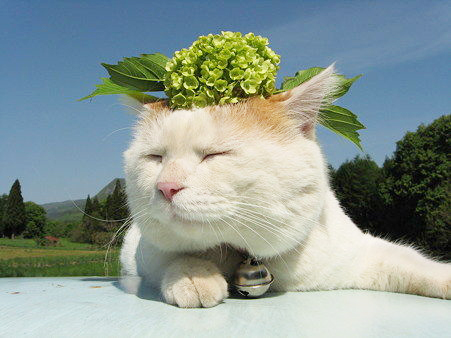

In [14]:
imgpath = './resources/cat01.jpg'
testimg = Image.open(imgpath)
testimg.show()

In [18]:
a = imagenet_transform(testimg)
a.shape

torch.Size([1, 3, 224, 224])

In [20]:
y = mymodel(imagenet_transform(testimg))
y.shape

torch.Size([1, 1000])

In [21]:
y.argmax(1)

tensor([283])

In [31]:
from icecream import ic

In [132]:
torch.set_printoptions(sci_mode=False, precision=4)

In [146]:
mymodel.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU(inplace=True)
    (14): MaxPool2d(ke

ic| name: 'features'
ic| name: 'avgpool'
ic| name: 'classifier'
ic| feature: tensor([[0.0000, 0.0000, 0.0000,  ..., 0.3552, 0.4647, 0.3530]],
                    grad_fn=<ViewBackward0>)
ic| one_hot: tensor([0.9792], grad_fn=<MaxBackward0>)
    idx: tensor([331])
ic| temp.shape: torch.Size([1, 512, 7, 7])
ic| temp.sum(dim=1).shape: torch.Size([1, 7, 7])
ic| saliency.shape: (224, 224)
ic| saliency.shape: (224, 224)
ic| saliency.shape: (224, 224, 3)


(224, 224, 3)

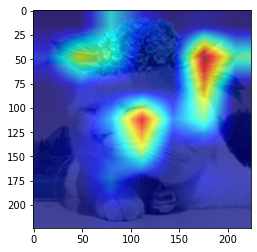

In [148]:
class Gradcam:
    
    def __init__(self, model):
        self.model = model
        self.feature = None
        self.gradient = None

    def restore_gradient(self, gradient):
#         ic(gradient.shape)
        self.gradient = gradient
    @staticmethod
    def Normalize(ts):
        minv = np.min(ts)
        ranv = np.max(ts) - minv
        ts = ts - minv
        if ranv:
            ts = ts / ranv
        return ts
    def __call__(self, x):
        img_size = (x.size(-1), x.size(-2))
        x = torch.autograd.Variable(x)
        assert x.size(0) == 1
        image = x[0].data.cpu().numpy()
        image = Gradcam.Normalize(image)
        feature = x
#         ic(x.shape)
        for name, module in self.model.named_children():
            ic(name)
            if name == 'classifier':
#                 ic(feature.shape)
                feature = feature.view(feature.size(0), -1)
                ic(feature)
            try:
                
                feature = module(feature)
                
            except:
                ic(module, feature.shape, name)
            if name == 'features':
#                 ic(feature.shape)
                feature.register_hook(self.restore_gradient)
                self.feature = feature
        classes = torch.sigmoid(feature)
        one_hot, idx = classes.max(dim=-1)
        ic(one_hot, idx)
        self.model.zero_grad()
        one_hot.backward()
#         ic(self.gradient.shape) # [1, 512, 7, 7]
        weight = self.gradient.mean(dim=-1, keepdim=True).mean(dim=-2, keepdim=True)
#         ic(weight.shape) # [1, 512, 1, 1]
#         ic(self.feature.shape) # torch.Size([1, 512, 7, 7])
#         ic(weight.view(-1))
#         ic(self.feature.view(-1))
        saliency = torch.nn.functional.relu((weight * self.feature).sum(dim=1).squeeze(0))
        if 1:
            temp = weight * self.feature 
            ic(temp.shape) # [1, 512, 7, 7]
            ic(temp.sum(dim=1).shape) # [1, 7, 7]
            
#         ic(saliency.shape) # [7, 7]
#         ic(saliency)
        saliency = cv2.resize(saliency.data.cpu().numpy(), img_size)
        ic(saliency.shape) # [224, 224]
        saliency = Gradcam.Normalize(saliency)
        saliency = np.uint8(255*saliency)
        ic(saliency.shape) # [224, 224]
        if 0:
            temp = cv2.applyColorMap(saliency, cv2.COLORMAP_JET)
            ic(temp.shape, temp.dtype) # temp.shape: (224, 224, 3), temp.dtype: dtype('uint8')
            plt.imshow(temp[..., ::-1])
        saliency = np.float32(cv2.applyColorMap(saliency, cv2.COLORMAP_JET))
        ic(saliency.shape) # [224, 224, 3]
        cam = 0.7 * saliency + 0.3 * np.float32((np.uint8(image.transpose((1,2,0))*255)))
        cam = Gradcam.Normalize(cam)
        cam = np.uint8(255*cam)
        return idx, cam
idx, cam = Gradcam(mymodel)(imagenet_transform(testimg))
cam.shape
plt.imshow(cam[...,::-1])

ic| name: 'features'
ic| name: 'avgpool'
ic| name: 'classifier'
ic| feature: tensor([[0.0000, 0.0000, 0.0000,  ..., 0.3552, 0.4647, 0.3530]],
                    grad_fn=<ViewBackward0>)
ic| one_hot: tensor([0.9792], grad_fn=<MaxBackward0>)
    idx: tensor([331])
ic| temp.shape: torch.Size([1, 512, 7, 7])
ic| temp.sum(dim=1).shape: torch.Size([1, 7, 7])
ic| saliency.shape: (224, 224)
ic| saliency.shape: (224, 224)
ic| saliency.shape: (224, 224, 3)


(224, 224, 3)

tensor([331])

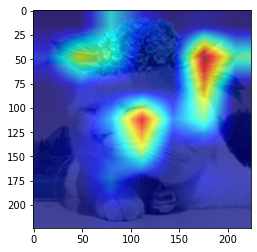

In [150]:
idx, cam = Gradcam(mymodel)(imagenet_transform(testimg))
cam.shape
plt.imshow(cam[...,::-1])
idx

In [124]:
a

0

In [125]:
b

0

In [39]:
a = torch.randn(1,3,2,2)
a = a.view(a.size(0),-1)
a.shape

torch.Size([1, 12])

In [60]:
a = torch.randn(1,10)
a.max(dim=1)

torch.return_types.max(
values=tensor([1.9898]),
indices=tensor([8]))

In [24]:
from torchvision import models
resnet18 = models.resnet18(pretrained=True)
alexnet = models.alexnet(pretrained=True)
# alexnet = models.AlexNet(pretrained=True, num_classes=2)
vgg11 = models.vgg11(pretrained=True)
# vgg13 = models.vgg13(pretrained=True)
vgg16 = models.vgg16(pretrained=True)
vgg19 = models.vgg19(pretrained=True)
vgg11bn = models.vgg11_bn(pretrained=True)
vgg13bn = models.vgg13_bn(pretrained=True)
vgg16bn = models.vgg16_bn(pretrained=True)
vgg19bn = models.vgg19_bn(pretrained=True)
squeezenet = models.squeezenet1_0(pretrained=True)
densenet = models.densenet161(pretrained=True)
inception = models.inception_v3(pretrained=True)
googlenet = models.googlenet(pretrained=True)
# googlenet = models.GoogLeNet(num_classes=10)
shufflenet = models.shufflenet_v2_x1_0(pretrained=True)
# shufflenet = models.ShuffleNetV2(num_classes=10)
mobilenet_v2 = models.mobilenet_v2(pretrained=True)
mobilenet_v3_large = models.mobilenet_v3_large(pretrained=True)
# mobilenet_v3_large = models.MobileNetV3(num_classes=10)
mobilenet_v3_small = models.mobilenet_v3_small(pretrained=True)
resnext50_32x4d = models.resnext50_32x4d(pretrained=True)
wide_resnet50_2 = models.wide_resnet50_2(pretrained=True)
mnasnet = models.mnasnet1_0(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

Downloading: "https://download.pytorch.org/models/vgg11-8a719046.pth" to /root/.cache/torch/hub/checkpoints/vgg11-8a719046.pth


  0%|          | 0.00/507M [00:00<?, ?B/s]

KeyboardInterrupt: 

# torch.linalg


In [6]:
from torch import linalg as LA
a = torch.arange(9, dtype=torch.float) - 4
a = a.cuda()
B = a.reshape((3, 3))

LA.norm(a)
LA.norm(B)
LA.norm(B, 'fro')
LA.norm(a, float('inf'))
LA.norm(B, float('inf'))
LA.norm(a, -float('inf'))
LA.norm(B, -float('inf'))

# LA.norm(a, 1)
# LA.norm(B, 1)
# LA.norm(a, -1)
# LA.norm(B, -1)
# LA.norm(a, 2)
# LA.norm(B, 2)

# LA.norm(a, -2)
# LA.norm(B.double(), -2)
# LA.norm(a, 3)
# LA.norm(a, -3)

tensor(7.7460, device='cuda:0')

tensor(7.7460, device='cuda:0')

tensor(7.7460, device='cuda:0')

tensor(4., device='cuda:0')

tensor(9., device='cuda:0')

tensor(0., device='cuda:0')

tensor(2., device='cuda:0')

In [21]:
B

tensor([[-4., -3., -2.],
        [-1.,  0.,  1.],
        [ 2.,  3.,  4.]], device='cuda:0')

In [19]:
torch.norm(a)
(a**2).sum().sqrt()

tensor(7.7460, device='cuda:0')

tensor(7.7460, device='cuda:0')

# opencv

In [208]:
imgpath = './resources/cat01.jpg'

In [216]:
img = cv2.imread(imgpath)
h, w, c = img.shape
img.shape

(338, 451, 3)

array([[  0.4330127 ,   0.25      ,  85.32214207],
       [ -0.25      ,   0.4330127 , 152.07085338]])

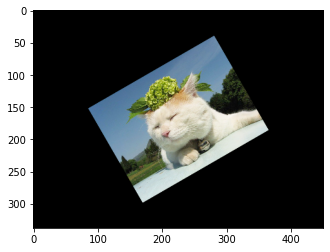

In [220]:
M = cv2.getRotationMatrix2D((w//2,h//2),30,0.5)
M
img2 = cv2.warpAffine(img, M, img.shape[:2][::-1])
plt.imshow(img2[...,::-1])

(338, 451, 3)

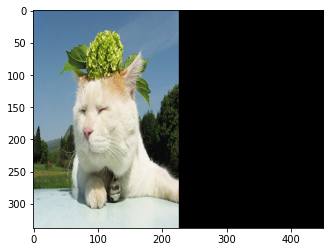

In [225]:
pts1 = np.float32([[0,0],[0, h-1],[w-1,0]])
pts2 = np.float32([[0,0],[0, h-1],[w//2,0]])
M = cv2.getAffineTransform(pts1, pts2)
img2 = cv2.warpAffine(img, M, img.shape[:2][::-1])
img2.shape
plt.imshow(img2[...,::-1])

(338, 451, 3)

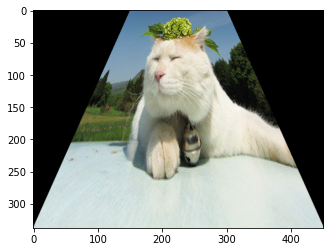

In [228]:
pts1 = np.float32([[0,0],[0, h-1],[w-1,0],[w-1, h-1]])
pts2 = np.float32([[w//3,0],[0, h-1],[w*2//3,0],[w-1, h-1]])
M = cv2.getPerspectiveTransform(pts1, pts2)
img2 = cv2.warpPerspective(img, M, img.shape[:2][::-1])
img2.shape
plt.imshow(img2[...,::-1])

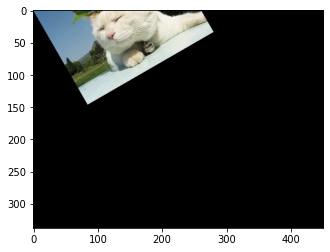

# transformer

In [2]:
56*56

3136

In [2]:
import torch.nn as nn

In [ ]:
transformer_model = nn.Transformer(nhead=16, num_encoder_layers=12)

In [8]:
# transformer_model = nn.Transformer(nhead=16, num_encoder_layers=12)
src = torch.rand((10, 32, 512))
tgt = torch.rand((200, 32, 512))
out = transformer_model(src, tgt)
out.shape

torch.Size([200, 32, 512])

In [25]:
out.shape

torch.Size([20, 32, 512])

In [27]:
encoder_layer = nn.TransformerEncoderLayer(d_model=512, nhead=8)
src = torch.rand(10, 32, 512)
out = encoder_layer(src)
out.shape

torch.Size([10, 32, 512])

In [28]:
nn.Transformer().generate_square_subsequent_mask(5)

tensor([[0., -inf, -inf, -inf, -inf],
        [0., 0., -inf, -inf, -inf],
        [0., 0., 0., -inf, -inf],
        [0., 0., 0., 0., -inf],
        [0., 0., 0., 0., 0.]])

In [30]:
import math
from typing import Tuple

import torch
from torch import nn, Tensor
import torch.nn.functional as F
from torch.nn import TransformerEncoder, TransformerEncoderLayer
from torch.utils.data import dataset

class TransformerModel(nn.Module):

    def __init__(self, ntoken: int, d_model: int, nhead: int, d_hid: int,
                 nlayers: int, dropout: float = 0.5):
        super().__init__()
        self.model_type = 'Transformer'
        self.pos_encoder = PositionalEncoding(d_model, dropout)
        encoder_layers = TransformerEncoderLayer(d_model, nhead, d_hid, dropout)
        self.transformer_encoder = TransformerEncoder(encoder_layers, nlayers)
        self.encoder = nn.Embedding(ntoken, d_model)
        self.d_model = d_model
        self.decoder = nn.Linear(d_model, ntoken)

        self.init_weights()

    def init_weights(self) -> None:
        initrange = 0.1
        self.encoder.weight.data.uniform_(-initrange, initrange)
        self.decoder.bias.data.zero_()
        self.decoder.weight.data.uniform_(-initrange, initrange)

    def forward(self, src: Tensor, src_mask: Tensor) -> Tensor:
        """
        Args:
            src: Tensor, shape [seq_len, batch_size]
            src_mask: Tensor, shape [seq_len, seq_len]

        Returns:
            output Tensor of shape [seq_len, batch_size, ntoken]
        """
        src = self.encoder(src) * math.sqrt(self.d_model)
        src = self.pos_encoder(src)
        ic(src.shape)
        output = self.transformer_encoder(src, src_mask)
        ic(output.shape)
        output = self.decoder(output)
        return output


def generate_square_subsequent_mask(sz: int) -> Tensor:
    """Generates an upper-triangular matrix of -inf, with zeros on diag."""
    return torch.triu(torch.ones(sz, sz) * float('-inf'), diagonal=1)

In [33]:
class PositionalEncoding(nn.Module):

    def __init__(self, d_model: int, dropout: float = 0.1, max_len: int = 5000):
        super().__init__()
        self.dropout = nn.Dropout(p=dropout)

        position = torch.arange(max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * (-math.log(10000.0) / d_model))
        pe = torch.zeros(max_len, 1, d_model)
        pe[:, 0, 0::2] = torch.sin(position * div_term)
        pe[:, 0, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe)

    def forward(self, x: Tensor) -> Tensor:
        """
        Args:
            x: Tensor, shape [seq_len, batch_size, embedding_dim]
        """
        x = x + self.pe[:x.size(0)]
        return self.dropout(x)

In [41]:
device = 'cpu'
bptt = 35
src_mask = generate_square_subsequent_mask(bptt).to(device)
ntokens = 100  # size of vocabulary
emsize = 200  # embedding dimension
d_hid = 200  # dimension of the feedforward network model in nn.TransformerEncoder
nlayers = 2  # number of nn.TransformerEncoderLayer in nn.TransformerEncoder
nhead = 2  # number of heads in nn.MultiheadAttention
dropout = 0.2  # dropout probability
model = TransformerModel(ntokens, emsize, nhead, d_hid, nlayers, dropout).to(device)
src = torch.rand((10, 32, 512))
tgt = torch.rand((20, 32, 512))
# src_mask
# out = model(src, src_mask)
# out.shape

tensor([[0., -inf, -inf,  ..., -inf, -inf, -inf],
        [0., 0., -inf,  ..., -inf, -inf, -inf],
        [0., 0., 0.,  ..., -inf, -inf, -inf],
        ...,
        [0., 0., 0.,  ..., 0., -inf, -inf],
        [0., 0., 0.,  ..., 0., 0., -inf],
        [0., 0., 0.,  ..., 0., 0., 0.]])

## roll

In [26]:
a = torch.arange(16).reshape(4, 4)
a
a.roll(2)
a.roll(-1, dims=0)
a.roll(-1, dims=1)
a.roll(shifts=(-1, -1), dims=(0, 1))

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]])

tensor([[14, 15,  0,  1],
        [ 2,  3,  4,  5],
        [ 6,  7,  8,  9],
        [10, 11, 12, 13]])

tensor([[ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [ 0,  1,  2,  3]])

tensor([[ 1,  2,  3,  0],
        [ 5,  6,  7,  4],
        [ 9, 10, 11,  8],
        [13, 14, 15, 12]])

tensor([[ 5,  6,  7,  4],
        [ 9, 10, 11,  8],
        [13, 14, 15, 12],
        [ 1,  2,  3,  0]])

In [22]:
torch.roll?

In [27]:
49*49

2401

In [29]:
49*4
49*3

196

147

In [3]:
a = torch.arange(9).reshape(3,3)
a
a1 = a.unsqueeze(1)
a2 = a.unsqueeze(2)
a1
a2
a3 = a1 - a2
a1.shape
a2.shape
a3
a3.shape

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

tensor([[[0, 1, 2]],

        [[3, 4, 5]],

        [[6, 7, 8]]])

tensor([[[0],
         [1],
         [2]],

        [[3],
         [4],
         [5]],

        [[6],
         [7],
         [8]]])

torch.Size([3, 1, 3])

torch.Size([3, 3, 1])

tensor([[[ 0,  1,  2],
         [-1,  0,  1],
         [-2, -1,  0]],

        [[ 0,  1,  2],
         [-1,  0,  1],
         [-2, -1,  0]],

        [[ 0,  1,  2],
         [-1,  0,  1],
         [-2, -1,  0]]])

torch.Size([3, 3, 3])

In [53]:
a1
b1 = a1.repeat(1, 3, 1)
a2
b2 = a2.repeat(1, 1, 3)

tensor([[[0, 1, 2]],

        [[3, 4, 5]],

        [[6, 7, 8]]])

tensor([[[0],
         [1],
         [2]],

        [[3],
         [4],
         [5]],

        [[6],
         [7],
         [8]]])

In [56]:
a
b1
b2
i = -1
b1[i,i]
b2[i,i]

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

tensor([[[0, 1, 2],
         [0, 1, 2],
         [0, 1, 2]],

        [[3, 4, 5],
         [3, 4, 5],
         [3, 4, 5]],

        [[6, 7, 8],
         [6, 7, 8],
         [6, 7, 8]]])

tensor([[[0, 0, 0],
         [1, 1, 1],
         [2, 2, 2]],

        [[3, 3, 3],
         [4, 4, 4],
         [5, 5, 5]],

        [[6, 6, 6],
         [7, 7, 7],
         [8, 8, 8]]])

tensor([6, 7, 8])

tensor([8, 8, 8])

In [94]:
a1 = torch.zeros(3,3)
a2 = torch.ones(3,2)
a3 = torch.ones(3,1) * 2
a1
a2
a3
c1 = torch.cat((a1, a2, a3), dim=1)
b1 = torch.ones(2, 3) * 3
b2 = torch.ones(2, 2) * 4
b3 = torch.ones(2, 1) * 5
c2 = torch.cat((b1, b2, b3), dim=1)
d1 = torch.ones(1, 3) * 6
d2 = torch.ones(1, 2) * 7
d3 = torch.ones(1, 1) * 8
c3 = torch.cat((d1, d2, d3), dim=1)
c3
e = torch.cat((c1, c2, c3))
e
e.shape

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

tensor([[2.],
        [2.],
        [2.]])

tensor([[6., 6., 6., 7., 7., 8.]])

tensor([[0., 0., 0., 1., 1., 2.],
        [0., 0., 0., 1., 1., 2.],
        [0., 0., 0., 1., 1., 2.],
        [3., 3., 3., 4., 4., 5.],
        [3., 3., 3., 4., 4., 5.],
        [6., 6., 6., 7., 7., 8.]])

torch.Size([6, 6])

In [95]:
e_ = e.roll((-1,-1),dims=(0,1))
e_

tensor([[0., 0., 1., 1., 2., 0.],
        [0., 0., 1., 1., 2., 0.],
        [3., 3., 4., 4., 5., 3.],
        [3., 3., 4., 4., 5., 3.],
        [6., 6., 7., 7., 8., 6.],
        [0., 0., 1., 1., 2., 0.]])

In [101]:
e_.shape
e_@ e_.t()

torch.Size([6, 6])

tensor([[  6.,   6.,  18.,  18.,  30.,   6.],
        [  6.,   6.,  18.,  18.,  30.,   6.],
        [ 18.,  18.,  84.,  84., 150.,  18.],
        [ 18.,  18.,  84.,  84., 150.,  18.],
        [ 30.,  30., 150., 150., 270.,  30.],
        [  6.,   6.,  18.,  18.,  30.,   6.]])

In [96]:
e1 = e_.unsqueeze(1)
e2 = e_.unsqueeze(2)
e1.shape
e2.shape

torch.Size([6, 1, 6])

torch.Size([6, 6, 1])

In [99]:
# e1.repeat(1,6,1)
# e2.repeat(1,1,6)

In [103]:
e3 = e1 - e2
e3
e3 + 2

tensor([[[ 0.,  0.,  1.,  1.,  2.,  0.],
         [ 0.,  0.,  1.,  1.,  2.,  0.],
         [-1., -1.,  0.,  0.,  1., -1.],
         [-1., -1.,  0.,  0.,  1., -1.],
         [-2., -2., -1., -1.,  0., -2.],
         [ 0.,  0.,  1.,  1.,  2.,  0.]],

        [[ 0.,  0.,  1.,  1.,  2.,  0.],
         [ 0.,  0.,  1.,  1.,  2.,  0.],
         [-1., -1.,  0.,  0.,  1., -1.],
         [-1., -1.,  0.,  0.,  1., -1.],
         [-2., -2., -1., -1.,  0., -2.],
         [ 0.,  0.,  1.,  1.,  2.,  0.]],

        [[ 0.,  0.,  1.,  1.,  2.,  0.],
         [ 0.,  0.,  1.,  1.,  2.,  0.],
         [-1., -1.,  0.,  0.,  1., -1.],
         [-1., -1.,  0.,  0.,  1., -1.],
         [-2., -2., -1., -1.,  0., -2.],
         [ 0.,  0.,  1.,  1.,  2.,  0.]],

        [[ 0.,  0.,  1.,  1.,  2.,  0.],
         [ 0.,  0.,  1.,  1.,  2.,  0.],
         [-1., -1.,  0.,  0.,  1., -1.],
         [-1., -1.,  0.,  0.,  1., -1.],
         [-2., -2., -1., -1.,  0., -2.],
         [ 0.,  0.,  1.,  1.,  2.,  0.]],

        

tensor([[[2., 2., 3., 3., 4., 2.],
         [2., 2., 3., 3., 4., 2.],
         [1., 1., 2., 2., 3., 1.],
         [1., 1., 2., 2., 3., 1.],
         [0., 0., 1., 1., 2., 0.],
         [2., 2., 3., 3., 4., 2.]],

        [[2., 2., 3., 3., 4., 2.],
         [2., 2., 3., 3., 4., 2.],
         [1., 1., 2., 2., 3., 1.],
         [1., 1., 2., 2., 3., 1.],
         [0., 0., 1., 1., 2., 0.],
         [2., 2., 3., 3., 4., 2.]],

        [[2., 2., 3., 3., 4., 2.],
         [2., 2., 3., 3., 4., 2.],
         [1., 1., 2., 2., 3., 1.],
         [1., 1., 2., 2., 3., 1.],
         [0., 0., 1., 1., 2., 0.],
         [2., 2., 3., 3., 4., 2.]],

        [[2., 2., 3., 3., 4., 2.],
         [2., 2., 3., 3., 4., 2.],
         [1., 1., 2., 2., 3., 1.],
         [1., 1., 2., 2., 3., 1.],
         [0., 0., 1., 1., 2., 0.],
         [2., 2., 3., 3., 4., 2.]],

        [[2., 2., 3., 3., 4., 2.],
         [2., 2., 3., 3., 4., 2.],
         [1., 1., 2., 2., 3., 1.],
         [1., 1., 2., 2., 3., 1.],
         [0.

In [92]:
x1 = torch.Tensor([[1,1,2],[1,1,2],[1,1,2]])
x1
x2 = x1.unsqueeze(1) - x1.unsqueeze(2)
x1.unsqueeze(1)
x1.unsqueeze(2)
x2

tensor([[1., 1., 2.],
        [1., 1., 2.],
        [1., 1., 2.]])

tensor([[[1., 1., 2.]],

        [[1., 1., 2.]],

        [[1., 1., 2.]]])

tensor([[[1.],
         [1.],
         [2.]],

        [[1.],
         [1.],
         [2.]],

        [[1.],
         [1.],
         [2.]]])

tensor([[[ 0.,  0.,  1.],
         [ 0.,  0.,  1.],
         [-1., -1.,  0.]],

        [[ 0.,  0.,  1.],
         [ 0.,  0.,  1.],
         [-1., -1.,  0.]],

        [[ 0.,  0.,  1.],
         [ 0.,  0.,  1.],
         [-1., -1.,  0.]]])

In [93]:
x1 = torch.Tensor([[1,1,1,2,2,3]]).repeat(6,1)
x1
x2 = x1.unsqueeze(1) - x1.unsqueeze(2)
x1.unsqueeze(1)
x1.unsqueeze(2)
x2

tensor([[1., 1., 1., 2., 2., 3.],
        [1., 1., 1., 2., 2., 3.],
        [1., 1., 1., 2., 2., 3.],
        [1., 1., 1., 2., 2., 3.],
        [1., 1., 1., 2., 2., 3.],
        [1., 1., 1., 2., 2., 3.]])

tensor([[[1., 1., 1., 2., 2., 3.]],

        [[1., 1., 1., 2., 2., 3.]],

        [[1., 1., 1., 2., 2., 3.]],

        [[1., 1., 1., 2., 2., 3.]],

        [[1., 1., 1., 2., 2., 3.]],

        [[1., 1., 1., 2., 2., 3.]]])

tensor([[[1.],
         [1.],
         [1.],
         [2.],
         [2.],
         [3.]],

        [[1.],
         [1.],
         [1.],
         [2.],
         [2.],
         [3.]],

        [[1.],
         [1.],
         [1.],
         [2.],
         [2.],
         [3.]],

        [[1.],
         [1.],
         [1.],
         [2.],
         [2.],
         [3.]],

        [[1.],
         [1.],
         [1.],
         [2.],
         [2.],
         [3.]],

        [[1.],
         [1.],
         [1.],
         [2.],
         [2.],
         [3.]]])

tensor([[[ 0.,  0.,  0.,  1.,  1.,  2.],
         [ 0.,  0.,  0.,  1.,  1.,  2.],
         [ 0.,  0.,  0.,  1.,  1.,  2.],
         [-1., -1., -1.,  0.,  0.,  1.],
         [-1., -1., -1.,  0.,  0.,  1.],
         [-2., -2., -2., -1., -1.,  0.]],

        [[ 0.,  0.,  0.,  1.,  1.,  2.],
         [ 0.,  0.,  0.,  1.,  1.,  2.],
         [ 0.,  0.,  0.,  1.,  1.,  2.],
         [-1., -1., -1.,  0.,  0.,  1.],
         [-1., -1., -1.,  0.,  0.,  1.],
         [-2., -2., -2., -1., -1.,  0.]],

        [[ 0.,  0.,  0.,  1.,  1.,  2.],
         [ 0.,  0.,  0.,  1.,  1.,  2.],
         [ 0.,  0.,  0.,  1.,  1.,  2.],
         [-1., -1., -1.,  0.,  0.,  1.],
         [-1., -1., -1.,  0.,  0.,  1.],
         [-2., -2., -2., -1., -1.,  0.]],

        [[ 0.,  0.,  0.,  1.,  1.,  2.],
         [ 0.,  0.,  0.,  1.,  1.,  2.],
         [ 0.,  0.,  0.,  1.,  1.,  2.],
         [-1., -1., -1.,  0.,  0.,  1.],
         [-1., -1., -1.,  0.,  0.,  1.],
         [-2., -2., -2., -1., -1.,  0.]],

        

In [104]:
x1 = torch.Tensor([[4,4,4,5,5],[7,7,7,8,8]])
x1
x2 = x1.unsqueeze(1) - x1.unsqueeze(2)
x1.unsqueeze(1)
x1.unsqueeze(2)
x2

tensor([[4., 4., 4., 5., 5.],
        [7., 7., 7., 8., 8.]])

tensor([[[4., 4., 4., 5., 5.]],

        [[7., 7., 7., 8., 8.]]])

tensor([[[4.],
         [4.],
         [4.],
         [5.],
         [5.]],

        [[7.],
         [7.],
         [7.],
         [8.],
         [8.]]])

tensor([[[ 0.,  0.,  0.,  1.,  1.],
         [ 0.,  0.,  0.,  1.,  1.],
         [ 0.,  0.,  0.,  1.,  1.],
         [-1., -1., -1.,  0.,  0.],
         [-1., -1., -1.,  0.,  0.]],

        [[ 0.,  0.,  0.,  1.,  1.],
         [ 0.,  0.,  0.,  1.,  1.],
         [ 0.,  0.,  0.,  1.,  1.],
         [-1., -1., -1.,  0.,  0.],
         [-1., -1., -1.,  0.,  0.]]])

In [112]:
x1 = torch.Tensor([[3,3,4,4],[3,3,4,4],[7,7,8,8], [7,7,8,8]])
x1
x2 = x1.flatten().unsqueeze(0) - x1.flatten().unsqueeze(1)
x1.flatten().unsqueeze(0) 
x1.flatten().unsqueeze(1) 
x2.numpy().astype(np.int64)

tensor([[3., 3., 4., 4.],
        [3., 3., 4., 4.],
        [7., 7., 8., 8.],
        [7., 7., 8., 8.]])

tensor([[3., 3., 4., 4., 3., 3., 4., 4., 7., 7., 8., 8., 7., 7., 8., 8.]])

tensor([[3.],
        [3.],
        [4.],
        [4.],
        [3.],
        [3.],
        [4.],
        [4.],
        [7.],
        [7.],
        [8.],
        [8.],
        [7.],
        [7.],
        [8.],
        [8.]])

array([[ 0,  0,  1,  1,  0,  0,  1,  1,  4,  4,  5,  5,  4,  4,  5,  5],
       [ 0,  0,  1,  1,  0,  0,  1,  1,  4,  4,  5,  5,  4,  4,  5,  5],
       [-1, -1,  0,  0, -1, -1,  0,  0,  3,  3,  4,  4,  3,  3,  4,  4],
       [-1, -1,  0,  0, -1, -1,  0,  0,  3,  3,  4,  4,  3,  3,  4,  4],
       [ 0,  0,  1,  1,  0,  0,  1,  1,  4,  4,  5,  5,  4,  4,  5,  5],
       [ 0,  0,  1,  1,  0,  0,  1,  1,  4,  4,  5,  5,  4,  4,  5,  5],
       [-1, -1,  0,  0, -1, -1,  0,  0,  3,  3,  4,  4,  3,  3,  4,  4],
       [-1, -1,  0,  0, -1, -1,  0,  0,  3,  3,  4,  4,  3,  3,  4,  4],
       [-4, -4, -3, -3, -4, -4, -3, -3,  0,  0,  1,  1,  0,  0,  1,  1],
       [-4, -4, -3, -3, -4, -4, -3, -3,  0,  0,  1,  1,  0,  0,  1,  1],
       [-5, -5, -4, -4, -5, -5, -4, -4, -1, -1,  0,  0, -1, -1,  0,  0],
       [-5, -5, -4, -4, -5, -5, -4, -4, -1, -1,  0,  0, -1, -1,  0,  0],
       [-4, -4, -3, -3, -4, -4, -3, -3,  0,  0,  1,  1,  0,  0,  1,  1],
       [-4, -4, -3, -3, -4, -4, -3, -3,  0,  0,  1,

In [117]:
x2.shape
x2_ = x2.reshape(4,4,4,4)
x2_
x2_.transpose(1,2)

torch.Size([16, 16])

tensor([[[[ 0.,  0.,  1.,  1.],
          [ 0.,  0.,  1.,  1.],
          [ 4.,  4.,  5.,  5.],
          [ 4.,  4.,  5.,  5.]],

         [[ 0.,  0.,  1.,  1.],
          [ 0.,  0.,  1.,  1.],
          [ 4.,  4.,  5.,  5.],
          [ 4.,  4.,  5.,  5.]],

         [[-1., -1.,  0.,  0.],
          [-1., -1.,  0.,  0.],
          [ 3.,  3.,  4.,  4.],
          [ 3.,  3.,  4.,  4.]],

         [[-1., -1.,  0.,  0.],
          [-1., -1.,  0.,  0.],
          [ 3.,  3.,  4.,  4.],
          [ 3.,  3.,  4.,  4.]]],


        [[[ 0.,  0.,  1.,  1.],
          [ 0.,  0.,  1.,  1.],
          [ 4.,  4.,  5.,  5.],
          [ 4.,  4.,  5.,  5.]],

         [[ 0.,  0.,  1.,  1.],
          [ 0.,  0.,  1.,  1.],
          [ 4.,  4.,  5.,  5.],
          [ 4.,  4.,  5.,  5.]],

         [[-1., -1.,  0.,  0.],
          [-1., -1.,  0.,  0.],
          [ 3.,  3.,  4.,  4.],
          [ 3.,  3.,  4.,  4.]],

         [[-1., -1.,  0.,  0.],
          [-1., -1.,  0.,  0.],
          [ 3.,  3.,  4.

tensor([[[[ 0.,  0.,  1.,  1.],
          [ 0.,  0.,  1.,  1.],
          [-1., -1.,  0.,  0.],
          [-1., -1.,  0.,  0.]],

         [[ 0.,  0.,  1.,  1.],
          [ 0.,  0.,  1.,  1.],
          [-1., -1.,  0.,  0.],
          [-1., -1.,  0.,  0.]],

         [[ 4.,  4.,  5.,  5.],
          [ 4.,  4.,  5.,  5.],
          [ 3.,  3.,  4.,  4.],
          [ 3.,  3.,  4.,  4.]],

         [[ 4.,  4.,  5.,  5.],
          [ 4.,  4.,  5.,  5.],
          [ 3.,  3.,  4.,  4.],
          [ 3.,  3.,  4.,  4.]]],


        [[[ 0.,  0.,  1.,  1.],
          [ 0.,  0.,  1.,  1.],
          [-1., -1.,  0.,  0.],
          [-1., -1.,  0.,  0.]],

         [[ 0.,  0.,  1.,  1.],
          [ 0.,  0.,  1.,  1.],
          [-1., -1.,  0.,  0.],
          [-1., -1.,  0.,  0.]],

         [[ 4.,  4.,  5.,  5.],
          [ 4.,  4.,  5.,  5.],
          [ 3.,  3.,  4.,  4.],
          [ 3.,  3.,  4.,  4.]],

         [[ 4.,  4.,  5.,  5.],
          [ 4.,  4.,  5.,  5.],
          [ 3.,  3.,  4.

In [70]:
x = np.arange(4).reshape(2,2)
x

array([[0, 1],
       [2, 3]])

In [75]:
np.tile(x,(2,2))
np.repeat(x, 2, axis=1)

array([[0, 1, 0, 1],
       [2, 3, 2, 3],
       [0, 1, 0, 1],
       [2, 3, 2, 3]])

array([[0, 0, 1, 1],
       [2, 2, 3, 3]])

In [76]:
y = torch.arange(4).reshape(2,2)
y

tensor([[0, 1],
        [2, 3]])

In [79]:
# torch.repeat(y,(2,2))
y.repeat(2,2)

tensor([[0, 1, 0, 1],
        [2, 3, 2, 3],
        [0, 1, 0, 1],
        [2, 3, 2, 3]])

## layer normal

In [19]:
import torch.nn as nn


In [20]:
nn.LayerNorm?

In [25]:
# NLP Example
batch, sentence_length, embedding_dim = 20, 5, 10
embedding = torch.randn(batch, sentence_length, embedding_dim)
layer_norm = nn.LayerNorm(embedding_dim)
# Activate module
layer_norm(embedding).shape

# Image Example
N, C, H, W = 20, 5, 10, 10
input1 = torch.randn(N, C, H, W)
# Normalize over the last three dimensions (i.e. the channel and spatial dimensions)
# as shown in the image below
layer_norm = nn.LayerNorm([C, H, W])
output = layer_norm(input1)
output.shape

torch.Size([20, 5, 10])

torch.Size([20, 5, 10, 10])

In [60]:
a = torch.arange(1,25).reshape(2,3,4).float()
a
layer_norm = nn.LayerNorm([2,3,4])
b = layer_norm(a)
b

tensor([[[ 1.,  2.,  3.,  4.],
         [ 5.,  6.,  7.,  8.],
         [ 9., 10., 11., 12.]],

        [[13., 14., 15., 16.],
         [17., 18., 19., 20.],
         [21., 22., 23., 24.]]])

tensor([[[-1.6613, -1.5169, -1.3724, -1.2279],
         [-1.0835, -0.9390, -0.7945, -0.6501],
         [-0.5056, -0.3612, -0.2167, -0.0722]],

        [[ 0.0722,  0.2167,  0.3612,  0.5056],
         [ 0.6501,  0.7945,  0.9390,  1.0835],
         [ 1.2279,  1.3724,  1.5169,  1.6613]]],
       grad_fn=<NativeLayerNormBackward0>)

In [58]:
# dir(layer_norm)
layer_norm.weight
layer_norm.bias

Parameter containing:
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]], requires_grad=True)

Parameter containing:
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]], requires_grad=True)

In [31]:
(1+4+7)/3

4.0

In [61]:
c = a[0]
c
m = c.mean()
s = c.std(unbiased=False)
m
s
(c-m)/s
# c.mean()
# c.mean(0)
# c.mean(1)

tensor([[[ 1.,  2.,  3.,  4.],
         [ 5.,  6.,  7.,  8.],
         [ 9., 10., 11., 12.]],

        [[13., 14., 15., 16.],
         [17., 18., 19., 20.],
         [21., 22., 23., 24.]]])

tensor(12.5000)

tensor(6.9222)

tensor([[[-1.6613, -1.5169, -1.3724, -1.2279],
         [-1.0835, -0.9390, -0.7945, -0.6501],
         [-0.5056, -0.3612, -0.2167, -0.0722]],

        [[ 0.0722,  0.2167,  0.3612,  0.5056],
         [ 0.6501,  0.7945,  0.9390,  1.0835],
         [ 1.2279,  1.3724,  1.5169,  1.6613]]])

In [45]:
torch.std?

## instance norm

In [62]:
# Without Learnable Parameters
m = nn.InstanceNorm1d(100)
# With Learnable Parameters
m = nn.InstanceNorm1d(100, affine=True)
input1 = torch.randn(20, 100, 40)
output = m(input1)
output.shape

torch.Size([20, 100, 40])

## Detr

In [129]:
# torch.random.seed()
torch.manual_seed(10)
a = torch.randint(0,2,(3,3))
a
a.cumsum(0)
a.cumsum(1)

tensor([[1, 1, 0],
        [1, 0, 1],
        [1, 0, 1]])

tensor([[1, 1, 0],
        [2, 1, 1],
        [3, 1, 2]])

tensor([[1, 2, 2],
        [1, 1, 2],
        [1, 1, 2]])

In [120]:
torch.random.seed?

In [70]:
a = torch.arange(16).reshape(4,4)
a
b = torch.stack((a[...,0::2], a[..., 1::2]), dim=2)
b.shape
b
a[...,0::2]
a[...,1::2]
# torch.stack((a[...,0::2], a[..., 1::2]), dim=3)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]])

torch.Size([4, 2, 2])

tensor([[[ 0,  1],
         [ 2,  3]],

        [[ 4,  5],
         [ 6,  7]],

        [[ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15]]])

tensor([[ 0,  2],
        [ 4,  6],
        [ 8, 10],
        [12, 14]])

tensor([[ 1,  3],
        [ 5,  7],
        [ 9, 11],
        [13, 15]])

In [70]:
a = torch.arange(16).reshape(4,4)
a
b = torch.stack((a[...,0::2], a[..., 1::2]), dim=2)
b.shape
b
a[...,0::2]
a[...,1::2]
# torch.stack((a[...,0::2], a[..., 1::2]), dim=3)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]])

torch.Size([4, 2, 2])

tensor([[[ 0,  1],
         [ 2,  3]],

        [[ 4,  5],
         [ 6,  7]],

        [[ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15]]])

tensor([[ 0,  2],
        [ 4,  6],
        [ 8, 10],
        [12, 14]])

tensor([[ 1,  3],
        [ 5,  7],
        [ 9, 11],
        [13, 15]])

# yolov5

## iounms

In [17]:
def iou(boxes, order):
    '''
    注意最好要加1
    '''
    boxes_area = (boxes[...,2]-boxes[..., 0] + 1) * (boxes[..., 3] - boxes[..., 1] + 1)
    id0 = order[0]
    id1 = order[1:]
    box0 = boxes[id0]
    boxes1 = boxes[id1]
    x1 = np.maximum(box0[..., 0], boxes1[..., 0])
    y1 = np.maximum(box0[..., 1], boxes1[..., 1])
    x2 = np.minimum(box0[..., 2], boxes1[..., 2])
    y2 = np.minimum(box0[..., 3], boxes1[..., 3])
    w = np.maximum(0, (x2 - x1 + 1))
    h = np.maximum(0, (y2 - y1 + 1))
    inter = w * h
    iou_value = inter / (boxes_area[id0] + boxes_area[id1] - inter)
    return iou_value

In [95]:
a = np.arange(4).reshape(2,2)
a.ndim

2

In [102]:
def iou(box, boxes):
    box = np.array(box)
    boxes = np.array(boxes)
    def area(box):
        if box.ndim == 2:
            return ((box[:,2]-box[:,0])*(box[:,3]-box[:,1]))
        return ((box[2]-box[0])*(box[3]-box[1]))
    
    x1 = np.maximum(box[0], boxes[:,0])
    y1 = np.maximum(box[1], boxes[:,1])
    x2 = np.minimum(box[2], boxes[:,2])
    y2 = np.minimum(box[3], boxes[:,3])
    w = np.maximum(0, (x2 - x1))
    h = np.maximum(0, (y2 - y1))
    inter = w * h
    iou_value = inter / (area(box) + area(boxes) - inter)
    return iou_value
iou([0,0,100,100], [[0,0, 100,100],[50,50,100,100]])

ic| x1.shape: (2,), x2.shape: (2,)
ic| inter: array([10000,  2500])


array([1.  , 0.25])

In [94]:
def iou(box1, box2):
    def area(box):
        return ((box[2]-box[0])*(box[3]-box[1]))
    x1 = np.maximum(box1[0], box2[0])
    y1 = np.maximum(box1[1], box2[1])
    x2 = np.minimum(box1[2], box2[2])
    y2 = np.minimum(box1[3], box2[3])
    w = np.maximum(0, (x2 - x1))
    h = np.maximum(0, (y2 - y1))
    inter = w * h
    ic(inter)
    ic(area(box1), area(box2))
    iou_value = inter / (area(box1) + area(box2) - inter)
    return iou_value
iou([0,0,100,100], [0,0, 100,100])

ic| inter: 10000
ic| area(box1): 10000, area(box2): 10000


1.0

In [28]:
def nms(boxes, scores, nmsthresh):
    '''
    返回索引
    '''
    orders = np.argsort(scores)[::-1]
    keep = []
    while orders.size:
        keep.append(orders[0])
        iouvalue = iou(boxes, orders)
        orders = orders[1:][iouvalue <= nmsthresh]
    return keep

In [30]:
a = np.array([[100, 100, 200, 200, 0.5],
              [105, 105, 180, 180, 0.8],
              [150, 150, 300, 300, 0.6],
              [160, 160, 250, 250, 0.7],
              [170, 170, 230, 230, 0.9],
              [120, 120, 300, 300, 0.4]])
# a = np.array([[100, 100, 200, 200, 0.5]])
nmsthresh = 0.5
boxes = a[:, :4]
scores = a[:, 4]
orders = np.argsort(scores)[::-1]
orders
iou(boxes, orders)
a.size
nms(boxes, scores, nmsthresh)

array([4, 1, 3, 2, 0, 5], dtype=int64)

array([0.01290529, 0.44934187, 0.1631946 , 0.07414551, 0.11358017])

30

[4, 1, 3, 2]

### test

In [8]:
a = torch.randint(0, 10, (5,))
a
# np.argsort?
a[...,1]

tensor([6, 2, 5, 1, 8])

tensor(2)

In [5]:
a = np.random.randn(10)
a



array([-1.49724368, -1.77295993,  0.46187661, -0.92514216,  0.82166305,
        0.19509826,  0.08479507, -2.22741571, -2.12905062,  0.30991234])

In [ ]:
np.clip?

In [7]:
torch.clamp?

## Mish

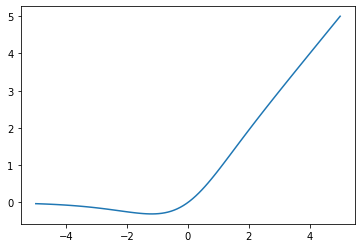

In [8]:
x = np.linspace(-5,5,100)
y = x*np.tanh(np.log(1+np.exp(x)))
# y = np.tanh(x)
plt.plot(x, y)

## CIoU

(148.4131591025766, 0.36787944117144233)

[0.35251342 0.37260635 0.3936141  0.41553955 0.43837881 0.46212036
 0.48674423 0.51222136 0.53851296 0.56557017 0.59333387 0.62173486
 0.65069421 0.6801241  0.70992879 0.7400061  0.77024897 0.80054736
 0.83079023 0.86086753 0.89067223 0.92010211 0.94906147 0.97746246
 1.00522616 1.03228336 1.05857496 1.08405209 1.10867597 1.13241751
 1.15525677 1.17718222 1.19818997 1.21828291 1.23746982 1.2557646
 1.27318534 1.28975368 1.30549399 1.32043282 1.33459833 1.34801975
 1.36072699 1.37275027 1.38411982 1.39486562 1.40501719 1.41460343
 1.42365249 1.43219167 1.44024734 1.44784491 1.45500876 1.46176228
 1.46812779 1.47412662 1.47977907 1.48510446 1.49012115 1.49484655
 1.49929718 1.50348868 1.50743586 1.51115274 1.51465255 1.5179478
 1.52105033 1.52397129 1.52672121 1.52931003 1.53174712 1.53404132
 1.53620096 1.53823389 1.54014752 1.54194883 1.54364438 1.54524036
 1.54674261 1.54815661 1.54948755 1.55074029 1.55191942 1.55302925
 1.55407386 1.55505708 1.5559825  1.55685353 1.55767335 1.558444

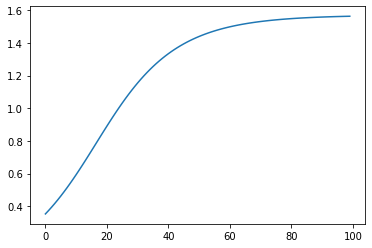

In [16]:
x = np.linspace(-1,5,100)
y = np.exp(x)
y.max(), y.min()
# plt.plot(x, y)
print(np.arctan(y))
z = np.arctan(y)
plt.plot(z)

In [18]:
x = np.linspace(0,100)
y = np.arctan(x)
y.max(), y.min()

(1.5607966601082315, 0.0)

# make dataset

## coco

In [9]:
basedir = Path(r"X:/AI-046/Datasets/Woods/WOOD2021")
os.listdir(basedir)

['Annotations', 'ImageSets', 'JPEGImages', 'src']

In [4]:
woodsdir = basedir/"Woods"
os.listdir(woodsdir)

['annotations_cache', 'results', 'WOOD2021']

# cv2

In [8]:
imgpath = r"Z:\公共文件夹\样品图库\APLT项目（金属铝箔产品）线阵样品图\APLT新提供样品图--20211105\铝箔产品（11月5日客户新提供）\两条长型铝箔产品--反面\外观不良\jpg\imgs-at - yahen\16.毛丝，压痕_aotu.jpg"
# imgpath= r"X:\AI-046\Datasets\APLT\Origin\yyImgs\aplt-lvbo-4k-yy-1.jpg"

In [10]:
img = cv2.imdecode(np.fromfile(imgpath, dtype=np.uint8), 1)

In [11]:
img.shape

(5000, 4096, 3)

# re

In [27]:
a = 'Z: \\ \\ public folder samples gallery \\ APLT project (metal aluminum foil products) linear array sample image \\ APLT new sample figure - 20211105 \\ aluminum foil products (November 5 new customers \\ two long bad appearance of aluminum foil products - negative \\ \\ JPG \\ imgs - at - yahen \\ 101. Ws eyewinker _aotu. JPG'
a = a.lower()

In [34]:
# b = a.replace('\\','/')
aa = r"a\\ 新建文件夹\b"
b = re.sub('\s?\\\\\s?', '/',aa)
# b = re.sub('\s?新建文件夹\s?', 'new folder',b)
b

'a//新建文件夹/b'

In [57]:
a = 'afeA 342&中国'
a.isalnum()
re.search('[^a-z]',a)
# # filtrate = re.compile(u'[^\u4E00-\u9FA5]+')
# filtrate = re.compile(u'[\u4E00-\u9FA5]+')
# filtrate.search(a)

False

<re.Match object; span=(3, 4), match='A'>

In [49]:
a = 'afeA 342&中国'
a.isalnum()
re.search('![a-z]',a)
# filtrate = re.compile(u'[^\u4E00-\u9FA5]+')
filtrate = re.compile(u'[\u4E00-\u9FA5]+')
filtrate.search(a)

False

<re.Match object; span=(9, 11), match='中国'>

In [55]:
a = r'Z:\公共文件夹\样品图库\APLT项目（金属铝箔产品）线阵样品图\APLT新提供样品图--20211105\铝箔产品（11月5日客户新提供）\两条长型铝箔产品--反面\外观不良\jpg\新建文件夹'
a.isalnum()
re.search('![a-z]',a)
# filtrate = re.compile(u'[^\u4E00-\u9FA5]+')
filtrate = re.compile(u'[\u4E00-\u9FA5]+')
bs = filtrate.findall(a)
bs
for b in bs:
    b


False

['公共文件夹',
 '样品图库',
 '项目',
 '金属铝箔产品',
 '线阵样品图',
 '新提供样品图',
 '铝箔产品',
 '月',
 '日客户新提供',
 '两条长型铝箔产品',
 '反面',
 '外观不良',
 '新建文件夹']

'公共文件夹'

'样品图库'

'项目'

'金属铝箔产品'

'线阵样品图'

'新提供样品图'

'铝箔产品'

'月'

'日客户新提供'

'两条长型铝箔产品'

'反面'

'外观不良'

'新建文件夹'

In [5]:
line = "Cats are smarter than dogs"
matchObj = re.match( r'(.*) are (.*?) .*', line, re.M|re.I)
if matchObj:
    print("matchObj.group() : ", matchObj.group())
    print("matchObj.group(1) : ", matchObj.group(1))
    print("matchObj.group(2) : ", matchObj.group(2))
else:
    print("No match!!")

matchObj.group() :  Cats are smarter than dogs
matchObj.group(1) :  Cats
matchObj.group(2) :  smarter


In [ ]:
line = "Cats are smarter than dogs and pigs"
re.search("")

In [6]:
s = 'hello World!'

regex = re.compile("hello world!", re.I)
print(regex.match(s).group()) 
#output> 'hello World!'

#在正则表达式中指定模式以及注释
regex = re.compile("(?#注释)(?i)hello world!")
print(regex.match(s).group()) 
#output> 'hello World!'

hello World!
hello World!


In [9]:
#在正则表达式中指定模式以及注释
regex = re.compile("(?i)hello world!")
print(regex.match(s).group()) 
#output> 'hello World!'

hello World!


In [20]:
#在正则表达式中指定模式以及注释
regex = re.compile("(?:)hello World!")
print(regex.match(s).group()) 
#output> 'hello World!'

hello World!


In [21]:
#在正则表达式中指定模式以及注释
regex = re.compile("(?:hello World)!")
print(regex.match(s).group()) 
#output> 'hello World!'

hello World!


In [25]:
#在正则表达式中指定模式以及注释
regex = re.compile("(?=World)!")
print(regex.search(s)) 
#output> 'hello World!'

None


In [27]:
#在正则表达式中指定模式以及注释
regex = re.compile("(?! World)!")
print(regex.search(s)) 
#output> 'hello World!'

<re.Match object; span=(11, 12), match='!'>


In [28]:
s = 'Hello, Mr.Gumby : 2016/10/26'
p = re.compile('''(?:        # 构造一个不捕获分组 用于使用 |
              (?P<name>\w+\.\w+)    # 匹配 Mr.Gumby
              |     # 或
              (?P<no>\s+\.\w+) # 一个匹配不到的命名分组
              )
              .*? # 匹配  : 
              (\d+) # 匹配 2016
              ''', re.X)

#
print(p.flags) 
# output> 64
print(p.groupindex) 
# output> {'name': 1, 'no': 2}
print(p.groups) 
# output> 3
print(p.pattern) 
# output> (?:        # 构造一个不捕获分组 用于使用 |
#              (?P<name>\w+\.\w+)    # 匹配 Mr.Gumby
#              |     # 或
#              (?P<no>\s+\.\w+) # 一个匹配不到的命名分组
#              )
#              .*? # 匹配  : 
#              (\d+) # 匹配 2016

96
{'name': 1, 'no': 2}
3
(?:        # 构造一个不捕获分组 用于使用 |
              (?P<name>\w+\.\w+)    # 匹配 Mr.Gumby
              |     # 或
              (?P<no>\s+\.\w+) # 一个匹配不到的命名分组
              )
              .*? # 匹配  : 
              (\d+) # 匹配 2016
              


In [82]:
a = np.zeros((5,5))
a[1:3,2:5] = 1
a
np.nonzero(a)

array([[0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1.],
       [0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

(array([1, 1, 1, 2, 2, 2], dtype=int64),
 array([2, 3, 4, 2, 3, 4], dtype=int64))

In [83]:
1027/128

8.0234375

In [93]:
def onehot(x, num=10):
    a = np.zeros((len(x), num))
    for i in range(len(x)):
        a[i][x[i]] = 1
    return a

In [98]:
def onehot(x, num=10):
    a = np.zeros((len(x), num))
    a[range(len(x)),x] = 1
    return a

In [99]:
onehot(a)

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [84]:
from torch.nn.functional import one_hot


In [88]:
a = torch.tensor([1,2,3,4,9])
one_hot(a % 10)

tensor([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [ ]:
[0,1,2,3,4]

In [97]:
b = torch.zeros((5,5))
b
b[[0,1,2],[1,2,3]] = 1
b

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

tensor([[0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [103]:
np.repeat?

In [104]:
np.tile?

In [105]:
a.repeat?

In [106]:
a = np.arange(9).reshape(3,3)
a
a * a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

array([[ 0,  1,  4],
       [ 9, 16, 25],
       [36, 49, 64]])

In [108]:
b = np.matrix(a)
b

matrix([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [110]:
b * b
b * a

matrix([[ 15,  18,  21],
        [ 42,  54,  66],
        [ 69,  90, 111]])

matrix([[ 15,  18,  21],
        [ 42,  54,  66],
        [ 69,  90, 111]])

In [101]:
x=np.arange(32).reshape((8,4))
x
print(x[np.ix_([1,5,7,2],[0,3,1,2])])

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

[[ 4  7  5  6]
 [20 23 21 22]
 [28 31 29 30]
 [ 8 11  9 10]]


In [2]:

s = '1102231990xxxxxxxx'
res = re.search('(?P<province>\d{3})(?P<city>\d{3})(?P<born_year>\d{4})',s)
print(res.groupdict())

{'province': '110', 'city': '223', 'born_year': '1990'}


# fourier

In [2]:
x = np.linspace(-np.pi, np.pi, 100)
y1 = np.cos(x)
y2 = np.sin(x)

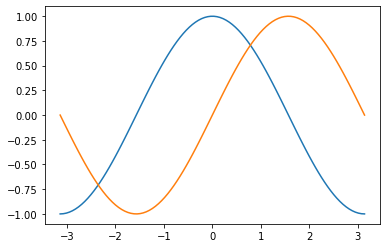

In [3]:
plt.plot(x, y1)
plt.plot(x, y2)

In [5]:
x = sy.symbols('x')


In [6]:
y1 = sy.cos(x)
y2 = sy.sin(x)

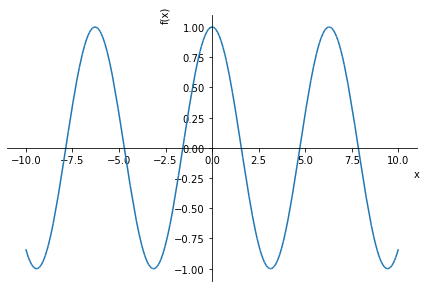

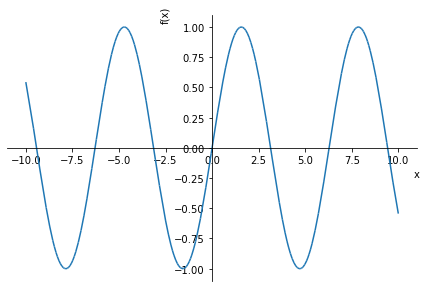

In [9]:
sy.plot(y1)
sy.plot(y2)

In [14]:
n1 = 1
n2 = 1
y1 = sy.cos(n1*x)
y2 = sy.sin(n2*x)
sy.Integral(y1*y2, (x, -sy.pi, sy.pi)).doit()

0

In [16]:
n1 = 1
n2 = 2
y1 = sy.cos(n1*x)
y2 = sy.cos(n2*x)
sy.Integral(y1*y2, (x, -sy.pi, sy.pi)).doit()

0

In [17]:
n1 = 1
n2 = 2
y1 = sy.cos(n1*x)
y2 = sy.cos(n2*x)
sy.Integral(1, (x, -sy.pi, sy.pi)).doit()

2*pi

In [18]:
n1 = 1
n2 = 2
y1 = sy.cos(n1*x)
y2 = sy.cos(n2*x)
sy.Integral(y1, (x, -sy.pi, sy.pi)).doit()

0

In [12]:
sy.Integral?

# str_match

In [71]:
def shift_and(s, t):
    code = [0] * 256
    n = len(t)
    for i in range(len(t)):
        code[ord(t[i])] |= (1<<i)
    
    p = 0
    for i in range(len(s)):
        print(f"{bin(p)=}, {bin(p << 1 | 1)=}, {bin(code[ord(s[i])])=}, {s[i]}")
        p = (p << 1 | 1) & code[ord(s[i])]
        print(bin(p))
#         print(f"{bin(1 << (n - 1))=}")
        if (p & (1 << (n - 1))):
            return i - n + 1
    
    return -1;
shift_and("hello", "el")
# shift_and("aaa", "aaa")

bin(p)='0b0', bin(p << 1 | 1)='0b1', bin(code[ord(s[i])])='0b0', h
0b0
bin(p)='0b0', bin(p << 1 | 1)='0b1', bin(code[ord(s[i])])='0b1', e
0b1
bin(p)='0b1', bin(p << 1 | 1)='0b11', bin(code[ord(s[i])])='0b10', l
0b10


1

In [48]:
shift_and("hello", "llo")

2

In [44]:
a = 'a'
ord(a)

97

# memview np

In [611]:
with open("untitled.txt", 'rb') as f:
    a = f.read()
a
len(a)
a[0]
int(a[0])

# np.frombuffer(b.tobytes(), int)

b'helloworld'

10

104

104

ValueError: invalid literal for int() with base 10: b'helloworld'

In [582]:
a = bytes(10)
len(a),a

(10, b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00')

In [583]:
a = bytes(255)
b = bytes(256)
len(a), len(b)


(255, 256)

In [567]:
a = np.arange(10).tobytes()
a
b = memoryview(a)
c = np.frombuffer(a, int)
c.dtype
c
np.frombuffer(a, int, 5)
np.frombuffer(a, int, 5, 8)

b'\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x02\x00\x00\x00\x00\x00\x00\x00\x03\x00\x00\x00\x00\x00\x00\x00\x04\x00\x00\x00\x00\x00\x00\x00\x05\x00\x00\x00\x00\x00\x00\x00\x06\x00\x00\x00\x00\x00\x00\x00\x07\x00\x00\x00\x00\x00\x00\x00\x08\x00\x00\x00\x00\x00\x00\x00\t\x00\x00\x00\x00\x00\x00\x00'

dtype('int64')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array([0, 1, 2, 3, 4])

array([1, 2, 3, 4, 5])

In [565]:
np.frombuffer?

In [560]:
a = np.random.random((3,3))
a

c = np.frombuffer(a.tobytes())
c.dtype
c
np.frombuffer(a.tobytes()[8:16])

array([[0.17225463, 0.75441432, 0.72001928],
       [0.95771179, 0.51094115, 0.24540078],
       [0.73380603, 0.4984435 , 0.74297976]])

dtype('float64')

array([0.17225463, 0.75441432, 0.72001928, 0.95771179, 0.51094115,
       0.24540078, 0.73380603, 0.4984435 , 0.74297976])

array([0.75441432])

In [556]:
a = np.random.rand()
a

0.4394652269083047

In [600]:
def test_string_cut1(size):
    string = b"x" * size
    memory_viewed = memoryview(string)
    start = time.time()
    while memory_viewed:
        memory_viewed = memory_viewed[1:]
    end = time.time()
    print(end-start)

In [601]:
def test_string_cut2(size):
    string = b"x" * size
    memory_viewed = string
    start = time.time()
    while memory_viewed:
        memory_viewed = memory_viewed[1:]
    end = time.time()
    print(end-start)

In [604]:
test_string_cut1(100000)
test_string_cut2(100000)

0.018985509872436523
0.15500140190124512


In [538]:
import weakref

In [539]:
a = 1
b =weakref.ref(a)
b

TypeError: cannot create weak reference to 'int' object

# freetest

### np

In [537]:
np.testing.assert_almost_equal(1.1*1.1, 1.21)


### cumcum

In [6]:
a = torch.randn(10,10)>0
a

tensor([[ True,  True,  True, False,  True,  True, False, False, False, False],
        [ True,  True,  True,  True, False, False,  True,  True,  True, False],
        [False,  True,  True,  True,  True,  True, False,  True,  True,  True],
        [ True,  True, False, False,  True,  True, False, False, False,  True],
        [False, False,  True,  True,  True,  True,  True, False, False, False],
        [ True, False, False, False, False, False,  True, False,  True,  True],
        [False,  True, False, False, False, False,  True,  True,  True,  True],
        [False, False,  True,  True,  True, False,  True,  True, False, False],
        [ True,  True, False, False, False, False,  True,  True, False, False],
        [ True, False,  True, False,  True, False, False, False,  True,  True]])

In [7]:
a.cumsum(0)
a.cumsum(1)

tensor([[1, 1, 1, 0, 1, 1, 0, 0, 0, 0],
        [2, 2, 2, 1, 1, 1, 1, 1, 1, 0],
        [2, 3, 3, 2, 2, 2, 1, 2, 2, 1],
        [3, 4, 3, 2, 3, 3, 1, 2, 2, 2],
        [3, 4, 4, 3, 4, 4, 2, 2, 2, 2],
        [4, 4, 4, 3, 4, 4, 3, 2, 3, 3],
        [4, 5, 4, 3, 4, 4, 4, 3, 4, 4],
        [4, 5, 5, 4, 5, 4, 5, 4, 4, 4],
        [5, 6, 5, 4, 5, 4, 6, 5, 4, 4],
        [6, 6, 6, 4, 6, 4, 6, 5, 5, 5]])

tensor([[1, 2, 3, 3, 4, 5, 5, 5, 5, 5],
        [1, 2, 3, 4, 4, 4, 5, 6, 7, 7],
        [0, 1, 2, 3, 4, 5, 5, 6, 7, 8],
        [1, 2, 2, 2, 3, 4, 4, 4, 4, 5],
        [0, 0, 1, 2, 3, 4, 5, 5, 5, 5],
        [1, 1, 1, 1, 1, 1, 2, 2, 3, 4],
        [0, 1, 1, 1, 1, 1, 2, 3, 4, 5],
        [0, 0, 1, 2, 3, 3, 4, 5, 5, 5],
        [1, 2, 2, 2, 2, 2, 3, 4, 4, 4],
        [1, 1, 2, 2, 3, 3, 3, 3, 4, 5]])

### mask

In [5]:
a = np.arange(20).reshape(2,10)
m1 = a[0]%3 == 0
m2 = a[0]%2 == 0
m1 
m2

array([ True, False, False,  True, False, False,  True, False, False,
        True])

array([ True, False,  True, False,  True, False,  True, False,  True,
       False])

In [17]:
a = np.arange(20).reshape(10,2)
a = a[:,::-1]
a

array([[ 1,  0],
       [ 3,  2],
       [ 5,  4],
       [ 7,  6],
       [ 9,  8],
       [11, 10],
       [13, 12],
       [15, 14],
       [17, 16],
       [19, 18]])

In [79]:
x = np.arange(10)
y = np.arange(10)
x
y

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

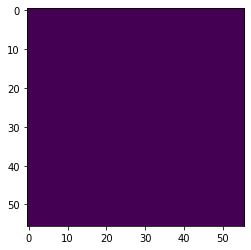

In [54]:
img = np.zeros((56,56))
edge = 7
shift = 3

plt.imshow(img)

In [56]:
img_mask = img.copy()
h_slices = (slice(0, -edge),
            slice(-edge, -shift),
            slice(-shift, None))
w_slices = (slice(0, -edge),
            slice(-edge, -shift),
            slice(-shift, None))
cnt = 0
for h in h_slices:
    for w in w_slices:
        # ic(h, w, cnt)
        img_mask[h, w] = cnt
        cnt += 1

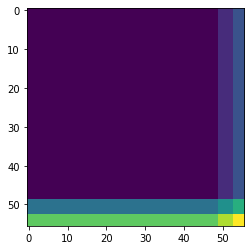

In [57]:
plt.imshow(img_mask)

(64, 49)

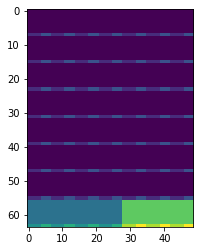

In [62]:
img_mask2 = img_mask.reshape(8,7,8,7).transpose(0,2,1,3).reshape(64,-1)
img_mask2.shape
plt.imshow(img_mask2)

(64, 1, 49)

(64, 49, 49)

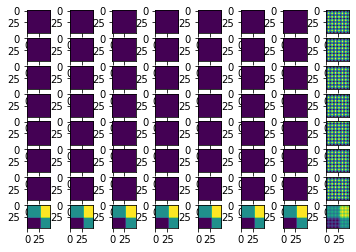

In [89]:
mask_windows = img_mask2.copy()
mask_windows[:,None].shape
attn_mask = mask_windows[:,None] - mask_windows[:,:,None]
# attn_mask = mask_windows[:,None] - mask_windows[:,:,None]
0
fig, ax = plt.subplots(8,8)
# mask_windows.shape
ax[0, 0].imshow(img_mask)
attn_mask.shape
attn_mask_ = attn_mask.reshape(8,8,49,49)
for i in range(attn_mask_.shape[0]):
    for j in range(attn_mask_.shape[1]):
        img2 = attn_mask_[i][j]
        ax[i,j].imshow(img2)

In [87]:
plt.subplots?

(64, 1, 49)

((1, 49), (49, 1))

(49, 49)

(49, 49)

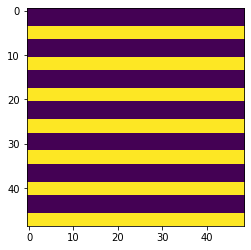

In [78]:
mask_windows = img_mask2.copy()
mask_windows[:,None].shape
m1 = mask_windows[:,None][7] 
m2 = mask_windows[:,:,None][7]
m1.shape, m2.shape
m1_ = m1.repeat(49, 0)
m1_.shape
plt.imshow(m1_)
m2_ = m2.repeat(49, 1)
m2_.shape
plt.imshow(m2_)
# m1.repeat?
# plt.imshow(m1.reshape())
# attn_mask = mask_windows[:,None] - mask_windows[:,:,None]
# for i, mask2 in enumerate(attn_mask):
#     plt.imshow(mask2)
#     if i == 7:break

### slice

In [33]:
a = slice(5, None)
a
b = torch.arange(10)
b[a] = 0
b

slice(5, None, None)

tensor([0, 1, 2, 3, 4, 0, 0, 0, 0, 0])

### LayerNorm

In [10]:
from torch.nn import LayerNorm

In [25]:
layernorm = LayerNorm(16)
layernorm.weight.shape, layernorm.bias.shape
layernorm.bias

(torch.Size([16]), torch.Size([16]))

Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True)

In [21]:
a = torch.randn(2,3,16)
b = layernorm(a)
b

tensor([[[ 1.2568,  0.2086, -0.3353, -0.0345, -0.1195,  1.5297,  0.1199,
          -0.3398,  2.4356, -0.5312, -1.5287, -0.6175, -1.4556,  0.4422,
          -0.4913, -0.5395],
         [ 1.1880, -0.0886,  0.5741, -0.2350, -0.4168, -0.5837, -1.4924,
          -1.4520,  0.6055,  0.5807,  0.6649, -0.4801, -2.0924,  1.3564,
           0.9264,  0.9451],
         [ 0.0187,  0.7534, -1.9448,  0.7725, -1.2101,  1.6867, -0.0262,
           0.2040, -1.4902,  0.6144, -0.4784,  0.1095,  0.3746, -1.3109,
           1.2350,  0.6916]],

        [[ 0.0922, -1.4961,  0.8807, -0.0366,  2.0000,  1.4402,  0.2004,
           0.8352, -1.1802, -0.9733,  0.5480, -0.6376,  0.7341, -1.1742,
          -0.1472, -1.0854],
         [-1.5040, -0.4509,  0.5085,  0.4544,  2.1811, -0.6295, -1.3210,
          -0.7148,  0.0515,  0.1401, -1.0005, -0.5197,  0.4881, -0.0365,
           0.3527,  2.0005],
         [ 0.7374, -0.8046, -1.1550,  1.3074, -0.2738,  1.8054,  0.8137,
           0.7020,  0.3749, -1.8300,  0.7658,  0.7

In [16]:
import torch.nn as nn

In [20]:
LayerNorm?

In [19]:
# NLP Example
batch, sentence_length, embedding_dim = 20, 5, 10
embedding = torch.randn(batch, sentence_length, embedding_dim)
layer_norm = nn.LayerNorm(embedding_dim)
# Activate module
layer_norm(embedding).shape
# Image Example
N, C, H, W = 20, 5, 10, 10
input = torch.randn(N, C, H, W)
# Normalize over the last three dimensions (i.e. the channel and spatial dimensions)
# as shown in the image below
layer_norm = nn.LayerNorm([C, H, W])
output = layer_norm(input).shape

torch.Size([20, 5, 10])

In [61]:
import tensorflow as  tf


### urllib

In [62]:
import urllib

In [70]:
request = urllib.request.Request("https://aistudio.baidu.com/aistudio/datasetdetail/105747")

In [71]:
response = urllib.request.urlopen(request)

In [72]:
response.read().decode('utf-8')

'<!doctype html>\n<html lang="zh-cmn-Hans-CN">\n<head>\n    <meta charset="UTF-8">\n    <title>飞桨AI Studio - 人工智能学习与实训社区</title>\n    <meta name="keywords" content="PaddlePaddle AI Studio, 人工智能, 数据科学, 数据集, 比赛, 开源算法, 免费算力">\n    <meta name="description" content="集开放数据、开源算法、免费算力三位一体，为开发者提供高效学习和开发环境、高价值高奖金竞赛项目，支撑高校老师轻松实现AI教学，并助力开发者学习交流，加速落地AI业务场景">\n    \n    <meta http-equiv="X-UA-Compatible" content="ie=edge" charset="UTF-8">\n    <link rel="icon" href="https://paddlepaddle-org-cn.cdn.bcebos.com/paddle-site-front/favicon-48.png" sizes="48x48">\n    <link rel="icon" href="https://paddlepaddle-org-cn.cdn.bcebos.com/paddle-site-front/favicon-64.png" sizes="64x64">\n    <link rel="icon" href="https://paddlepaddle-org-cn.cdn.bcebos.com/paddle-site-front/favicon-128.png" sizes="128x128">\n    <link rel="shortcut icon" href="//ai-studio-static-online.cdn.bcebos.com/aistudio/dist/1639033338994/favicon-32.ico">\n    <link rel="stylesheet" href="//ai-studio-static-online.cdn.bcebos.com/aistudio/d

<!doctype html>\n<html lang="zh-cmn-Hans-CN">\n<head>\n    <meta charset="UTF-8">\n    <title>飞桨AI Studio - 人工智能学习与实训社区</title>\n    <meta name="keywords" content="PaddlePaddle AI Studio, 人工智能, 数据科学, 数据集, 比赛, 开源算法, 免费算力">\n    <meta name="description" content="集开放数据、开源算法、免费算力三位一体，为开发者提供高效学习和开发环境、高价值高奖金竞赛项目，支撑高校老师轻松实现AI教学，并助力开发者学习交流，加速落地AI业务场景">\n    \n    <meta http-equiv="X-UA-Compatible" content="ie=edge" charset="UTF-8">\n    <link rel="icon" href="https://paddlepaddle-org-cn.cdn.bcebos.com/paddle-site-front/favicon-48.png" sizes="48x48">\n    <link rel="icon" href="https://paddlepaddle-org-cn.cdn.bcebos.com/paddle-site-front/favicon-64.png" sizes="64x64">\n    <link rel="icon" href="https://paddlepaddle-org-cn.cdn.bcebos.com/paddle-site-front/favicon-128.png" sizes="128x128">\n    <link rel="shortcut icon" href="//ai-studio-static-online.cdn.bcebos.com/aistudio/dist/1639033338994/favicon-32.ico">\n    <link rel="stylesheet" href="//ai-studio-static-online.cdn.bcebos.com/aistudio/dist/1639033338994/css/main.css">\n    <script>\n        /* eslint-disable */\n        var _hmt = _hmt || [];\n        _hmt.push([\'_setUserProperty\', {\'user_reg_date\': null}]);\n        _hmt.push(["_setUserProperty", {\'user_course_rt\': null}]);\n        // _hmt.push(["_setUserProperty", {\'user_course_total\': null}]);\n        _hmt.push(["_setUserProperty", {\'user_center_type\': null}]);\n        (function () {\n            var hm = document.createElement(\'script\');\n            hm.src = \'https://hm.baidu.com/hm.js?6b7a9d245c3be48de953790e7b6aea6b\';\n            var s = document.getElementsByTagName(\'script\')[0];\n            s.parentNode.insertBefore(hm, s);\n        })();\n        /* eslint-enable */\n    </script>\n    <script type="text/javascript"\n            charset="utf-8"\n            crossorigin="anonymous"\n            src="https://jsdk.baidu.com/jshunter/monitor"></script>\n\n    <style>\n        .paddle-logo {\n            position: absolute;\n            width: 0;\n            height: 0;\n            overflow: hidden;\n        }\n    </style>\n</head>\n<body>\n    <div class="paddle-logo"><img src="https://paddlepaddle-org-cn.cdn.bcebos.com/paddle-site-front/static/media/paddlelogo.0b483fa7.png"></div>\n    <div id="main" class="main"></div>\n    <script>\n        window.aiStudio = {\n            siteId: 0,\n            pageTitle: null,\n            userInfo: "{}",\n            logoutUrl: "\\/studio\\/logout?r=",\n            bdToken: null\n        };\n    </script>\n\n\n\n<script src="//ai-studio-static-online.cdn.bcebos.com/aistudio/dist/1639033338994/js/vendor.js" defer></script>\n<script src="//ai-studio-static-online.cdn.bcebos.com/aistudio/dist/1639033338994/js/main.js" defer></script>\n</body>\n</html>\n

<html lang="zh-cmn-Hans-CN"><head><style type="text/css">
.anticon {
  display: inline-block;
  color: inherit;
  font-style: normal;
  line-height: 0;
  text-align: center;
  text-transform: none;
  vertical-align: -0.125em;
  text-rendering: optimizeLegibility;
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
}

.anticon > * {
  line-height: 1;
}

.anticon svg {
  display: inline-block;
}

.anticon::before {
  display: none;
}

.anticon .anticon-icon {
  display: block;
}

.anticon[tabindex] {
  cursor: pointer;
}

.anticon-spin::before,
.anticon-spin {
  display: inline-block;
  -webkit-animation: loadingCircle 1s infinite linear;
  animation: loadingCircle 1s infinite linear;
}

@-webkit-keyframes loadingCircle {
  100% {
    -webkit-transform: rotate(360deg);
    transform: rotate(360deg);
  }
}

@keyframes loadingCircle {
  100% {
    -webkit-transform: rotate(360deg);
    transform: rotate(360deg);
  }
}
</style>
    <meta charset="UTF-8">
    <title>钢铁缺陷检测挑战赛-测试集数据-飞桨AI Studio - 人工智能学习实训社区</title>
    <meta name="keywords" content="PaddlePaddle AI Studio, 人工智能, 数据科学, 数据集, 比赛, 开源算法, 免费算力">
    <meta name="description" content="集开放数据、开源算法、免费算力三位一体，为开发者提供高效学习和开发环境、高价值高奖金竞赛项目，支撑高校老师轻松实现AI教学，并助力开发者学习交流，加速落地AI业务场景">
    
    <meta http-equiv="X-UA-Compatible" content="ie=edge" charset="UTF-8">
    <link rel="icon" href="https://paddlepaddle-org-cn.cdn.bcebos.com/paddle-site-front/favicon-48.png" sizes="48x48">
    <link rel="icon" href="https://paddlepaddle-org-cn.cdn.bcebos.com/paddle-site-front/favicon-64.png" sizes="64x64">
    <link rel="icon" href="https://paddlepaddle-org-cn.cdn.bcebos.com/paddle-site-front/favicon-128.png" sizes="128x128">
    <link rel="shortcut icon" href="//ai-studio-static-online.cdn.bcebos.com/aistudio/dist/1639033338994/favicon-32.ico">
    <link rel="stylesheet" href="//ai-studio-static-online.cdn.bcebos.com/aistudio/dist/1639033338994/css/main.css">
    <script src="https://ada.baidu.com/phone-tracker/getjs_bdtj?sid=13662631"></script><script charset="utf-8" src="https://ada.baidu.com/phone-tracker/insert_bdtj?sid=13662631"></script><script charset="utf-8" src="https://hmcdn.baidu.com/static/tongji/plugins/UrlChangeTracker.js"></script><script src="https://hm.baidu.com/hm.js?6b7a9d245c3be48de953790e7b6aea6b"></script><script>
        /* eslint-disable */
        var _hmt = _hmt || [];
        _hmt.push(['_setUserProperty', {'user_reg_date': 20200818}]);
        _hmt.push(["_setUserProperty", {'user_course_rt': "\u975E\u8BFE\u7A0B\u7528\u6237"}]);
        // _hmt.push(["_setUserProperty", {'user_course_total': null}]);
        _hmt.push(["_setUserProperty", {'user_center_type': "3"}]);
        (function () {
            var hm = document.createElement('script');
            hm.src = 'https://hm.baidu.com/hm.js?6b7a9d245c3be48de953790e7b6aea6b';
            var s = document.getElementsByTagName('script')[0];
            s.parentNode.insertBefore(hm, s);
        })();
        /* eslint-enable */
    </script>
    <script type="text/javascript" charset="utf-8" crossorigin="anonymous" src="https://jsdk.baidu.com/jshunter/monitor"></script>

    <style>
        .paddle-logo {
            position: absolute;
            width: 0;
            height: 0;
            overflow: hidden;
        }
    </style>
<link rel="stylesheet" type="text/css" href="//ai-studio-static-online.cdn.bcebos.com/aistudio/dist/1639033338994/css/dataSetDetail.css"><script charset="utf-8" src="//ai-studio-static-online.cdn.bcebos.com/aistudio/dist/1639033338994/js/dataSetDetail.js"></script><link rel="prefetch" as="script" href="//ai-studio-static-online.cdn.bcebos.com/aistudio/dist/1639033338994/js/Explain.js"><link rel="prefetch" as="script" href="//ai-studio-static-online.cdn.bcebos.com/aistudio/dist/1639033338994/js/ProjectHome.js"><link rel="prefetch" as="script" href="//ai-studio-static-online.cdn.bcebos.com/aistudio/dist/1639033338994/js/PublicCourseList.js"><link rel="prefetch" as="script" href="//ai-studio-static-online.cdn.bcebos.com/aistudio/dist/1639033338994/js/competitionList.js"><link rel="prefetch" as="script" href="//ai-studio-static-online.cdn.bcebos.com/aistudio/dist/1639033338994/js/courseHome.js"><link rel="prefetch" as="script" href="//ai-studio-static-online.cdn.bcebos.com/aistudio/dist/1639033338994/js/courseIntroduce.js"><link rel="prefetch" as="script" href="//ai-studio-static-online.cdn.bcebos.com/aistudio/dist/1639033338994/js/dataSetOverview.js"><link rel="prefetch" as="script" href="//ai-studio-static-online.cdn.bcebos.com/aistudio/dist/1639033338994/js/educationHome.js"><link rel="prefetch" as="script" href="//ai-studio-static-online.cdn.bcebos.com/aistudio/dist/1639033338994/js/educationHomeNew.js"><link rel="prefetch" as="script" href="//ai-studio-static-online.cdn.bcebos.com/aistudio/dist/1639033338994/js/index.js"><link rel="prefetch" as="script" href="//ai-studio-static-online.cdn.bcebos.com/aistudio/dist/1639033338994/js/teachersTrain.js"><link rel="prefetch" as="script" href="//ai-studio-static-online.cdn.bcebos.com/aistudio/dist/1639033338994/js/userCenter.js"></head>
<body>
    <div class="paddle-logo"><img src="https://paddlepaddle-org-cn.cdn.bcebos.com/paddle-site-front/static/media/paddlelogo.0b483fa7.png"></div>
    <div id="main" class="main"><header class="app-header"><div class="studio-container"><a class="studio-container-logo" href="/aistudio/"></a><a class="studio-container-item " href="/aistudio/projectoverview/public"><span class="studio-container-nav-link">项目</span></a><a aria-current="page" class="studio-container-item  studio-container-item-active" href="/aistudio/datasetoverview"><span class="studio-container-nav-link">数据集</span></a><a class="studio-container-item " href="/aistudio/course"><span class="studio-container-nav-link">课程</span></a><a class="studio-container-item " href="/aistudio/competition"><span class="studio-container-nav-link">比赛</span></a><span class="studio-container-item is-more "><span class="studio-container-nav-link">认证</span><ul class="studio-container-item-dp"><li class="studio-container-item-dp-item"><a href="/aistudio/certification">深度学习工程师认证</a></li><li class="studio-container-item-dp-item"><a href="/aistudio/identification">企业联合认证</a></li></ul></span><span class="studio-container-item is-more "><span class="studio-container-nav-link">更多</span><ul class="studio-container-item-dp"><li class="studio-container-item-dp-item"><a href="/aistudio/honorleaderboard">用户排行</a></li><li class="studio-container-item-dp-item"><a href="https://www.paddlepaddle.org.cn/ppde" target="_blank">PPDE计划</a></li><li class="studio-container-item-dp-item"><a href="/aistudio/education/new">教育合作</a></li><li class="studio-container-item-dp-item"><a href="https://ai.baidu.com/ai-doc/AISTUDIO/Tk39ty6ho" target="_blank">文档</a></li><li class="studio-container-item-dp-item"><span>积分商城</span></li></ul></span><div class="studio-logged-wrapper"><div class="studio-avatar-wrapper"><div class="studio-username-bg portrait-image-color-19">z</div><span class="studio-avatar-wrapper-unread-count">9+</span></div><div id="studio-logged-pop-wrap" class="studio-logged-pop studio-logged-hide"><a class="studio-logged-pop-item" href="/aistudio/usercenter" target="_blank">个人中心</a><span class="studio-logged-pop-item">问题反馈</span><a class="studio-logged-pop-item" href="/aistudio/messagelist" target="_blank">消息中心(64)</a><a class="studio-logged-pop-item" href="/studio/logout?r=https%3A%2F%2Fpassport.baidu.com%2F%3Flogout%26u%3Dhttp%253A%252F%252Faistudio.baidu.com%252Faistudio%252Fdatasetdetail%252F105747">退出</a></div></div><div id="i18n-main" class="i18n-main studio-container-item studio-container-item-primary studio-container-i18n"><span class="i18n-main-inner">中</span><span> | </span><span class="i18n-main-inner i18n-main-inner-unactive">En</span></div><a href="https://www.paddlepaddle.org.cn" target="_blank" class="studio-container-item studio-container-paddle">访问飞桨官网</a><a href="/paddle/forum" target="_blank" class="studio-container-item studio-container-paddle"><span class="studio-container-nav-link">论坛</span></a></div></header><div class="dataset-detail content-main"><div class="dataset-detail-header"><div class="dataset-detail-header-contain"><a class="dataset-detail-header-contain-item" href="/aistudio/datasetoverview">数据集大厅</a><a class="dataset-detail-header-contain-item" href="/aistudio/datasetoverview/2">公共数据集</a><div class="dataset-detail-header-contain-item">钢铁缺陷检测挑战赛-测试集数据</div></div></div><div class="dataset-detail-info"><div class="dataset-detail-info-basic"><div class="basic-info"><div class="basic-info-title"><div class="basic-info-title-text">钢铁缺陷检测挑战赛-测试集数据<i class="ai-icon basic-info-type-icon"><svg width="1em" height="1em" viewBox="0 0 32 32" fill="currentColor"><path d="M20.725 3.5c4.407 0 7.975 3.616 7.975 8.073v2.12h-1.994v-2.12c0-3.355-2.68-6.07-5.98-6.07-3.302 0-5.982 2.715-5.982 6.07v1.911h9.69V28.5H3.5V13.485l9.25-.001v-1.911c0-4.457 3.569-8.073 7.975-8.073zm1.715 11.987H5.494v11.01H22.44v-11.01z"></path></svg></i></div><div class="basic-info-title-operate"><div class="basic-info-title-operate-collect"><div class="star-operate can-click"><svg width="1em" height="1em" viewBox="0 0 32 32" class="basic-info-title-operate-icon basic-info-title-operate-icon-stroke"><path d="M4.4 6.54c-1.761 1.643-2.6 3.793-2.36 6.056.24 2.263 1.507 4.521 3.663 6.534a29110.9 29110.9 0 0010.296 9.633l10.297-9.633c2.157-2.013 3.424-4.273 3.664-6.536.24-2.264-.599-4.412-2.36-6.056-1.73-1.613-3.84-2.29-6.097-1.955-1.689.25-3.454 1.078-5.105 2.394l-.4.319-.398-.319c-1.649-1.316-3.414-2.143-5.105-2.394a7.612 7.612 0 00-1.113-.081c-1.838 0-3.541.694-4.983 2.038z"></path></svg><span class="basic-info-title-operate-word">喜爱</span></div><div class="can-click can-click-number"><span>11</span></div></div></div></div><div class="basic-info-abs">钢铁缺陷检测挑战赛-测试集数据</div><div class="basic-info-content"><div class="basic-info-content-datasetInfo"><div class="basic-info-content-datasetInfo-item basic-info-content-datasetInfo-author" style="display: flex;"><div class="letterhead portrait-image-color-3 ">比</div><span class="basic-info-content-datasetInfo-author-nickname">比赛官方账号</span></div><div class="basic-info-content-datasetInfo-item basic-info-content-datasetInfo-tags item-align-c"><i class="basic-info-content-datasetInfo-icon tag"></i><span class="basic-info-content-datasetInfo-tags-tag">钢铁缺陷检测挑战赛-测试集数据</span></div><div class="basic-info-content-datasetInfo-item item-align-c"><svg width="1em" height="1em" viewBox="0 0 32 32" class="basic-info-content-datasetInfo-icon"><path d="M13.892 25.862l4.83-4.83.127-.126c.034-.034.063-.068.092-.105a5.301 5.301 0 00-.755-7.732l-1.217 1.571c.107.085.175.131.347.304a3.31 3.31 0 01.025 4.655l-4.816 4.816-.002-.003c-.027.03-.056.059-.085.088a3.313 3.313 0 01-4.683 0 3.313 3.313 0 01.112-4.787l-.002-.002 2.331-2.331-1.406-1.407-2.392 2.392-.017.017-.03.03a5.3 5.3 0 007.495 7.494l.03-.032a.074.074 0 00.016-.012z"></path><path d="M15.359 17.727c-.097-.08-.274-.221-.442-.386a3.313 3.313 0 01.112-4.787l-.003-.002 4.814-4.814a3.31 3.31 0 014.66 4.7l-2.414 2.416 1.406 1.406 2.392-2.392.126-.126c.034-.034.063-.068.093-.105a5.301 5.301 0 00-7.587-7.39l-4.959 4.96-.017.016-.03.03a5.3 5.3 0 00.513 7.945l1.336-1.471zm-6.877-.953a.993.993 0 101.98-.155.993.993 0 00-1.98.155z"></path><path d="M16.605 13.943a.993.993 0 101.98-.156.993.993 0 00-1.98.156zm-2.926 4.577a.993.993 0 101.98-.155.993.993 0 00-1.98.156zm8.121-2.884a.993.993 0 101.98-.156.993.993 0 00-1.98.156z"></path></svg><span>371</span></div><div class="basic-info-content-datasetInfo-item item-align-c"><i class="ai-icon basic-info-content-datasetInfo-icon"><svg width="1em" height="1em" viewBox="0 0 32 32" fill="currentColor"><path d="M2.073 16.343a.845.845 0 010-.686C4.52 10.133 9.932 6.5 16 6.5s11.479 3.633 13.927 9.157a.845.845 0 010 .686C27.48 21.867 22.068 25.5 16 25.5S4.521 21.867 2.073 16.343zM16 23.773c5.22 0 9.902-3.062 12.143-7.773C25.902 11.289 21.22 8.227 16 8.227c-5.22 0-9.902 3.062-12.143 7.773C6.098 20.711 10.78 23.773 16 23.773zm0-2.45c-3.043 0-5.51-2.393-5.51-5.344 0-2.951 2.467-5.344 5.51-5.344 3.043 0 5.51 2.393 5.51 5.344 0 2.951-2.467 5.344-5.51 5.344zm0-1.781c2.028 0 3.673-1.595 3.673-3.563 0-1.967-1.645-3.562-3.673-3.562s-3.673 1.595-3.673 3.562c0 1.968 1.645 3.563 3.673 3.563z"></path></svg></i><span>511</span></div><div class="basic-info-content-datasetInfo-item basic-info-content-datasetInfo-time item-align-c"><i class="basic-info-content-datasetInfo-icon time"></i><span>2021-08-26</span></div></div></div></div></div><div class="dataset-detail-info-tab"><div class="tab-pane"><div class="ant-tabs ant-tabs-top"><div role="tablist" class="ant-tabs-nav"><div class="ant-tabs-nav-wrap"><div class="ant-tabs-nav-list" style="transform: translate(0px, 0px);"><div class="ant-tabs-tab ant-tabs-tab-active"><div role="tab" aria-selected="true" class="ant-tabs-tab-btn" tabindex="0" id="rc-tabs-0-tab-0" aria-controls="rc-tabs-0-panel-0">详情</div></div><div class="ant-tabs-tab"><div role="tab" aria-selected="false" class="ant-tabs-tab-btn" tabindex="0" id="rc-tabs-0-tab-1" aria-controls="rc-tabs-0-panel-1">相关项目</div></div><div class="ant-tabs-tab"><div role="tab" aria-selected="false" class="ant-tabs-tab-btn" tabindex="0" id="rc-tabs-0-tab-2" aria-controls="rc-tabs-0-panel-2">评论(0)</div></div><div class="ant-tabs-ink-bar ant-tabs-ink-bar-animated" style="left: 0px; width: 60px;"></div></div></div><div class="ant-tabs-nav-operations ant-tabs-nav-operations-hidden"><button type="button" class="ant-tabs-nav-more" tabindex="-1" aria-hidden="true" aria-haspopup="listbox" aria-controls="rc-tabs-0-more-popup" id="rc-tabs-0-more" aria-expanded="false" style="visibility: hidden; order: 1;"><span role="img" aria-label="ellipsis" class="anticon anticon-ellipsis"><svg viewBox="64 64 896 896" focusable="false" data-icon="ellipsis" width="1em" height="1em" fill="currentColor" aria-hidden="true"><path d="M176 511a56 56 0 10112 0 56 56 0 10-112 0zm280 0a56 56 0 10112 0 56 56 0 10-112 0zm280 0a56 56 0 10112 0 56 56 0 10-112 0z"></path></svg></span></button></div><div class="ant-tabs-extra-content"><div class="tab-pane-extra"><button type="button" class="ant-btn ant-btn-primary"><span>创建项目</span></button></div></div></div><div class="ant-tabs-content-holder"><div class="ant-tabs-content ant-tabs-content-top"><div role="tabpanel" tabindex="0" aria-hidden="false" class="ant-tabs-tabpane ant-tabs-tabpane-active" id="rc-tabs-0-panel-0" aria-labelledby="rc-tabs-0-tab-0" style=""><div class="dataset-detail-content"></div><div class="dataset-file"><div class="dataset-file-info"><div class="title">文件列表</div><div class="dataset-file-info-tabs-wrap"><div class="dataset-file-info-tabs"><div title="test.zip" class="dataset-file-info-tabs-list dataset-file-info-tabs-list-active">test.zip</div></div><div class="dataset-file-info-content dataset-file-info-content-active"><div class="dataset-file-info-content-name"><div class="content-name"><div class="name-text">test.zip</div><div class="name-size">(5.78M)</div></div><div class="content-download"><a class="name-download">下载</a></div></div><div class="dataset-file-info-content-abs"></div><div class="dataset-detail-preview"><div class="dataset-detail-preview-table-wrap"><div class="dataset-detail-preview-table"><div class="dataset-detail-preview-table-header"><div class="dataset-detail-preview-table-cell">File Name</div><div class="dataset-detail-preview-table-cell">Size</div><div class="dataset-detail-preview-table-cell">Update Time</div></div><div class="dataset-detail-preview-table-body"><div class="dataset-detail-preview-table-row"><div class="dataset-detail-preview-table-cell">test/.DS_Store</div><div class="dataset-detail-preview-table-cell">-1</div><div class="dataset-detail-preview-table-cell">2021-08-26 13:16:56</div></div><div class="dataset-detail-preview-table-row"><div class="dataset-detail-preview-table-cell">__MACOSX/test/._.DS_Store</div><div class="dataset-detail-preview-table-cell">-1</div><div class="dataset-detail-preview-table-cell">2021-08-26 13:16:56</div></div><div class="dataset-detail-preview-table-row"><div class="dataset-detail-preview-table-cell">test/IMAGES/1409.jpg</div><div class="dataset-detail-preview-table-cell">-1</div><div class="dataset-detail-preview-table-cell">2021-07-12 17:05:08</div></div><div class="dataset-detail-preview-table-row"><div class="dataset-detail-preview-table-cell">__MACOSX/test/IMAGES/._1409.jpg</div><div class="dataset-detail-preview-table-cell">-1</div><div class="dataset-detail-preview-table-cell">2021-07-12 17:05:08</div></div><div class="dataset-detail-preview-table-row"><div class="dataset-detail-preview-table-cell">test/IMAGES/1435.jpg</div><div class="dataset-detail-preview-table-cell">-1</div><div class="dataset-detail-preview-table-cell">2021-07-12 17:05:08</div></div><div class="dataset-detail-preview-table-row"><div class="dataset-detail-preview-table-cell">__MACOSX/test/IMAGES/._1435.jpg</div><div class="dataset-detail-preview-table-cell">-1</div><div class="dataset-detail-preview-table-cell">2021-07-12 17:05:08</div></div><div class="dataset-detail-preview-table-row"><div class="dataset-detail-preview-table-cell">test/IMAGES/1421.jpg</div><div class="dataset-detail-preview-table-cell">-1</div><div class="dataset-detail-preview-table-cell">2021-07-12 17:05:08</div></div><div class="dataset-detail-preview-table-row"><div class="dataset-detail-preview-table-cell">__MACOSX/test/IMAGES/._1421.jpg</div><div class="dataset-detail-preview-table-cell">-1</div><div class="dataset-detail-preview-table-cell">2021-07-12 17:05:08</div></div><div class="dataset-detail-preview-table-row"><div class="dataset-detail-preview-table-cell">test/IMAGES/1637.jpg</div><div class="dataset-detail-preview-table-cell">-1</div><div class="dataset-detail-preview-table-cell">2021-07-12 17:05:08</div></div><div class="dataset-detail-preview-table-row"><div class="dataset-detail-preview-table-cell">__MACOSX/test/IMAGES/._1637.jpg</div><div class="dataset-detail-preview-table-cell">-1</div><div class="dataset-detail-preview-table-cell">2021-07-12 17:05:08</div></div><div class="dataset-detail-preview-table-row"><div class="dataset-detail-preview-table-cell">test/IMAGES/1623.jpg</div><div class="dataset-detail-preview-table-cell">-1</div><div class="dataset-detail-preview-table-cell">2021-07-12 17:05:08</div></div><div class="dataset-detail-preview-table-row"><div class="dataset-detail-preview-table-cell">__MACOSX/test/IMAGES/._1623.jpg</div><div class="dataset-detail-preview-table-cell">-1</div><div class="dataset-detail-preview-table-cell">2021-07-12 17:05:08</div></div><div class="dataset-detail-preview-table-row"><div class="dataset-detail-preview-table-cell">test/IMAGES/1743.jpg</div><div class="dataset-detail-preview-table-cell">-1</div><div class="dataset-detail-preview-table-cell">2021-07-12 17:05:08</div></div><div class="dataset-detail-preview-table-row"><div class="dataset-detail-preview-table-cell">__MACOSX/test/IMAGES/._1743.jpg</div><div class="dataset-detail-preview-table-cell">-1</div><div class="dataset-detail-preview-table-cell">2021-07-12 17:05:08</div></div><div class="dataset-detail-preview-table-row"><div class="dataset-detail-preview-table-cell">test/IMAGES/1757.jpg</div><div class="dataset-detail-preview-table-cell">-1</div><div class="dataset-detail-preview-table-cell">2021-07-12 17:05:08</div></div><div class="dataset-detail-preview-table-row"><div class="dataset-detail-preview-table-cell">__MACOSX/test/IMAGES/._1757.jpg</div><div class="dataset-detail-preview-table-cell">-1</div><div class="dataset-detail-preview-table-cell">2021-07-12 17:05:08</div></div><div class="dataset-detail-preview-table-row"><div class="dataset-detail-preview-table-cell">test/IMAGES/1780.jpg</div><div class="dataset-detail-preview-table-cell">-1</div><div class="dataset-detail-preview-table-cell">2021-07-12 17:05:08</div></div><div class="dataset-detail-preview-table-row"><div class="dataset-detail-preview-table-cell">__MACOSX/test/IMAGES/._1780.jpg</div><div class="dataset-detail-preview-table-cell">-1</div><div class="dataset-detail-preview-table-cell">2021-07-12 17:05:08</div></div><div class="dataset-detail-preview-table-row"><div class="dataset-detail-preview-table-cell">test/IMAGES/1794.jpg</div><div class="dataset-detail-preview-table-cell">-1</div><div class="dataset-detail-preview-table-cell">2021-07-12 17:05:08</div></div><div class="dataset-detail-preview-table-row"><div class="dataset-detail-preview-table-cell">__MACOSX/test/IMAGES/._1794.jpg</div><div class="dataset-detail-preview-table-cell">-1</div><div class="dataset-detail-preview-table-cell">2021-07-12 17:05:08</div></div></div></div></div><div class="dataset-detail-preview-table-footer"><a class="ai-studio-link">下载查看更多</a></div></div></div></div></div></div></div><div role="tabpanel" tabindex="-1" aria-hidden="true" class="ant-tabs-tabpane" id="rc-tabs-0-panel-1" aria-labelledby="rc-tabs-0-tab-1" style="display: none;"></div><div role="tabpanel" tabindex="-1" aria-hidden="true" class="ant-tabs-tabpane" id="rc-tabs-0-panel-2" aria-labelledby="rc-tabs-0-tab-2" style="display: none;"></div></div></div></div></div></div></div></div><div class="a-s-floating-toolbar"><div class="aistudio-feedback"><div class="aistudio-feedback-i"><svg width="1em" height="1em" viewBox="0 0 32 32"><path d="M26.364 4l.175.007A2.141 2.141 0 0128.5 6.145v14.412a2.14 2.14 0 01-2.136 2.145H15.337l-4.98 4.928a1.278 1.278 0 01-1.813-.014 1.29 1.29 0 01-.369-.903v-4.01H5.887a2.14 2.14 0 01-2.136-2.108l-.25-14.413A2.144 2.144 0 015.614 4h20.749zm0 1.838H5.631a.306.306 0 00-.3.312l.25 14.413a.306.306 0 00.306.3H8.48a1.53 1.53 0 011.526 1.533v3l4.135-4.091c.286-.283.67-.441 1.071-.441h11.152a.306.306 0 00.305-.307V6.145a.306.306 0 00-.305-.307zm-4.882 9.07c.505 0 .915.41.915.918s-.41.92-.915.92H10.497a.917.917 0 01-.916-.92c0-.507.41-.919.916-.919zm0-4.903c.505 0 .915.412.915.92 0 .507-.41.918-.915.918H10.497a.917.917 0 01-.916-.919c0-.507.41-.919.916-.919z" fill="currentColor"></path></svg></div><div class="aistudio-feedback-t">问题反馈</div></div></div><div class="ai-footer-cover"><div class="ai-footer-cover-inner"><div class="ai-footer-cover-column"><div class="ai-footer-cover-about"><div class="ai-footer-cover-column-title">关于AI Studio</div><div class="ai-footer-cover-column-cnt normal">AI Studio是基于百度深度学习平台飞桨的人工智能学习与实训社区，提供在线编程环境、免费GPU算力、海量开源算法和开放数据，帮助开发者快速创建和部署模型。</div></div><a class="ai-footer-cover-more" href="http://www.paddlepaddle.org.cn" target="_blank"><span class="ai-footer-cover-more-item">了解:&nbsp;&nbsp;</span><img src="//ai-studio-static-online.cdn.bcebos.com/aistudio/dist/1639033338994/images/paddle_zh_CN.png" alt="" class="ai-footer-cover-more-item paddle-icon"></a></div><div class="ai-footer-cover-column"><div class="ai-footer-cover-column-title extra">相关资源</div><a href="https://ai.baidu.com/docs#/AIStudio_Tutorial/top" target="_blank" class="ai-footer-cover-column-cnt">用户指南</a><a href="https://ai.baidu.com/docs#/AIStudioEdu_QA/top" target="_blank" class="ai-footer-cover-column-cnt">常见问题</a></div><div class="ai-footer-cover-column"><div class="ai-footer-cover-column-title extra">教育专区</div><a href="https://aistudio.baidu.com/aistudio/education" target="_blank" class="ai-footer-cover-column-cnt">教育版介绍</a><a href="https://ai.baidu.com/docs#/AIStudioEdu_Teacher_Workflow/top" target="_blank" class="ai-footer-cover-column-cnt">教育版使用文档</a><a class="ai-footer-cover-column-cnt">教师开课申请</a></div><div class="ai-footer-cover-column"><div class="ai-footer-cover-column-title extra">联系我们</div><span class="ai-footer-cover-column-cnt">邮箱: <a href="mailto:aistudio@baidu.com" class="ai-footer-cover-link">aistudio@baidu.com</a></span><span class="ai-footer-cover-column-cnt">官方QQ:  580959619</span></div><div class="ai-footer-cover-column qrcode"><img src="//ai-studio-static-online.cdn.bcebos.com/aistudio/dist/1639033338994/images/paddleQrCode.jpg" alt="" class="ai-footer-cover-paddle-qrcode"><div class="ai-footer-cover-column-cnt qrcode">飞桨微信服务号</div></div></div></div><div class="ai-footer-baseline-contain"><div class="ai-footer-baseline"><div class="ai-first-baseline">友情链接：</div><a href="http://paddlepaddle.org/" target="_blank"><div class="ai-baseline-info">飞桨官网</div></a><div class="ai-baseline-info-divider">|</div><a href="https://github.com/PaddlePaddle/Paddle" target="_blank"><div class="ai-baseline-info">飞桨源码</div></a><div class="ai-baseline-info-divider">|</div><a href="https://developer.baidu.com/?from=aistudio" target="_blank"><div class="ai-baseline-info">百度开发者中心</div></a><div class="ai-baseline-info-divider">|</div><a href="http://abcxueyuan.cloud.baidu.com?hmsr=aistudio%E5%8F%8B%E9%93%BE&amp;hmpl=&amp;hmcu=&amp;hmkw=&amp;hmci=" target="_blank"><div class="ai-baseline-info">百度云智学院</div></a><div class="ai-baseline-info-divider">|</div><a href="https://bit.baidu.com" target="_blank"><div class="ai-baseline-info">百度技术学院</div></a><div class="ai-baseline-info-divider">|</div><a href="https://cloud.baidu.com/product/xly.html" target="_blank"><div class="ai-baseline-info">百度效率云</div></a><div class="ai-baseline-info-divider">|</div><a href="https://dianshi.bce.baidu.com" target="_blank"><div class="ai-baseline-info">百度点石</div></a><div class="ai-baseline-info-divider">|</div><a href="https://ai.baidu.com/ai-doc/AISTUDIO/3k39vrahw" target="_blank"><div class="ai-baseline-info">用户协议</div></a><div class="ai-baseline-info-divider">|</div><a href="https://www.baidu.com/duty" target="_blank"><div class="ai-baseline-info ai-info-read">© 使用百度前必读</div></a></div></div></div>
    <script>
        window.aiStudio = {
            siteId: 0,
            pageTitle: null,
            userInfo: {"id":394599,"userName":"zidanewenqsh","nickname":"zidanewenqsh","userType":1,"statusCode":1,"isEmployee":0,"portrait":"","userIp":"","createTime":"2020-08-18T20:40:13.000+08:00","forumAuto":null,"capacity":3,"workPlace":"","position":"","region":"","userAbs":"","companyName":"","mobile":"","trueName":"","email":"","memberType":0,"memberYear":"","memberMajor":"","displayName":"","memberId":0,"memberCertificate":"","publicCourse":null,"hasEduGroup":true,"commentManager":false,"userRoleList":[2],"centerUserType":[3],"auth":0,"sshVipUser":null},
            logoutUrl: "\/studio\/logout?r=https%3A%2F%2Fpassport.baidu.com%2F%3Flogout%26u%3Dhttp%253A%252F%252Faistudio.baidu.com%252Faistudio%252Fdatasetdetail%252F105747",
            bdToken: "73A81F4B053E68881ACD27F66B168A54F05D5BABA80AB881393C7BB2E73DACFCFF22C8D68CE066DFF1D3308DC45D8F06"
        };
    </script>



<script src="//ai-studio-static-online.cdn.bcebos.com/aistudio/dist/1639033338994/js/vendor.js" defer=""></script>
<script src="//ai-studio-static-online.cdn.bcebos.com/aistudio/dist/1639033338994/js/main.js" defer=""></script>


</body></html>

In [7]:
a = torch.Tensor([[1,2,3]])
b = a.expand(3,-1)
a
b
a[0,1] = 5
a
b

tensor([[1., 2., 3.]])

tensor([[1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.]])

tensor([[1., 5., 3.]])

tensor([[1., 5., 3.],
        [1., 5., 3.],
        [1., 5., 3.]])

In [7]:
a = [4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 14, 21, 28, 35, 42, 49, 56, 63, 22, 33, 44, 55, 26, 39, 52, 65, 34, 51, 38, 57, 46, 58, 62, ]
len(a) 
b = set(a)
len(b)


86

46

In [8]:
224/16

14.0

In [2]:
torch.onnx.export?

In [3]:
"*" * 0

''

In [18]:
p0 = "X:/AI-046/Temp"

p1 = "X:/AI-046/Temp/Temp"
# p1 = "X:/AI-046/Temp/tEmp"
p1_ = Path(p1)

In [19]:
os.listdir(p0)
os.path.exists(p1)
p1_.exists()
p1_.resolve()
p1 == os.path.abspath(p1).replace("\\", "/")
os.path.abspath(p1).replace("\\", "/")
p1

['1', 'AI-046', 'Projects', 'tEmp', 'temp2', 'wood_pt', 'yolov5_woods_03']

True

True

WindowsPath('//192.168.1.2/deeplearning/AI-046/Temp/tEmp')

True

'X:/AI-046/Temp/Temp'

'X:/AI-046/Temp/Temp'

### pytorch_geometric

In [3]:
from torch.nn import Linear, ReLU
from torch_geometric.nn import Sequential, GCNConv
in_channels = 3
out_channels = 1
model = Sequential('x, edge_index', [
    (GCNConv(in_channels, 64), 'x, edge_index -> x'),
    ReLU(inplace=True),
    (GCNConv(64, 64), 'x, edge_index -> x'),
    ReLU(inplace=True),
    Linear(64, out_channels),
])

In [ ]:
a 

### plot

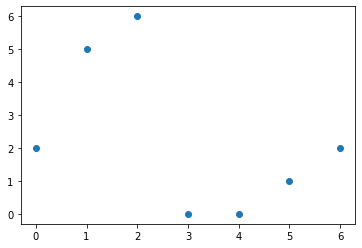

In [5]:
a = [2,5,6,0,0,1,2]
plt.scatter(np.arange(len(a)),a)

### path

In [6]:
np.random.randint(1,4)

1

In [2]:
p1 = "X:/AI-046/Temp/"
p2 = os.path.join(p1, "D:/temp")
print(p2)
print(os.path.abspath(p2))

D:/temp
D:\temp


In [5]:
p1 = "/d/AI-046/Temp/"
# p2 = os.path.join(p1, "D:/temp")
print(p1)
print(os.path.abspath(p1))

/d/AI-046/Temp/
X:\d\AI-046\Temp


In [19]:
p1 = Path("X:/AI-046/Temp/")
p2 = p1 / "./temp"
p3 = p1 / p2
print(p2)
print(os.path.abspath(p2))
p1
p2
p3
p3.resolve()
p3.absolute()

X:\AI-046\Temp\temp
X:\AI-046\Temp\temp


WindowsPath('X:/AI-046/Temp')

WindowsPath('X:/AI-046/Temp/temp')

WindowsPath('X:/AI-046/Temp/temp')

WindowsPath('//192.168.1.2/deeplearning/AI-046/Temp/temp')

WindowsPath('X:/AI-046/Temp/temp')

In [17]:
p1 = Path("X:/AI-046/Temp/")
p2 = p1 / "D:/temp"
p3 = p1 / p2
print(p2)
print(os.path.abspath(p2))
p1
p2
p3
p3.resolve()

D:\temp
D:\temp


WindowsPath('X:/AI-046/Temp')

WindowsPath('D:/temp')

WindowsPath('D:/temp')

WindowsPath('D:/Temp')

In [23]:
p1 = Path("X:/AI-046/Temp/")
p2 = p1 / "./test"
p2.absolute()

WindowsPath('X:/AI-046/Temp/test')

In [12]:
os.getcwd()

'X:\\AI-046\\BaiduNetdiskWorkspace\\Notebook'

### read

In [4]:
p = r"D:\Temp\Temp\新建文本文档.txt"

In [13]:
s = 100
ns = 0
cs = []
with open(p, 'rb') as f:
    while (c:=f.read(s)):
#         ic(len(c))
        cs.append(c)
        
ic(len(cs))
ic(cs)

ic| len(cs): 15


15

ic| cs: [b'#!/e/Soft/anaconda3/python2\r
        # -*- coding: utf-8 -*- #\r
        # --------------'
         b'----------------------------',
         b'------------------------\r
        # @File Name:        ${NAME}.py\r
        # @Author:   '
         b'        wen\r
        # @Version:    ',
         b'      ver0_1\r
        # @Created:          ${DATE} ${TIME}\r
        # @Description:     '
         b' Main Function:    xxx\r
        # @N',
         b'ote:             xxx\r
        # Function List:     hello() -- print helloworld\r
        '
         b'# History:\r
        #       <author>',
         b'    <version>   <time>      <desc>\r
        #       wen         ver0_1      2020'
         b'/12/15  xxx\r
        # -------------',
         b'-----------------------------------------------------\r
        import os\r
        import'
         b' sys\r
        import numpy as np\r
        im',
         b'port torch\r
        import logging\r
        import argparse\r
        im

[b'#!/e/Soft/anaconda3/python2\r\n# -*- coding: utf-8 -*- #\r\n# ------------------------------------------',
 b'------------------------\r\n# @File Name:        ${NAME}.py\r\n# @Author:           wen\r\n# @Version:    ',
 b'      ver0_1\r\n# @Created:          ${DATE} ${TIME}\r\n# @Description:      Main Function:    xxx\r\n# @N',
 b'ote:             xxx\r\n# Function List:     hello() -- print helloworld\r\n# History:\r\n#       <author>',
 b'    <version>   <time>      <desc>\r\n#       wen         ver0_1      2020/12/15  xxx\r\n# -------------',
 b'-----------------------------------------------------\r\nimport os\r\nimport sys\r\nimport numpy as np\r\nim',
 b'port torch\r\nimport logging\r\nimport argparse\r\nimport shutil\r\nimport cv2\r\nimport time\r\nimport threadin',
 b'g\r\nimport multiprocessing\r\nfrom pathlib import Path\r\nfrom tqdm import tqdm\r\nfrom matplotlib import p',
 b"yplot as plt\r\nfrom icecream import ic\r\n\r\nif __name__ == '__main__':\r\n    logging.basicC

### MCTS

In [67]:
num = 1000000
x = np.random.uniform(-1,1,(num,))
y = np.random.uniform(-1,1,(num,))
z = (x**2 + y**2)**0.5
z.max()
(z<=1).mean()*4

1.4128077808621482

3.141368

### zip

In [5]:
a = [1, 2, 3]
b = [4, 5, 6]
c = [7, 8, 9]
d = zip(a,b,c)
print(list(d))

[(1, 4, 7), (2, 5, 8), (3, 6, 9)]


### repeat

In [7]:
from itertools import repeat

In [9]:
a = 'a'
b = repeat(a)
str(b)

"repeat('a')"

In [13]:
a=1
list(repeat(a,10))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [7]:
a=[1,2,3]
list(repeat(a,10))

[[1, 2, 3],
 [1, 2, 3],
 [1, 2, 3],
 [1, 2, 3],
 [1, 2, 3],
 [1, 2, 3],
 [1, 2, 3],
 [1, 2, 3],
 [1, 2, 3],
 [1, 2, 3]]

### set

In [16]:
a = set([1,2,3,4])
b = set([3,4,5])
a
b
a & b

{1, 2, 3, 4}

{3, 4, 5}

{3, 4}

In [3]:
a = set([1,2,3,4])
b = set([3,4,5])
a.update(b)
a

{1, 2, 3, 4, 5}

In [6]:
a = set([1,2,3,4])
b = set([3,4,5])
a.difference(b)
a.symmetric_difference(b)

{1, 2}

{1, 2, 5}

### numpy shuffle

In [22]:
a = np.arange(20)
a
np.random.shuffle(a)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

array([ 4, 12,  3, 18,  5,  6,  1, 15,  9,  8, 11,  7,  2, 16, 19, 10,  0,
       14, 13, 17])

In [26]:
np.log2(65536)

16.0

In [10]:
os.cpu_count()

64

In [23]:
a = Path("/home/ai-046/Temp/")
a.replace?

In [24]:
os.path.expanduser('~/Temp')

'/home/ai-046/Temp'

In [30]:
a = b'12'
b = b'34'
a
b
type(a)
a+b

b'12'

b'34'

bytes

b'1234'

In [4]:
a = [torch.Tensor([1,2]), torch.Tensor([3,4])]
sum(a)

tensor([4., 6.])

In [13]:
a= torch.arange(10)
b = a[a%3]
b
b1 = a % 3 > 0
b2 = a%2 >0
b1 
b2
c1 = b1 & b2
c2 = b1 | b2
c1
c2
c1.sum()/c2.sum()

tensor([0, 1, 2, 0, 1, 2, 0, 1, 2, 0])

tensor([False,  True,  True, False,  True,  True, False,  True,  True, False])

tensor([False,  True, False,  True, False,  True, False,  True, False,  True])

tensor([False,  True, False, False, False,  True, False,  True, False, False])

tensor([False,  True,  True,  True,  True,  True, False,  True,  True,  True])

tensor(0.3750)

### repeat & tile

In [26]:
a = np.arange(4).reshape(2,2)
a
a.repeat(2,0)
a.repeat(2,1)
# a.repeat(2,2)

array([[0, 1],
       [2, 3]])

array([[0, 1],
       [0, 1],
       [2, 3],
       [2, 3]])

array([[0, 0, 1, 1],
       [2, 2, 3, 3]])

In [35]:
a = np.arange(4).reshape(2, 2)
# np.tile?
a
np.tile(a, 2)
np.tile(a, (2, 2))

array([[0, 1],
       [2, 3]])

array([[0, 1, 0, 1],
       [2, 3, 2, 3]])

array([[0, 1, 0, 1],
       [2, 3, 2, 3],
       [0, 1, 0, 1],
       [2, 3, 2, 3]])

In [45]:
a = torch.arange(4).reshape(2, 2)
# torch.tile?
a
# torch.tile(a, 2)
torch.tile(a, (2,2))
# torch.tile(a, (2, 2))
a.tile(3,2)

tensor([[0, 1],
        [2, 3]])

tensor([[0, 1, 0, 1],
        [2, 3, 2, 3],
        [0, 1, 0, 1],
        [2, 3, 2, 3]])

tensor([[0, 1, 0, 1],
        [2, 3, 2, 3],
        [0, 1, 0, 1],
        [2, 3, 2, 3],
        [0, 1, 0, 1],
        [2, 3, 2, 3]])

In [43]:
a = torch.arange(4).reshape(2,2)
# a.repeat?
a
a.repeat(2,2)
# torch.repeat(a, (3,1)) # module 'torch' has no attribute 'repeat'

tensor([[0, 1],
        [2, 3]])

tensor([[0, 1, 0, 1],
        [2, 3, 2, 3],
        [0, 1, 0, 1],
        [2, 3, 2, 3]])

AttributeError: module 'torch' has no attribute 'repeat'

In [36]:
torch.tile?

### narrow

In [20]:
a = torch.arange(64).reshape(4,4,4)
a
a.narrow(0,1,2)
a.narrow(1,1,1)
a.narrow(2,1,1)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11],
         [12, 13, 14, 15]],

        [[16, 17, 18, 19],
         [20, 21, 22, 23],
         [24, 25, 26, 27],
         [28, 29, 30, 31]],

        [[32, 33, 34, 35],
         [36, 37, 38, 39],
         [40, 41, 42, 43],
         [44, 45, 46, 47]],

        [[48, 49, 50, 51],
         [52, 53, 54, 55],
         [56, 57, 58, 59],
         [60, 61, 62, 63]]])

tensor([[[16, 17, 18, 19],
         [20, 21, 22, 23],
         [24, 25, 26, 27],
         [28, 29, 30, 31]],

        [[32, 33, 34, 35],
         [36, 37, 38, 39],
         [40, 41, 42, 43],
         [44, 45, 46, 47]]])

tensor([[[ 4,  5,  6,  7]],

        [[20, 21, 22, 23]],

        [[36, 37, 38, 39]],

        [[52, 53, 54, 55]]])

tensor([[[ 1],
         [ 5],
         [ 9],
         [13]],

        [[17],
         [21],
         [25],
         [29]],

        [[33],
         [37],
         [41],
         [45]],

        [[49],
         [53],
         [57],
         [61]]])

### unbind

In [16]:
a = torch.arange(8).reshape(2,2,2)
a
a.unbind(0)
a.unbind(1)
a.unbind(2)

tensor([[[0, 1],
         [2, 3]],

        [[4, 5],
         [6, 7]]])

(tensor([[0, 1],
         [2, 3]]),
 tensor([[4, 5],
         [6, 7]]))

(tensor([[0, 1],
         [4, 5]]),
 tensor([[2, 3],
         [6, 7]]))

(tensor([[0, 2],
         [4, 6]]),
 tensor([[1, 3],
         [5, 7]]))

In [48]:
a = torch.randn(3, 5)
a
cls, cx, cy, w, h = a.unbind(1)
cls

tensor([[-0.3234, -2.2454, -0.3906,  0.3820, -0.0222],
        [-0.0478, -0.3150,  1.4773, -0.0935, -0.9141],
        [-0.3316,  0.7113,  0.4659, -1.3934,  1.3773]])

tensor([-0.3234, -0.0478, -0.3316])

In [50]:
a = np.random.randn(3, 5)
a
cls, cx, cy, w, h = a.unbind(1)
cls

array([[ 5.36634055e-02, -5.72737724e-01,  7.93839295e-01,
         7.04147229e-01,  1.29867757e+00],
       [-6.27361321e-02, -6.58402594e-01,  1.71014508e+00,
         4.31050389e-01, -3.38405123e-01],
       [-6.52579570e-01, -4.37236060e-01, -2.77010175e+00,
         1.68661110e+00,  2.60581682e-03]])

AttributeError: 'numpy.ndarray' object has no attribute 'unbind'

### unique

In [120]:
a = np.random.randint(0, 5, (10))
a
np.unique(a)


array([0, 3, 4, 4, 0, 2, 0, 3, 0, 1])

array([0, 1, 2, 3, 4])

AttributeError: 'numpy.ndarray' object has no attribute 'unique'

In [59]:
a = torch.randint(0, 5, (10,))
a
torch.unique(a)
torch.unique(a, return_counts=True)
# torch.unique?

tensor([2, 2, 4, 0, 4, 2, 4, 1, 1, 2])

tensor([0, 1, 2, 4])

(tensor([0, 1, 2, 4]), tensor([1, 2, 4, 3]))

### take

- 展平按索引取值: take()


In [60]:
a = torch.tensor([[1, 3], [4, 5]])
index = torch.tensor([0, 1])
b = torch.take(a, index)
print(b) # tensor([1, 3])

tensor([1, 3])


### index_select

In [61]:
x = torch.tensor([[10, 20, 30],[30, 40, 50]])
index = torch.tensor([0, 1])
y = torch.index_select(x, 1,index)
print(y) # tensor([[10, 20],[30, 40]])

tensor([[10, 20],
        [30, 40]])


### gather

In [68]:
x = torch.tensor([[10, 20, 30],[40, 50, 60]])
index = torch.tensor([[1, 0, 0],[1, 1, 0]])
y = torch.gather(x, 0, index)
print(y) # tensor([[30, 20, 30],[30, 40, 30]])

tensor([[40, 20, 30],
        [40, 50, 30]])


In [71]:
torch.gather?

In [73]:
t = torch.tensor([[1, 2], [3, 4]])
t
torch.gather(t, 1, torch.tensor([[0, 0], [1, 0]]))

tensor([[1, 2],
        [3, 4]])

tensor([[1, 1],
        [4, 3]])

### masked_select

In [67]:
x = torch.randn(3,3)
mask = x > 0 # tensor([False, False,  True])
y = torch.masked_select(x, mask)
x
print(y) # tensor([3])

tensor([[-0.2419, -0.1438,  0.4269],
        [ 0.8938,  0.5887,  1.0157],
        [-0.9562,  0.1901, -0.1390]])

tensor([0.4269, 0.8938, 0.5887, 1.0157, 0.1901])


### flatten

In [124]:
a = torch.arange(8).reshape(2,2,2)
a
b = a.flatten(0,1)
b.shape
b

tensor([[[0, 1],
         [2, 3]],

        [[4, 5],
         [6, 7]]])

torch.Size([4, 2])

tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7]])

In [126]:
torch.flatten?

### cdist

In [129]:
torch.cdist?

In [133]:
a = torch.Tensor([[1,2]])
b = torch.Tensor([[2,3]])
c = torch.cdist(a, b, p=1)
d = torch.cdist(a, b, p=2)
c
d

tensor([[2.]])

tensor([[1.4142]])

In [134]:
a = torch.Tensor([[1,2],[3,4]])
b = torch.Tensor([[1,2],[3,4],[5,6]])
c = torch.cdist(a, b, p=1)
d = torch.cdist(a, b, p=2)
c
d

tensor([[0., 4., 8.],
        [4., 0., 4.]])

tensor([[0.0000, 2.8284, 5.6569],
        [2.8284, 0.0000, 2.8284]])

### linear_sum_assignment

In [135]:
from scipy.optimize import linear_sum_assignment

In [138]:
cost = np.array([[4, 1, 3], [2, 0, 5], [3, 2, 2]])
cost
row_ind, col_ind = linear_sum_assignment(cost)
row_ind, col_ind
# array([1, 0, 2])
cost[row_ind, col_ind].sum()
# 5

array([[4, 1, 3],
       [2, 0, 5],
       [3, 2, 2]])

(array([0, 1, 2]), array([1, 0, 2]))

5

In [139]:
cost = np.array([[4, 1, 3], [2, 0, 5], [3, 2, 2]])
cost
row_ind, col_ind = linear_sum_assignment(cost, maximize=True)
row_ind, col_ind
# array([1, 0, 2])
cost[row_ind, col_ind].sum()
# 5

array([[4, 1, 3],
       [2, 0, 5],
       [3, 2, 2]])

(array([0, 1, 2]), array([0, 2, 1]))

11

### platform


In [15]:
import platform

In [16]:
dir(platform)

['DEV_NULL',
 '_UNIXCONFDIR',
 '_WIN32_CLIENT_RELEASES',
 '_WIN32_SERVER_RELEASES',
 '__builtins__',
 '__cached__',
 '__copyright__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__version__',
 '__warningregistry__',
 '_comparable_version',
 '_component_re',
 '_default_architecture',
 '_dist_try_harder',
 '_follow_symlinks',
 '_ironpython26_sys_version_parser',
 '_ironpython_sys_version_parser',
 '_java_getprop',
 '_libc_search',
 '_linux_distribution',
 '_lsb_release_version',
 '_mac_ver_xml',
 '_node',
 '_norm_version',
 '_parse_release_file',
 '_platform',
 '_platform_cache',
 '_pypy_sys_version_parser',
 '_release_filename',
 '_release_version',
 '_supported_dists',
 '_sys_version',
 '_sys_version_cache',
 '_sys_version_parser',
 '_syscmd_file',
 '_syscmd_uname',
 '_syscmd_ver',
 '_uname_cache',
 '_ver_output',
 '_ver_stages',
 'architecture',
 'collections',
 'dist',
 'java_ver',
 'libc_ver',
 'linux_distribution',
 'mac_ver',
 'machine',
 'n

In [18]:
platform.system()

'Linux'

In [19]:
torch.cuda.device_count()

1

In [24]:
import time

In [25]:
t = time.localtime()

In [26]:
dir(t)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'count',
 'index',
 'n_fields',
 'n_sequence_fields',
 'n_unnamed_fields',
 'tm_gmtoff',
 'tm_hour',
 'tm_isdst',
 'tm_mday',
 'tm_min',
 'tm_mon',
 'tm_sec',
 'tm_wday',
 'tm_yday',
 'tm_year',
 'tm_zone']

In [20]:
from datetime import datetime

In [22]:
datetime.now().isoformat()

'2022-02-21T09:01:11.875830'

In [23]:
dir(datetime.now())

['__add__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rsub__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 'astimezone',
 'combine',
 'ctime',
 'date',
 'day',
 'dst',
 'fold',
 'fromisoformat',
 'fromordinal',
 'fromtimestamp',
 'hour',
 'isocalendar',
 'isoformat',
 'isoweekday',
 'max',
 'microsecond',
 'min',
 'minute',
 'month',
 'now',
 'replace',
 'resolution',
 'second',
 'strftime',
 'strptime',
 'time',
 'timestamp',
 'timetuple',
 'timetz',
 'today',
 'toordinal',
 'tzinfo',
 'tzname',
 'utcfromtimestamp',
 'utcnow',
 'utcoffset',
 'utctimetuple',
 'weekday',
 'year']

In [27]:
a = "a"
a*2

'aa'

In [32]:
a = torch.Tensor([1,2,3])
a.long()
a.byte()
m = a> 2
m
~m

tensor([1, 2, 3])

tensor([1, 2, 3], dtype=torch.uint8)

tensor([False, False,  True])

tensor([ True,  True, False])

In [35]:
# !ls /temp

Dockerfile2
Python-3.7.12.tgz
Python-3.9.10.tgz
Tempd
TensorRT-8.0.0.3.Linux.x86_64-gnu.cuda-11.3.cudnn8.2.tar.gz
__pycache__
a.txt
aclImdb_v1.tar.gz
check
config-err-mGDm7Y
dse_tray_single
snap.gnome-calculator
ssh-tAorCUGzoC6o
sunlogin_rundaemon.log
systemd-private-b1d93c213589433683fffdbe77484c5e-ModemManager.service-J3PumH
systemd-private-b1d93c213589433683fffdbe77484c5e-bolt.service-f3Piqi
systemd-private-b1d93c213589433683fffdbe77484c5e-colord.service-P4tBNU
systemd-private-b1d93c213589433683fffdbe77484c5e-rtkit-daemon.service-Vewdqm
systemd-private-b1d93c213589433683fffdbe77484c5e-systemd-resolved.service-RzEHDu
systemd-private-b1d93c213589433683fffdbe77484c5e-systemd-timesyncd.service-jM2Xei
tensorflow_datasets
tmp0djzrm4_
tmp2sdimqq0
tmp5slysb0m.py
tmpd75uznyj
tmpdh2qze0u
tmpe8lll9ly
tmpfs4phfde.py
tmpg4g3k9x9.py
tmph0upkt_z
tmpjx_bdxwp
tmpq6byvk4t
tmpsqbktph7
tmptcjfco0z.py
tmpumy_cd36.py
tmpy9vqzd6m
tmpyrvtm36n.py
tmpzacjt_u6
tmpzxxqb1fe
todeskd.lock
todeskd.sock.1641
torch2

In [36]:
# !cp /temp/tensorflow_datasets/ /root/ -r

In [102]:
def app():
    print("app")
# dir(app)

app.__str__()
a = re.search("function (\S+) at", app.__str__())
a.group(1)

'<function app at 0x7f0c15f84d30>'

'app'

In [9]:
a = torch.randn(2,3,4,4)
a.size()[:-1] + (2,2)
a.shape[:-1] + (2,2)

torch.Size([2, 3, 4, 2, 2])

torch.Size([2, 3, 4, 2, 2])

In [107]:
import random


4

In [108]:
a = [1,2,3,4,5]
random.choice(a)

3

In [122]:
random.choices(a, k=10)

[4, 4, 1, 4, 1, 2, 2, 2, 2, 2]

In [134]:
a = np.arange(4)
c = []
for i in range(10):
    b = np.random.choice(a, size=2, p=np.array([0.1,0.2,0.3,0.4]))
    c.append(b)
c

[array([3, 2]),
 array([3, 3]),
 array([3, 2]),
 array([2, 3]),
 array([1, 1]),
 array([3, 3]),
 array([1, 2]),
 array([3, 0]),
 array([3, 0]),
 array([0, 3])]

In [141]:
random.seed(100)
random.randint(0, 10)

2

In [142]:
a = torch.Tensor([1,2,3])
a.byte()

tensor([1, 2, 3], dtype=torch.uint8)

In [143]:
a = np.arange(10)
np.random.shuffle(a)
a

array([5, 0, 1, 3, 7, 8, 6, 2, 4, 9])

In [146]:
7*7*256*256

3211264

In [150]:
transform = transforms.Compose([transforms.ToPILImage(),
                                transforms.Resize(64),
                                transforms.CenterCrop(64),
                                transforms.ToTensor(),
                                transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])])

In [152]:
a = np.random.randint(0,255, (100,100,3), dtype=np.uint8)
a.shape
b = transform(a)
b.shape

(100, 100, 3)

torch.Size([3, 64, 64])

In [153]:
transform2 = transforms.Compose([transforms.Resize(64),
                                transforms.CenterCrop(64),
                                transforms.ToTensor(),
                                transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])])

In [154]:
a = torch.randint(0,255, (100,100,3)).byte()
a.shape
b = transform2(a)
b.shape

torch.Size([100, 100, 3])

TypeError: pic should be PIL Image or ndarray. Got <class 'torch.Tensor'>

In [155]:
14+13.10+18.60+8.9+13+10+22.9+9.6+11.6+8.8+37.60

168.1

In [19]:
a = torch.arange(8).reshape(2,2,2)
a

tensor([[[0, 1],
         [2, 3]],

        [[4, 5],
         [6, 7]]])

In [20]:
a.prod(1)

tensor([[ 0,  3],
        [24, 35]])

In [21]:
a.prod(2)

tensor([[ 0,  6],
        [20, 42]])

In [23]:
a = np.random.randint(0, 5, (10,2))
a

array([[4, 3],
       [3, 2],
       [0, 1],
       [0, 2],
       [3, 2],
       [1, 3],
       [2, 3],
       [3, 4],
       [1, 4],
       [1, 1]])

In [26]:
np.unique(a[:,0],return_index=True)

(array([0, 1, 2, 3, 4]), array([2, 5, 6, 1, 0]))

In [36]:
np.unique(a[:,0],return_counts=True)

(array([0, 1, 2, 3, 4]), array([2, 3, 1, 3, 1]))

In [31]:
np.interp?

In [30]:
xp = [1, 2, 3]
fp = [3, 2, 0]
np.interp(2.5, xp, fp,left=1)

1.0

In [39]:
np.bincount?

In [37]:
np.bincount(a.reshape(-1))

array([2, 5, 4, 6, 3])

In [40]:
a.reshape(-1)

array([4, 3, 3, 2, 0, 1, 0, 2, 3, 2, 1, 3, 2, 3, 3, 4, 1, 4, 1, 1])

In [75]:
a = np.arange(4).reshape(1, -1)
a

array([[0, 1, 2, 3]])

In [81]:
a = np.arange(4).reshape(1, -1)
a.repeat(4, 0)

array([[0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3]])

In [84]:
np.linspace(0,3,4)

array([0., 1., 2., 3.])

In [80]:
a = np.arange(4)
a.repeat(3)

array([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3])

In [103]:
a = range(10)
a

range(0, 10)

In [121]:
b = iter(a)
for i in range(len(a)):
    next(b)

0

1

2

3

4

5

6

7

8

9

In [120]:
next(b)

StopIteration: 

In [8]:
a = np.arange(9).reshape(3,3)
b = np.arange(9).reshape(3,3)
c = np.concatenate((a, b), 1)
c

array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [6, 7, 8, 6, 7, 8]])

In [11]:
a = '1 2 3 4 5'
b = a.split(' ')
b

['1', '2', '3', '4', '5']

tensor([[[0, 1],
         [2, 3]],

        [[4, 5],
         [6, 7]]])

(tensor([[0, 1],
         [4, 5]]),
 tensor([[2, 3],
         [6, 7]]))

In [77]:
a = torch.arange(9).reshape(3,3)
a
a*torch.Tensor([1,2,3])
a*torch.Tensor([[1,2,3]])

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

tensor([[ 0.,  2.,  6.],
        [ 3.,  8., 15.],
        [ 6., 14., 24.]])

tensor([[ 0.,  2.,  6.],
        [ 3.,  8., 15.],
        [ 6., 14., 24.]])

In [79]:
a = torch.randn(1, 3, 3)
a
a.softmax(-1)

tensor([[[-0.8630, -0.5008, -0.8910],
         [ 0.0612, -0.0146, -2.1415],
         [ 0.5018, -1.2193, -0.3290]]])

tensor([[[0.2934, 0.4214, 0.2852],
         [0.4908, 0.4550, 0.0542],
         [0.6194, 0.1108, 0.2698]]])

### list

In [142]:
def foo(a, l=list()):
    l.append(a)
    return l

In [143]:
l1 = foo(1)
l1

[1]

In [144]:
l2 = foo(2)
l2

[1, 2]

### function

In [155]:
import copy

In [162]:
def func_small(n):
    m = 10
    return n + m
def func_complex(n):
    result = func_small(n)
    return result ** 2

In [173]:
def new_small_func(n):
    if n > 5:
        n = 5
    m = 10
    return n + m
def change_func_complex(func):
    def _wrap(n):
#         global func_small
#         original = copy.copy(new_small_func)
#         func_small = new_small_func
        if n > 5:
            n = 5
        r = func(n)
#         func_small = original
        return r
    return _wrap

In [174]:
func_complex_new = change_func_complex(func_complex)

In [175]:
func_complex(100)
func_complex_new(100)

12100

225

# end

In [177]:
117 % 11

7

In [178]:
12**3 % 55

23

In [179]:
23 **27 % 55

12